In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss


In [2]:
!pwd

/home/ayush/Ayush/Sixth_Sem/ML/ML_project/research


In [3]:
df = pd.read_csv("data/Global_EV_2023.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   object 
 1   category    9542 non-null   object 
 2   parameter   9542 non-null   object 
 3   mode        9542 non-null   object 
 4   powertrain  9542 non-null   object 
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   object 
 7   value       9542 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 596.5+ KB


In [4]:

def Plotter(feature,df):
    if df[feature].dtypes != "object":
        fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
        sns.histplot(df[feature],ax=ax[0])
        ax[0].set_title("Histplot")
        sns.kdeplot(df[feature],ax=ax[1])
        ax[1].set_title("PDF")
        sns.boxplot(df[feature],ax=ax[2])
        ax[2].set_title("Box_Plot")
        plt.tight_layout()
        plt.show()
    else:
        fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
        sns.histplot(df[feature],ax=ax[0])
        ax[0].set_title("Histplot")
        sns.boxplot(df[feature],ax=ax[1])
        ax[1].set_title("Box_Plot")
        plt.tight_layout()
        plt.show()

def cat_to_onehot(feature,df):
    x = pd.get_dummies(df[feature],drop_first=True)
    df = pd.concat([df,x],axis=1)
    df.drop(feature,inplace=True,axis=1)

def Boxcox_comparator(feature,df):
    transformed,lambda_ = ss.boxcox(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()

def Log_comparator(feature,df):
    transformed = np.log(df[feature]+1)
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Log_Plot")
    plt.tight_layout()
    plt.show()

def sqrt_comparator(feature,df):
    transformed = np.sqrt(df[feature]+1)
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Root_Plot")
    plt.tight_layout()
    plt.show()

def rec_comparator(feature,df):
    transformed = np.reciprocal(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Reciprocal_Plot")
    plt.tight_layout()
    plt.show()

def exp_comparator(feature,df):
    transformed = np.exp(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Exponent_Plot")
    plt.tight_layout()
    plt.show()

def square_comparator(feature,df):
    transformed = np.square(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Square_Plot")
    plt.tight_layout()
    plt.show()

def Boxcox_(feature,df):
    transformed,lambda_ = ss.boxcox(df[feature]+1)
    df[feature] = transformed
def Log_(feature,df):
    transformed = np.log(df[feature]+1)
    df[feature] = transformed
def sqrt_(feature,df):
    transformed = np.sqrt(df[feature])
    df[feature] = transformed
def rec_(feature,df):
    transformed = np.reciprocal(df[feature]+1)
    df[feature] = transformed
def exp_(feature,df):
    transformed = np.exp(df[feature])
    df[feature] = transformed
def square_(feature,df):
    transformed = np.square(df[feature])
    df[feature] = transformed


<Axes: xlabel='value', ylabel='Density'>

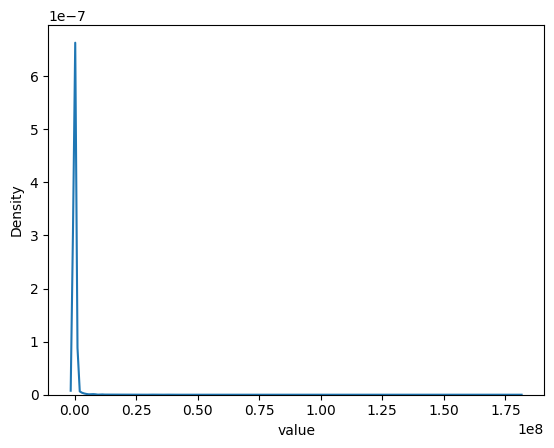

In [5]:
sns.kdeplot(df['value'])

In [6]:

for i in df.columns:
    print(f"{i} has {df[i].nunique()} unique values")

df.head()
def outlier_counter(feature,df):
    Q3 = df[feature].quantile(0.75)
    Q1 = df[feature].quantile(0.25)
    IQR = Q3 - Q1
    ub = Q3 + 1.5*IQR
    lb = Q1 - 1.5*IQR
    outliers_count1 = ((df[feature] < lb) | (df[feature] > ub)).sum()
    print(outliers_count1)
    df.loc[df[feature]>=ub,feature] = ub
    df.loc[df[feature]<=lb,feature] = lb
    

region has 38 unique values
category has 3 unique values
parameter has 8 unique values
mode has 5 unique values
powertrain has 5 unique values
year has 15 unique values
unit has 6 unique values
value has 990 unique values


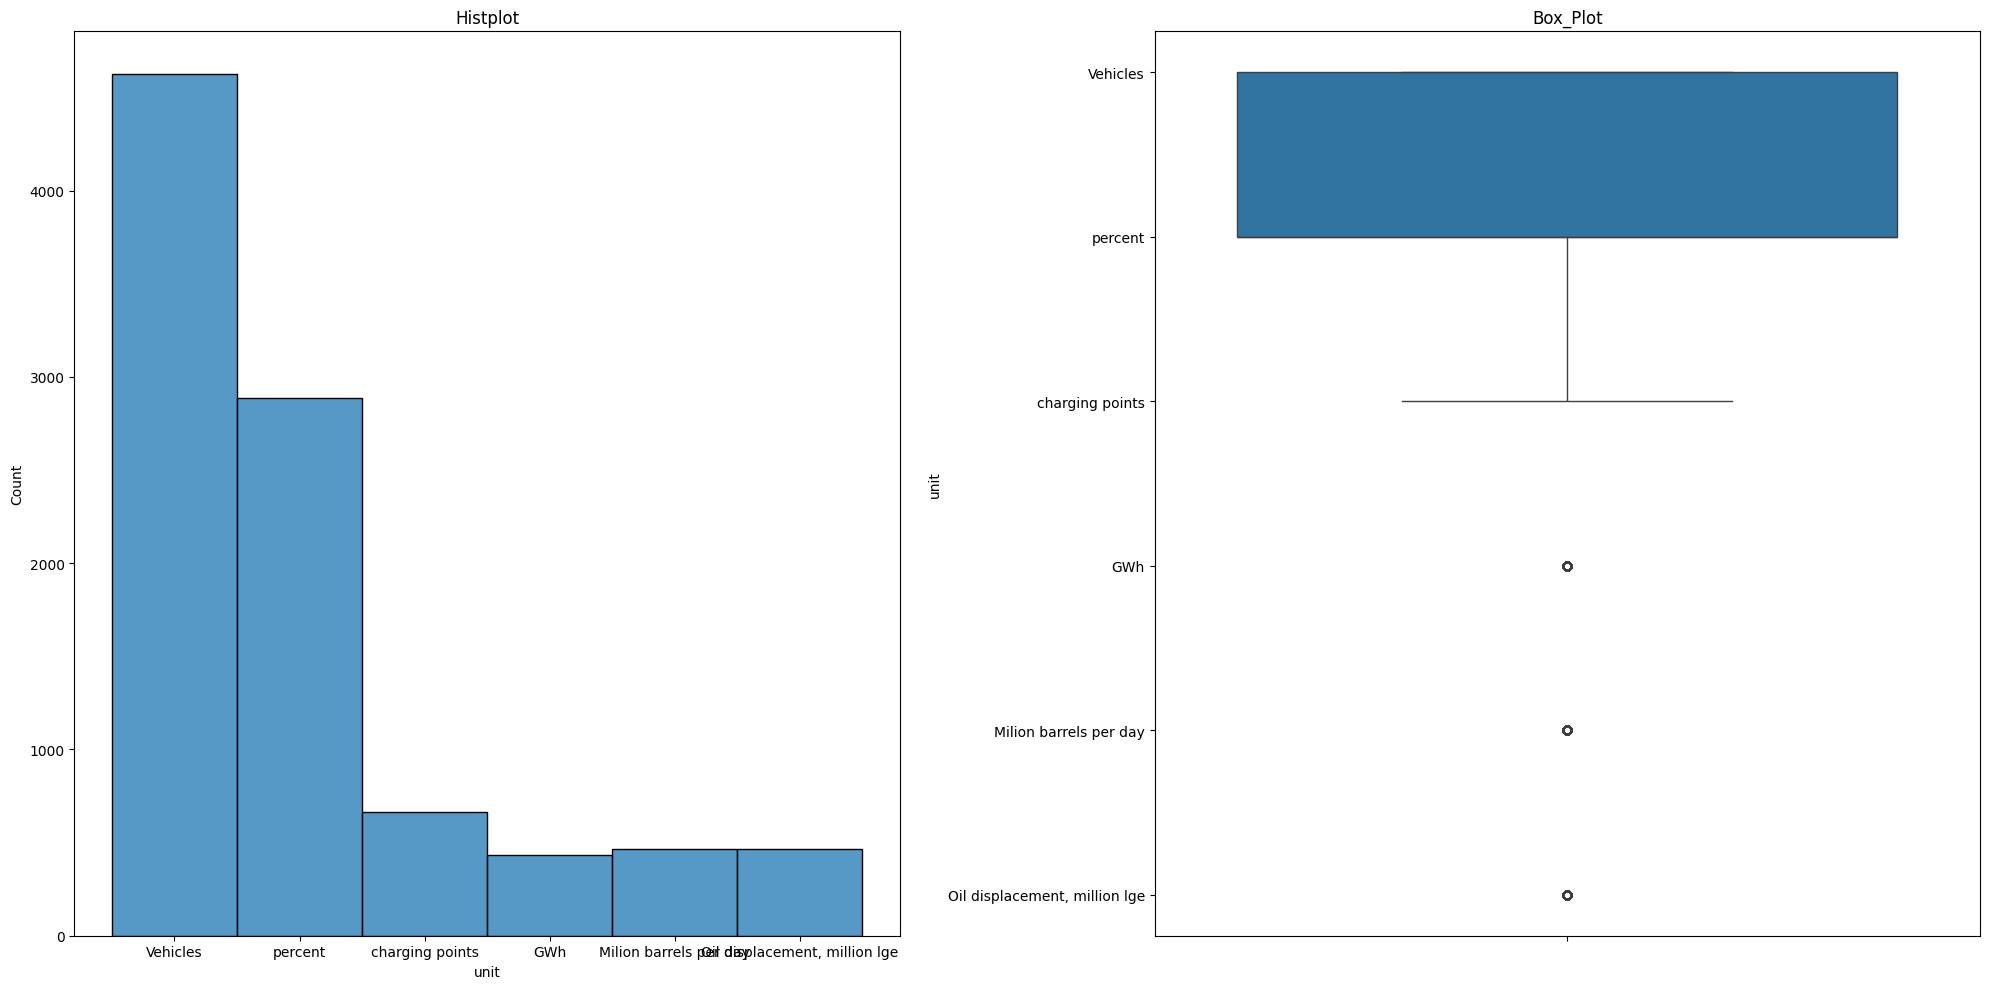

In [7]:
Plotter("unit",df)

<class 'pandas.core.frame.DataFrame'>
Index: 2887 entries, 1 to 9519
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2887 non-null   object 
 1   category    2887 non-null   object 
 2   parameter   2887 non-null   object 
 3   mode        2887 non-null   object 
 4   powertrain  2887 non-null   object 
 5   year        2887 non-null   int64  
 6   unit        2887 non-null   object 
 7   value       2887 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 203.0+ KB
439
0


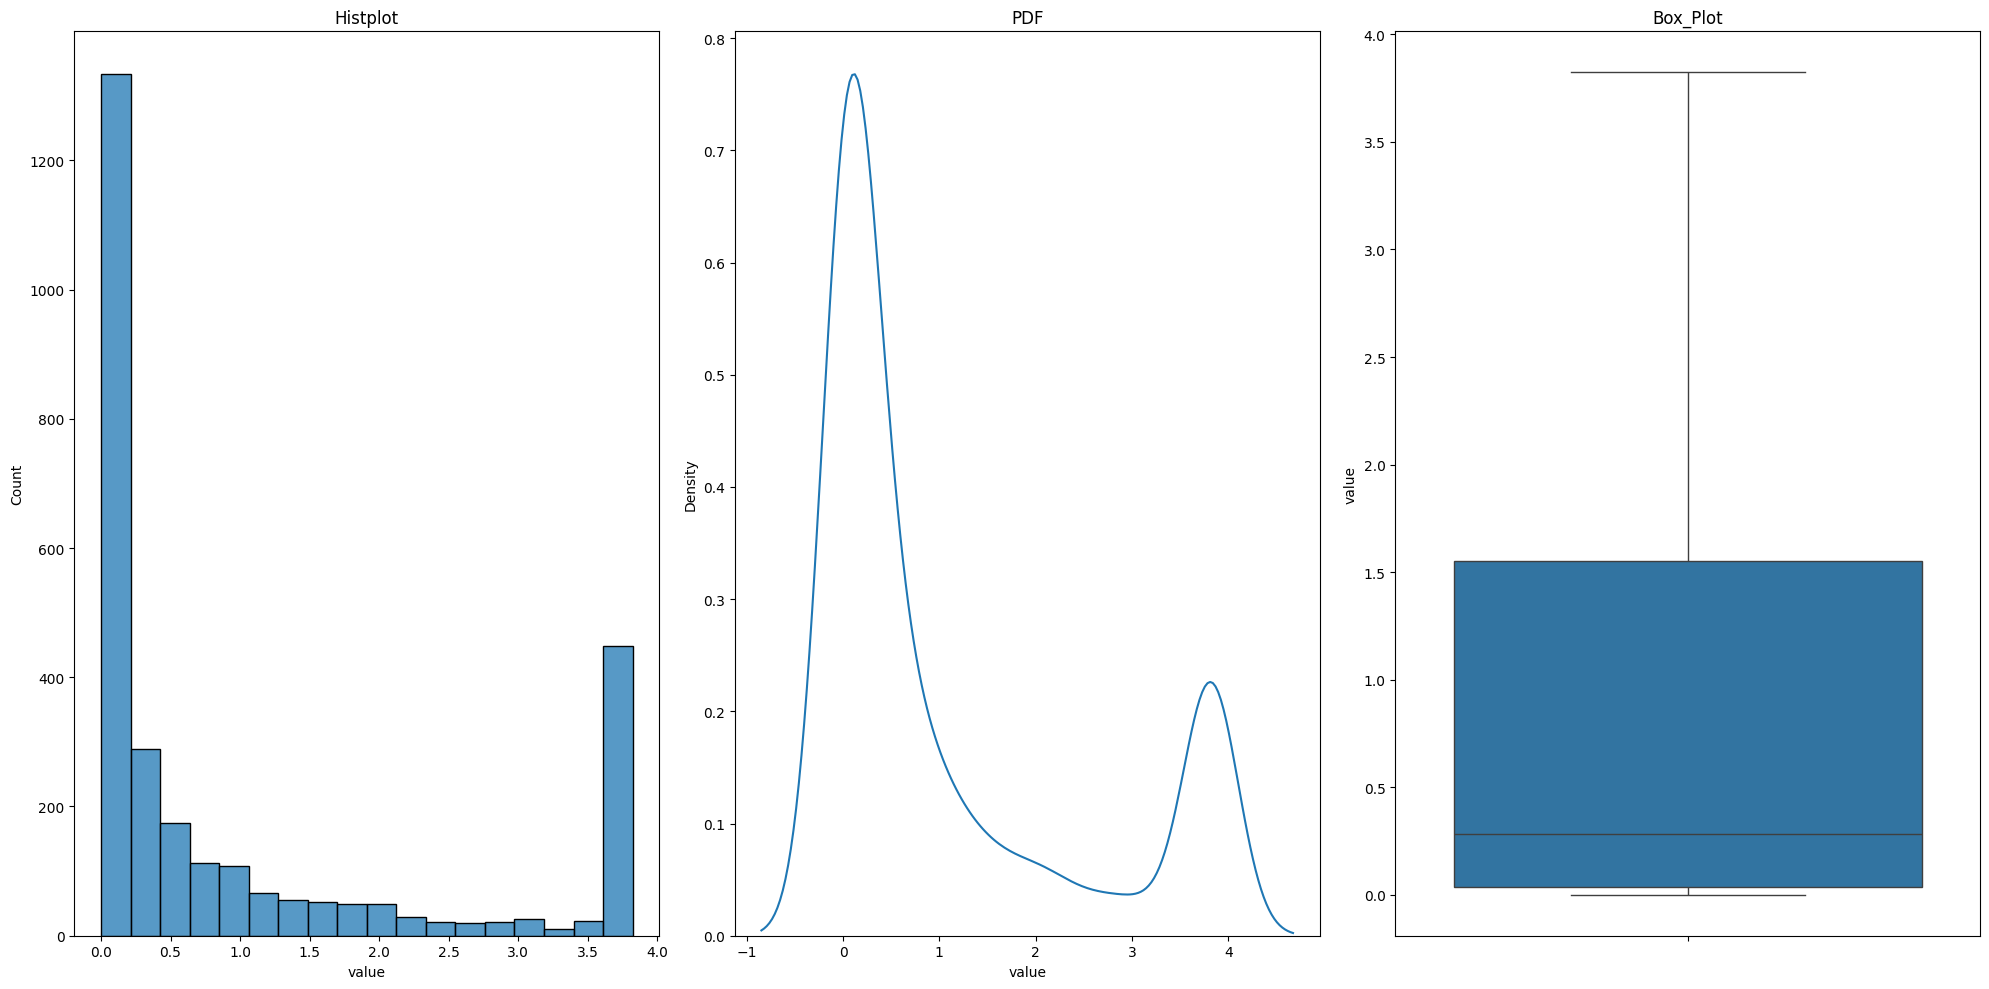

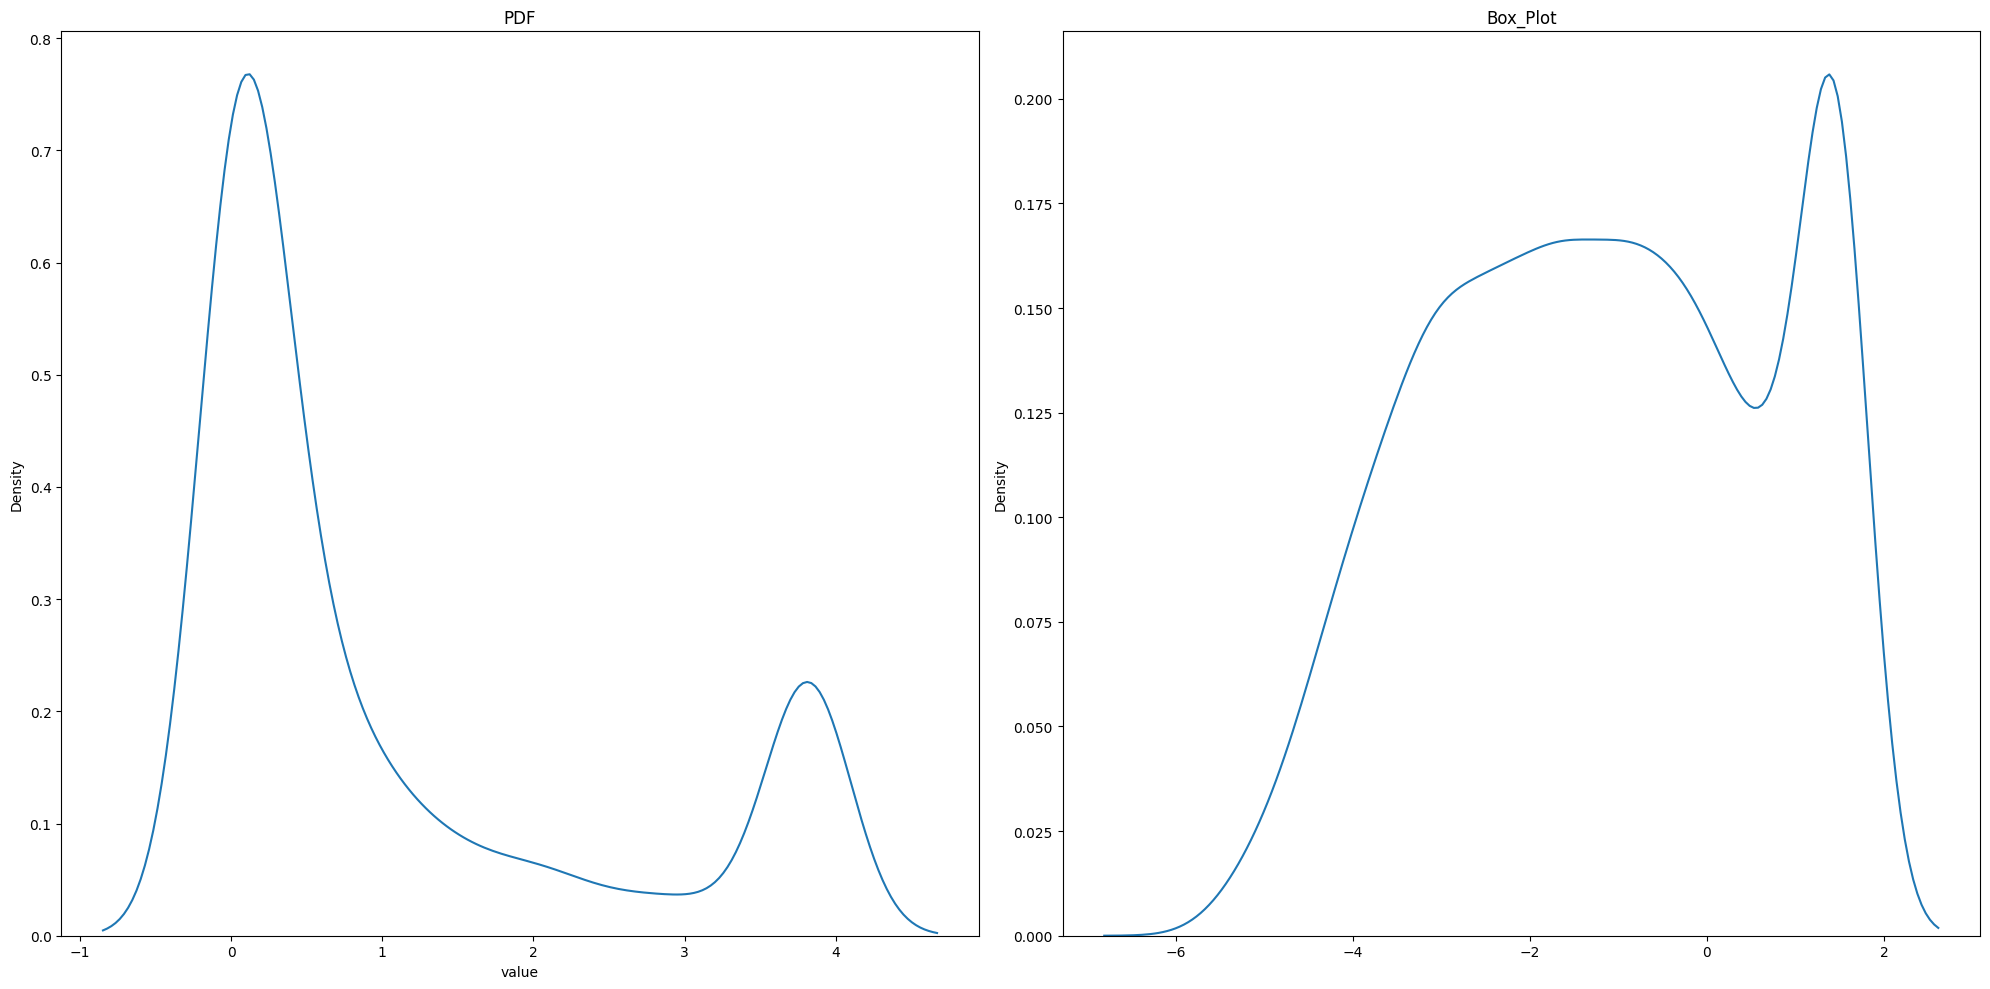

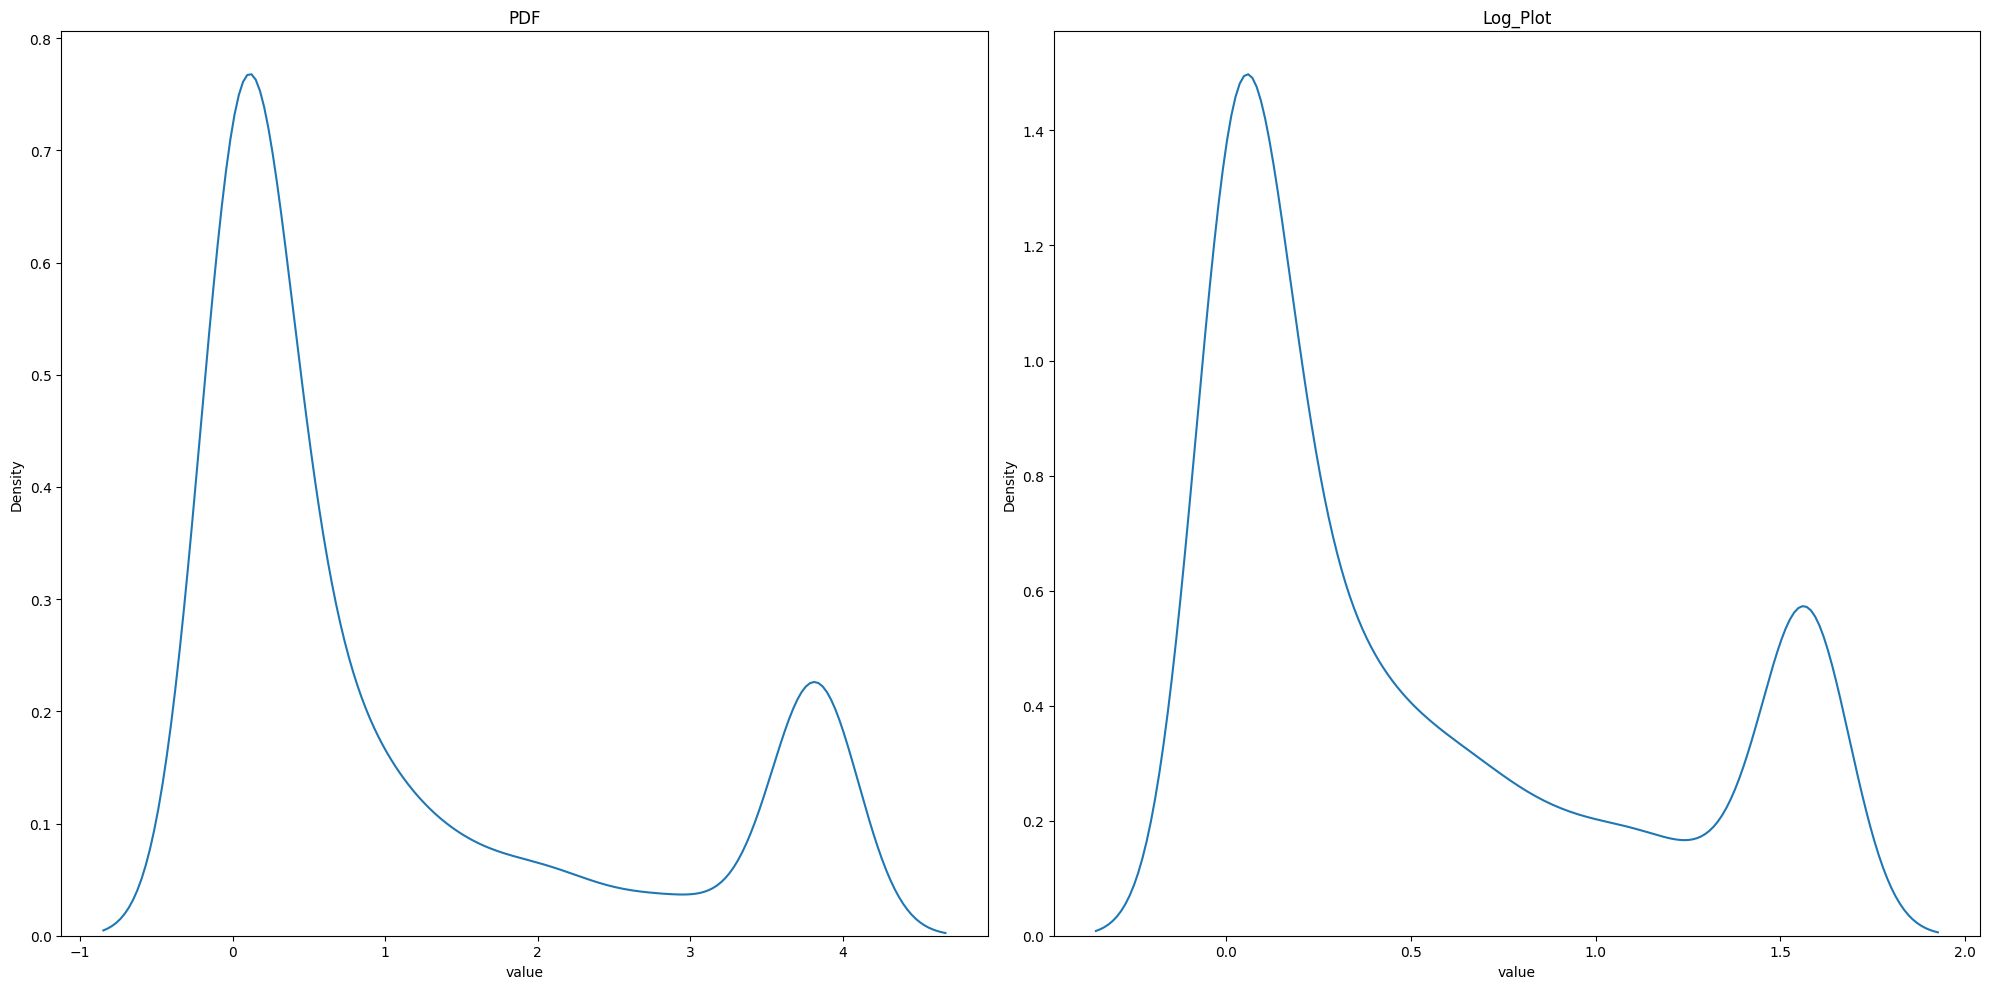

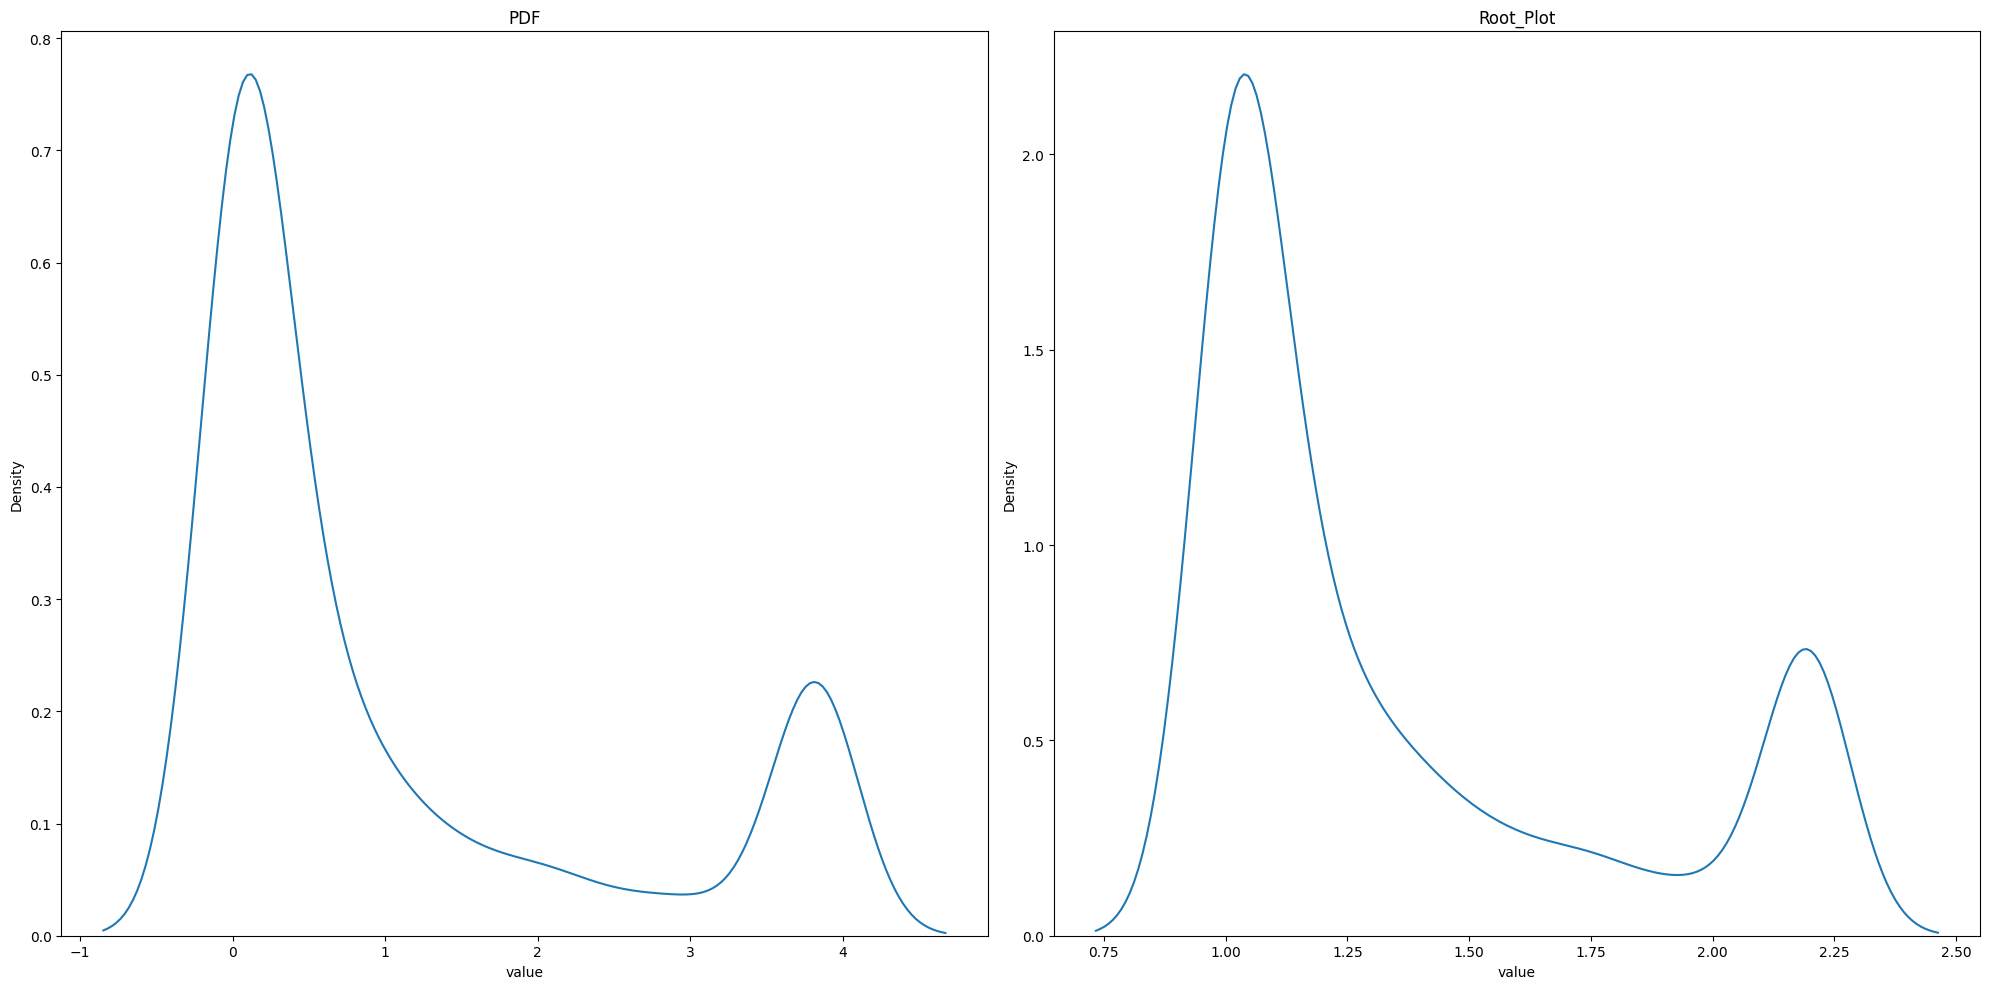

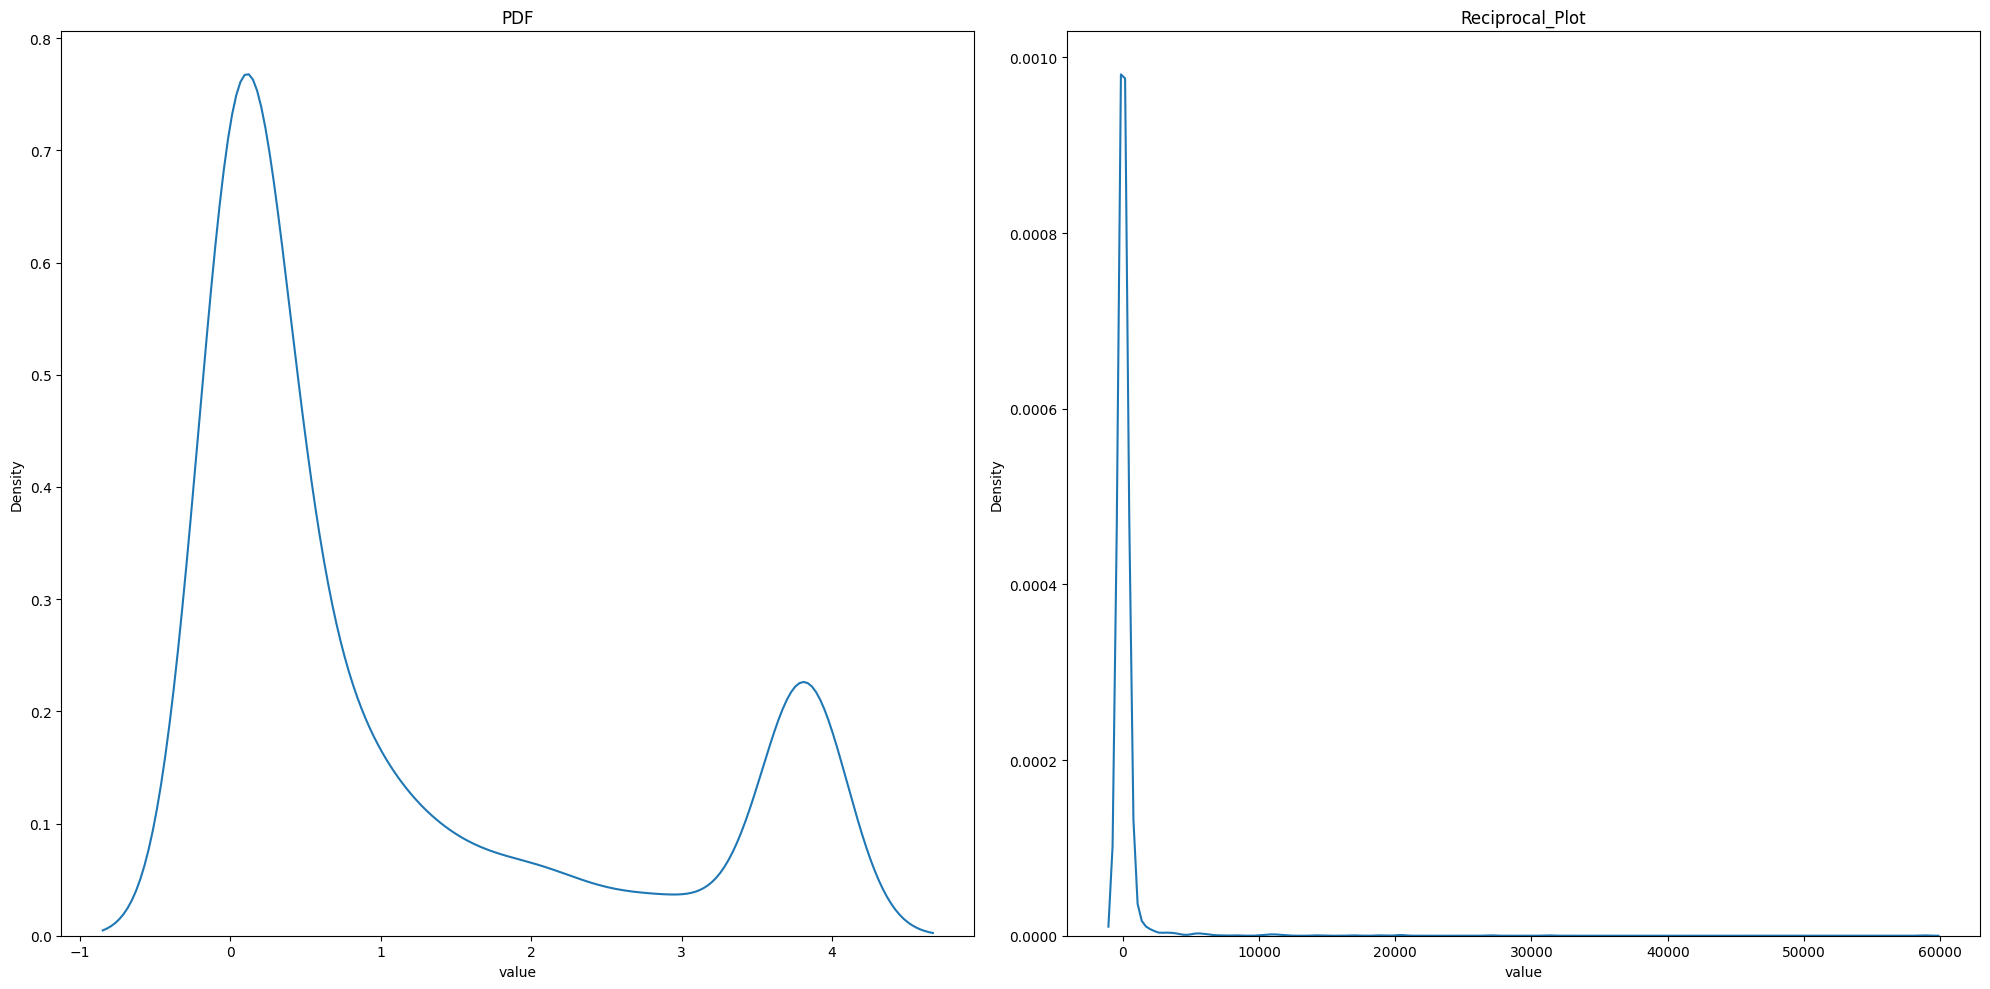

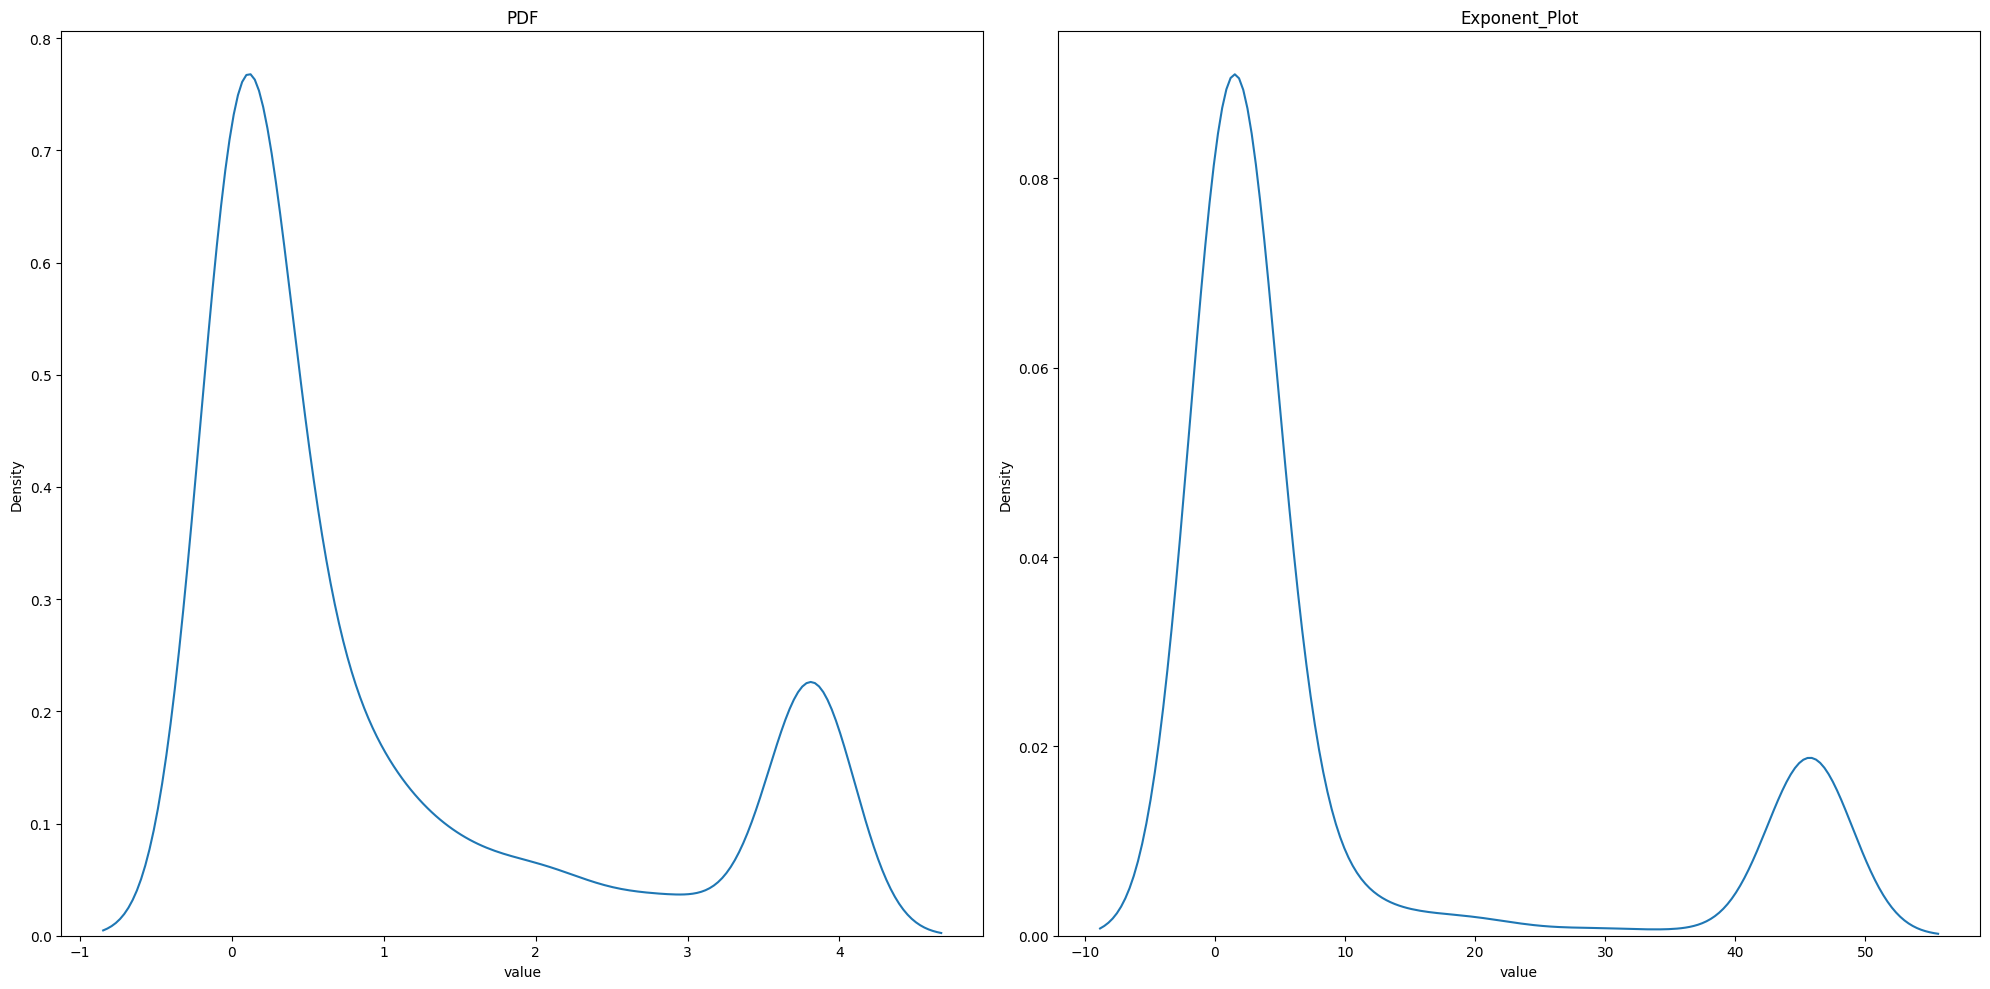

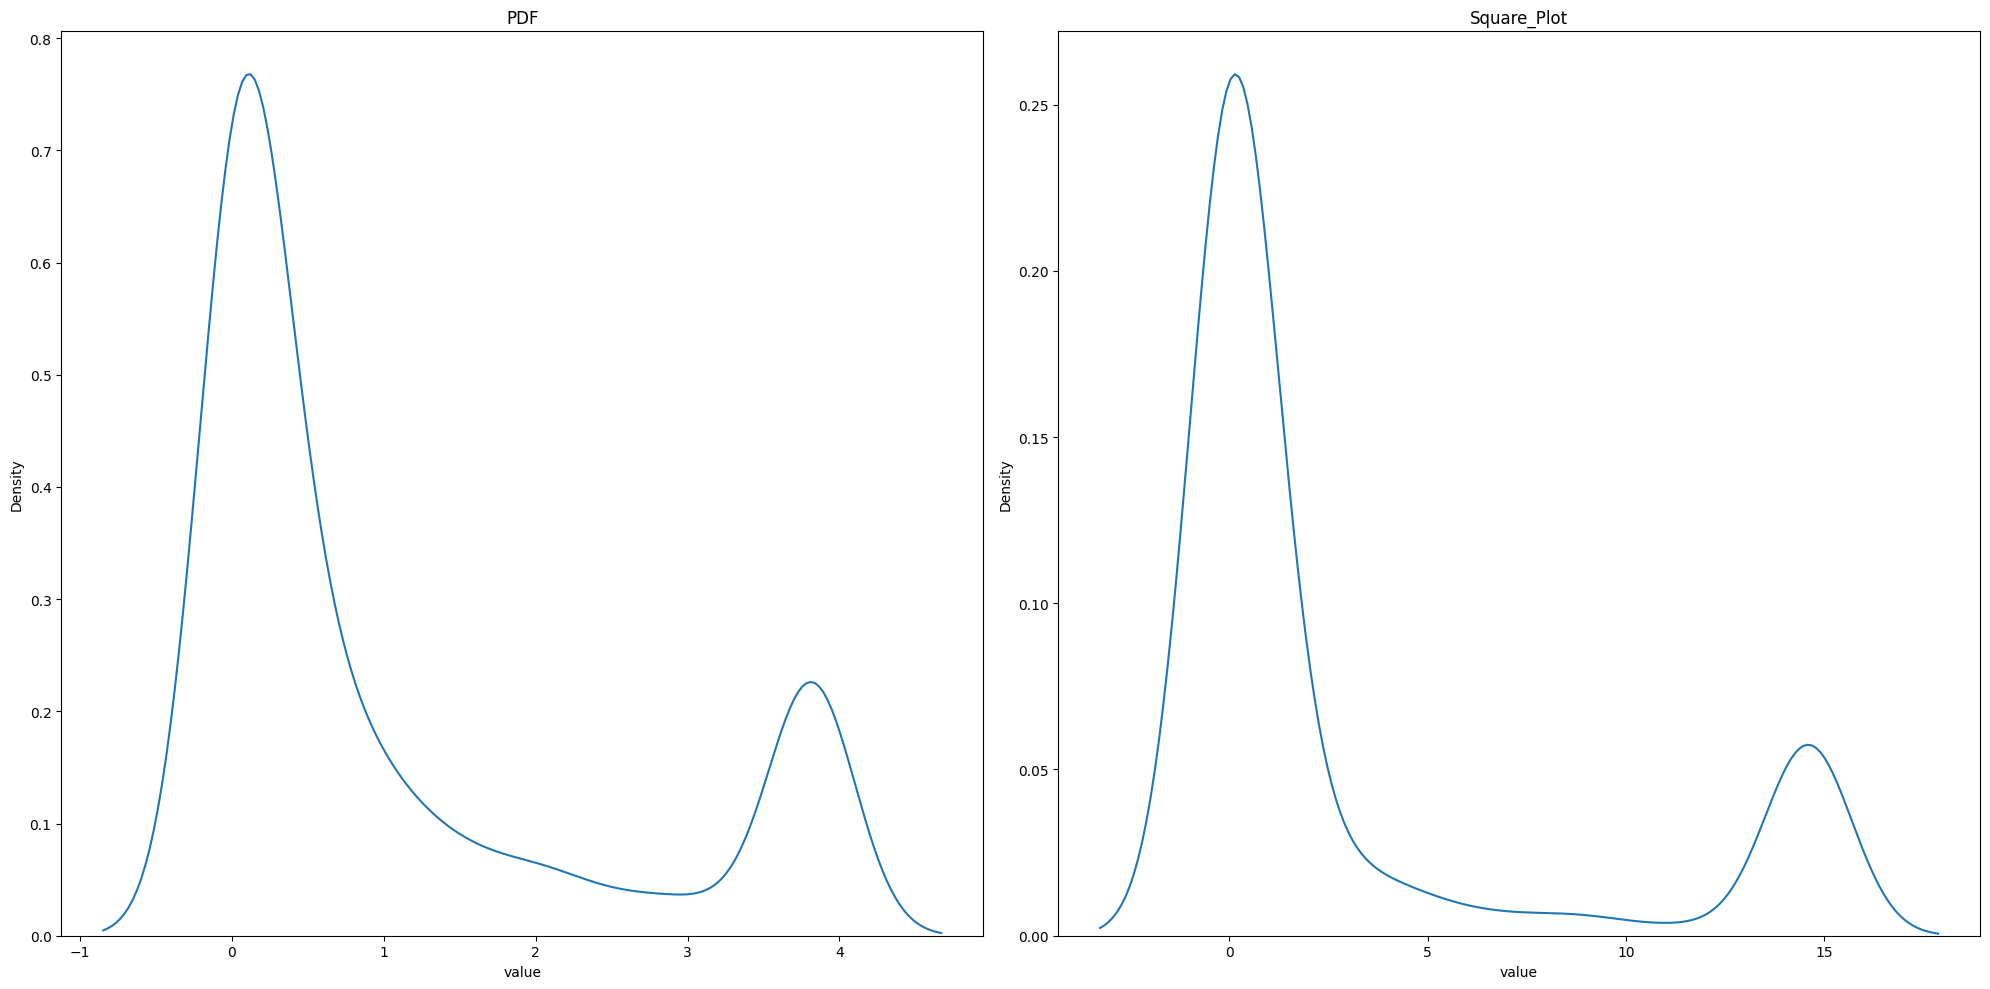

In [8]:

df1 = df[df["unit"]=="percent"]
df1.info()
val = df1
outlier_counter("value",val)
outlier_counter("value",val)
Plotter("value",val)
Boxcox_comparator("value",val)
Log_comparator("value",val)
sqrt_comparator("value",val)
rec_comparator("value",val)
exp_comparator("value",val)
square_comparator("value",val)

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      4624 non-null   object 
 1   category    4624 non-null   object 
 2   parameter   4624 non-null   object 
 3   mode        4624 non-null   object 
 4   powertrain  4624 non-null   object 
 5   year        4624 non-null   int64  
 6   unit        4624 non-null   object 
 7   value       4624 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 325.1+ KB
840
0


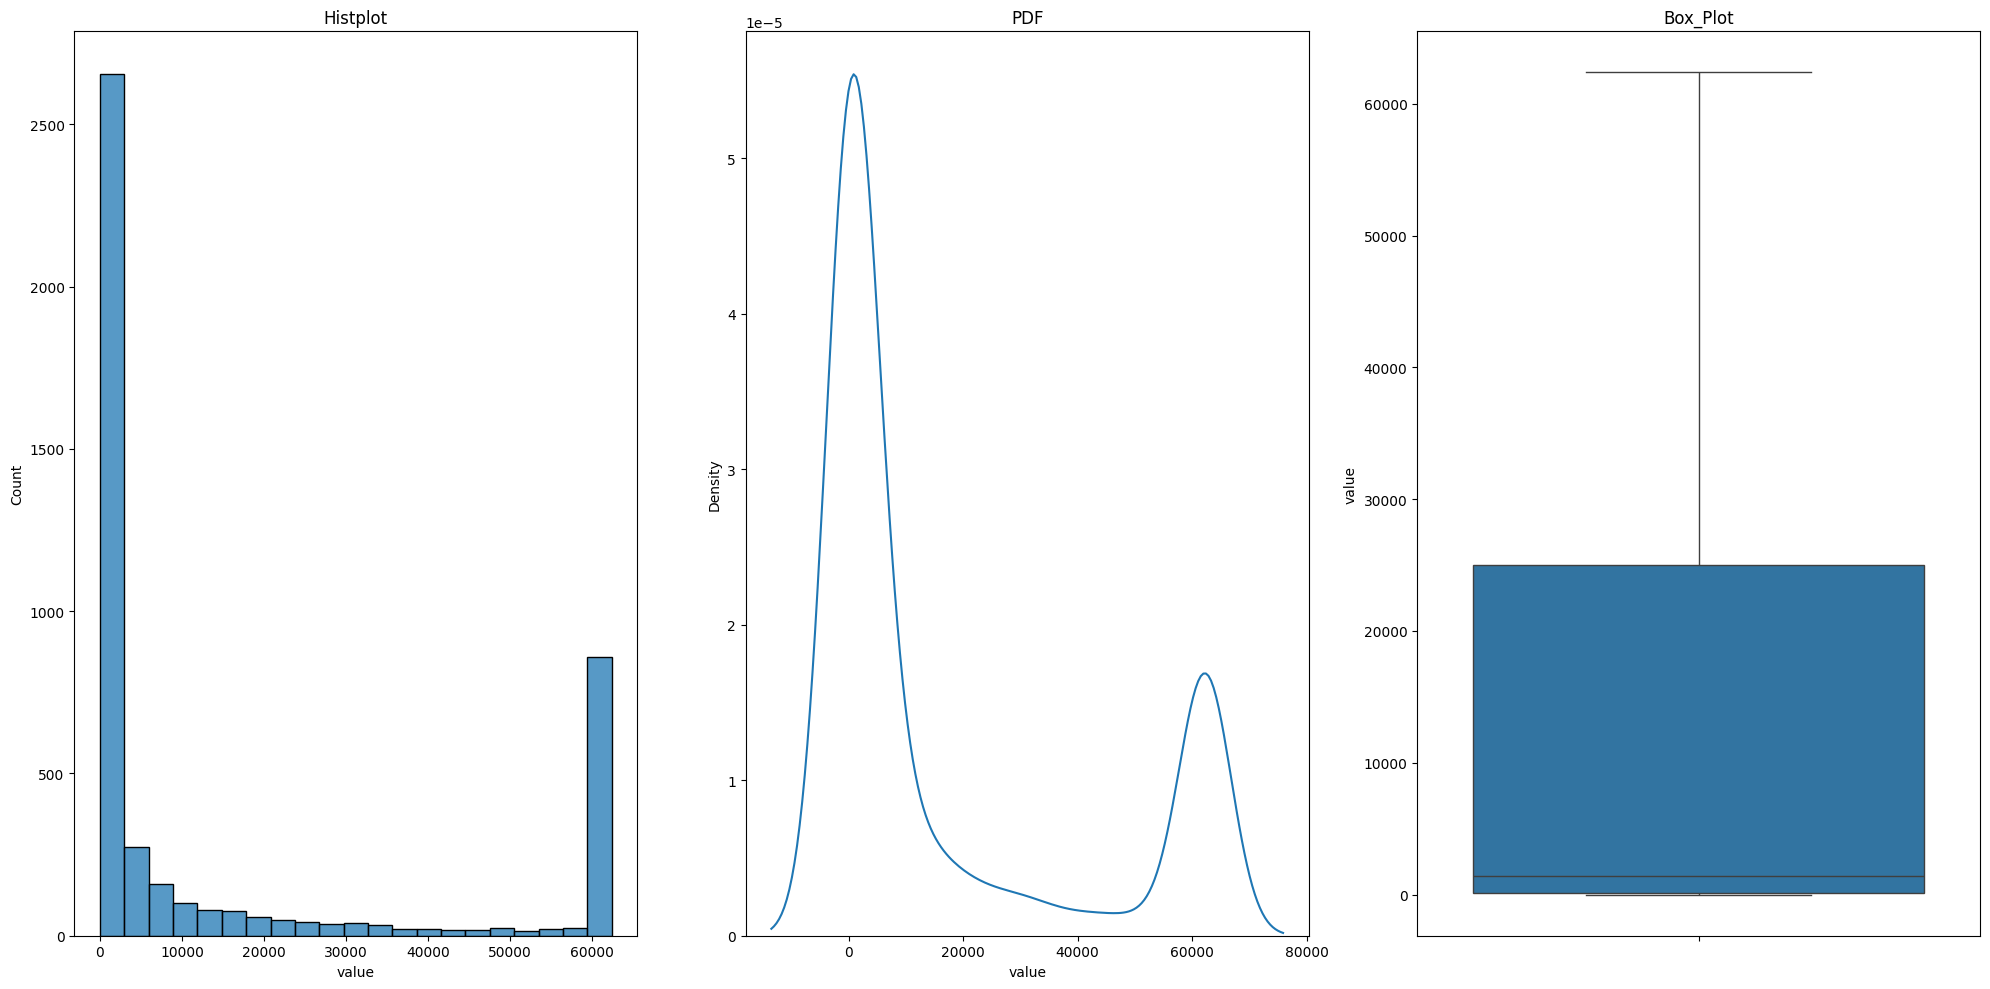

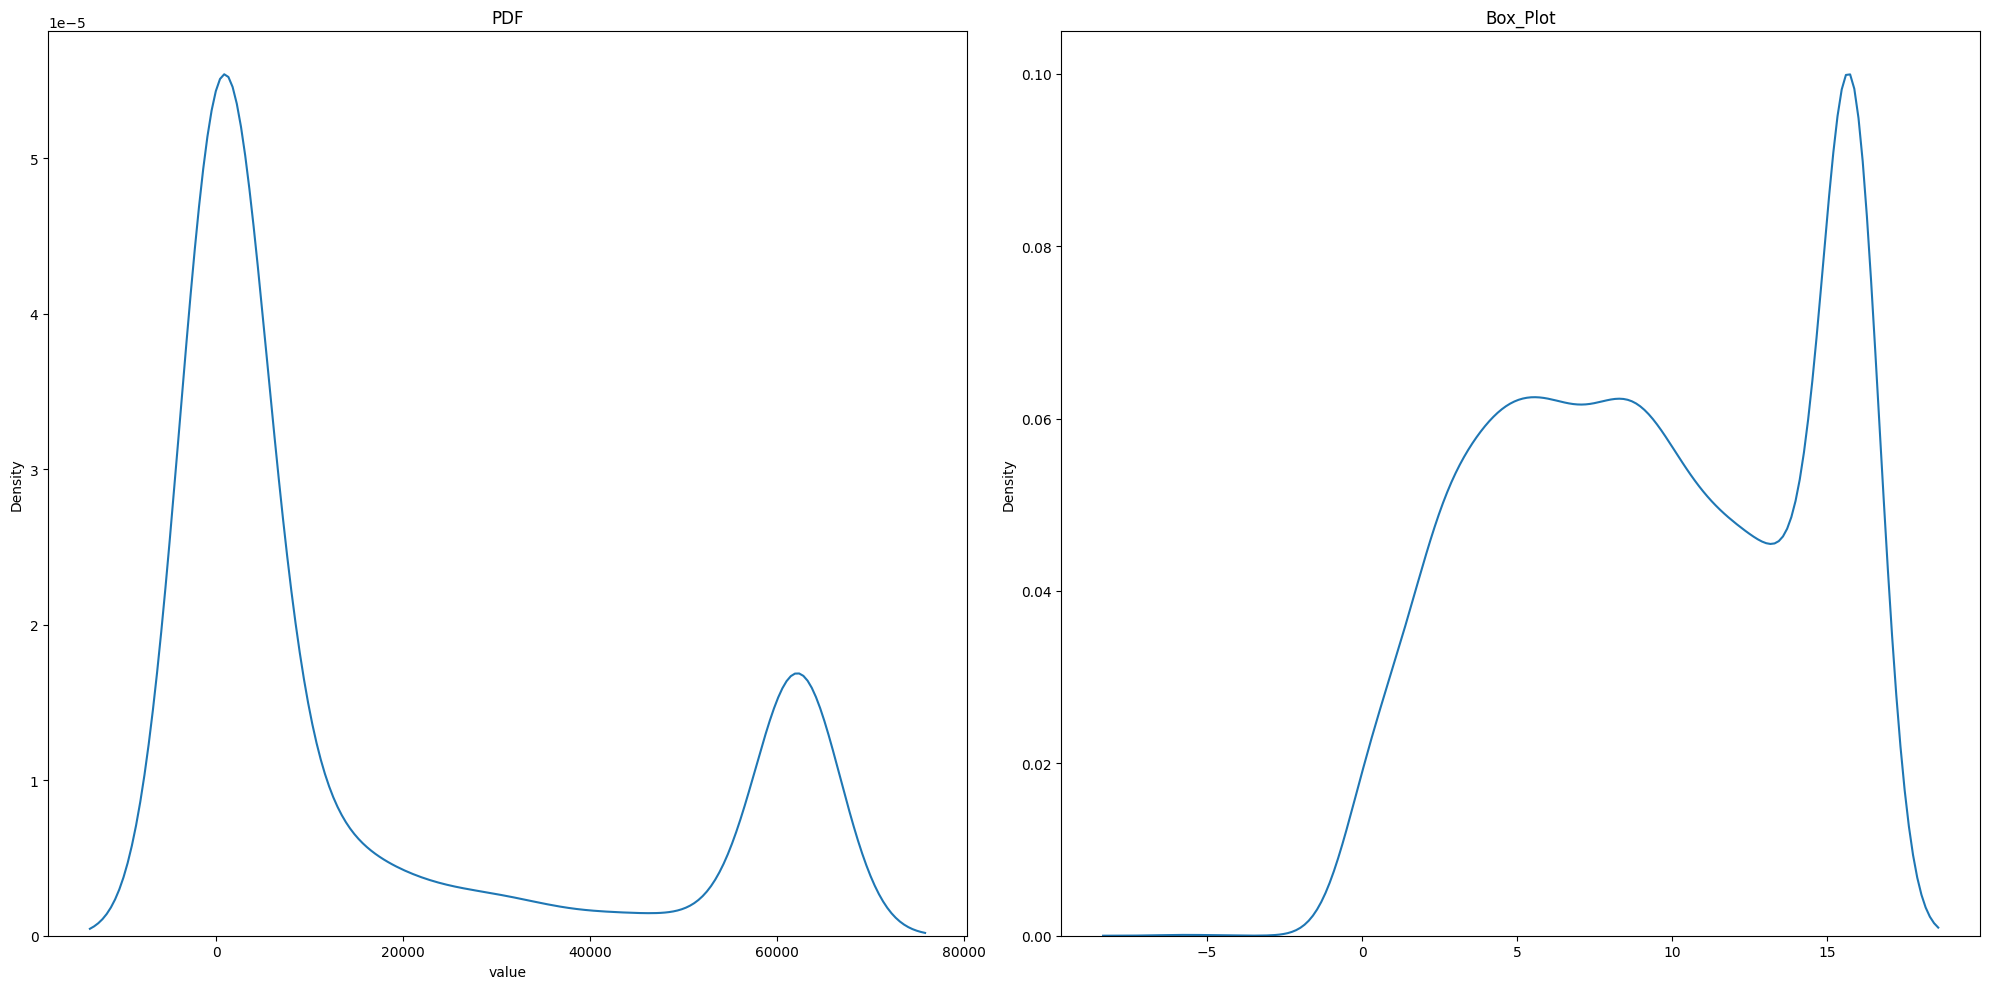

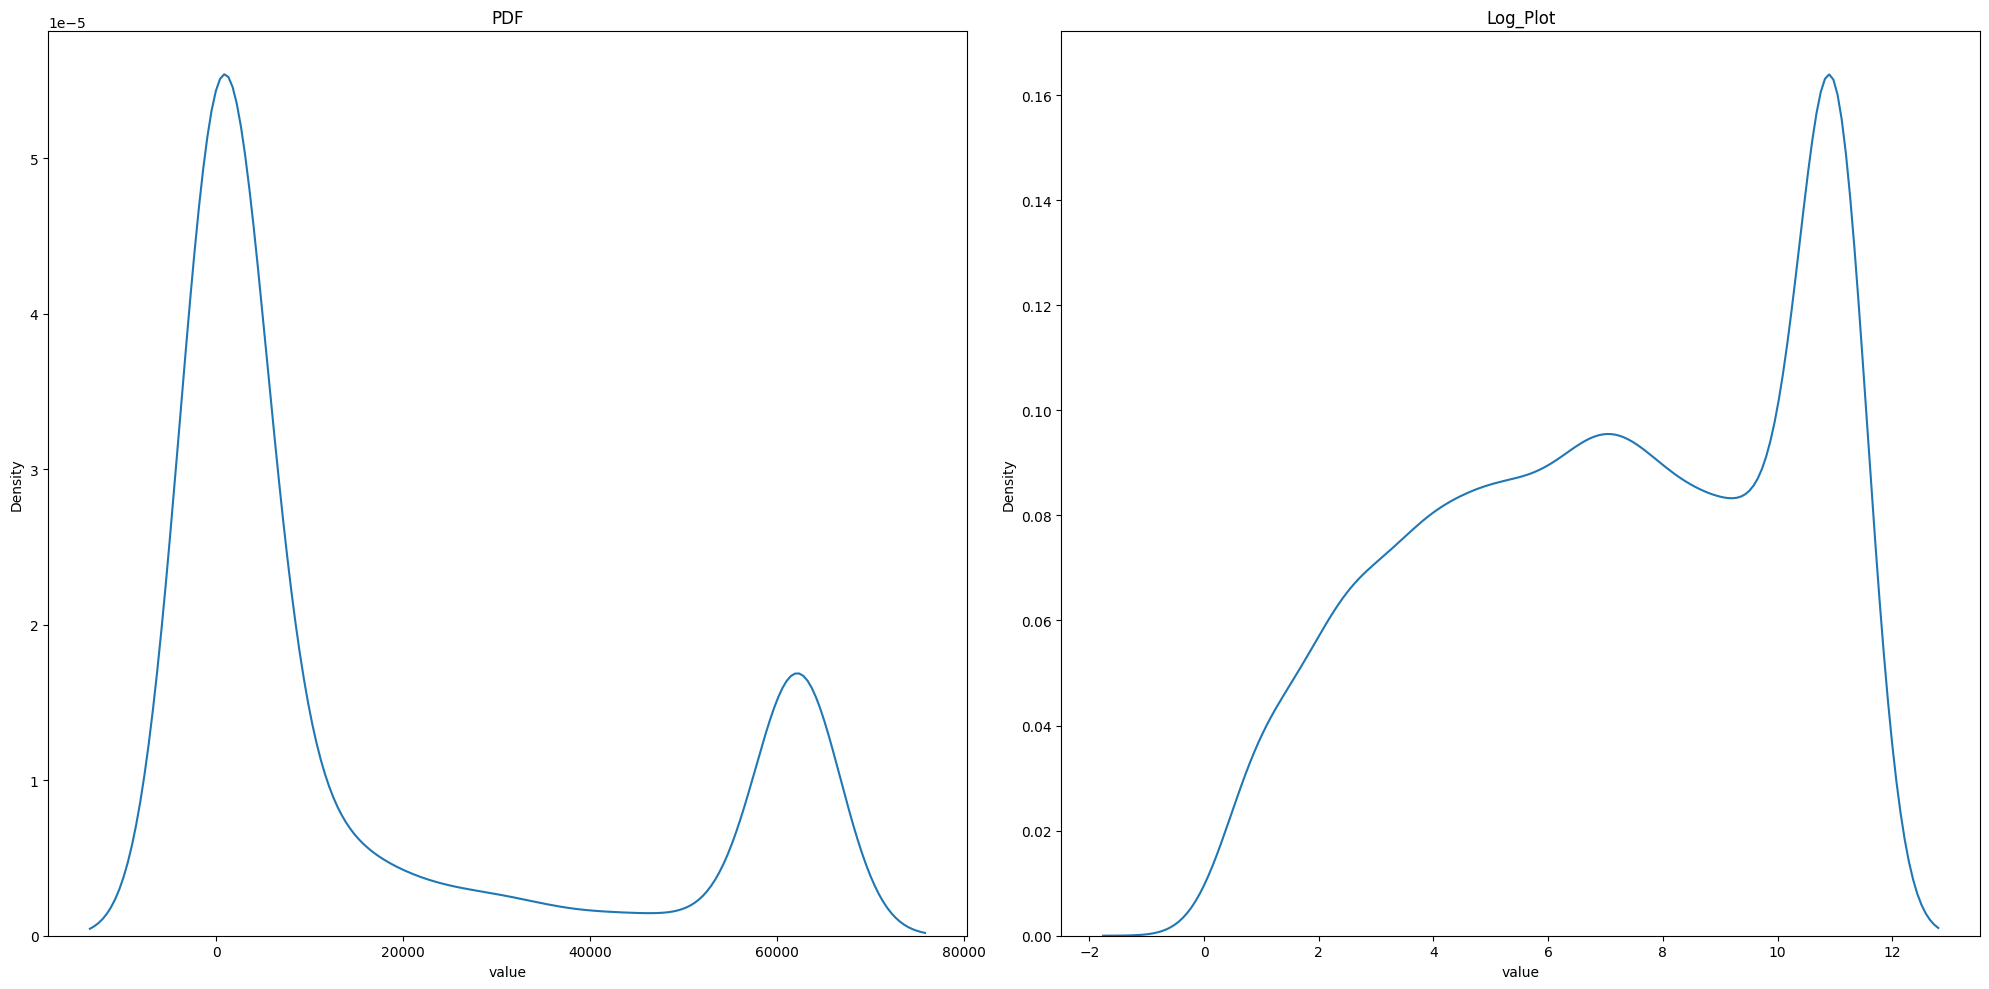

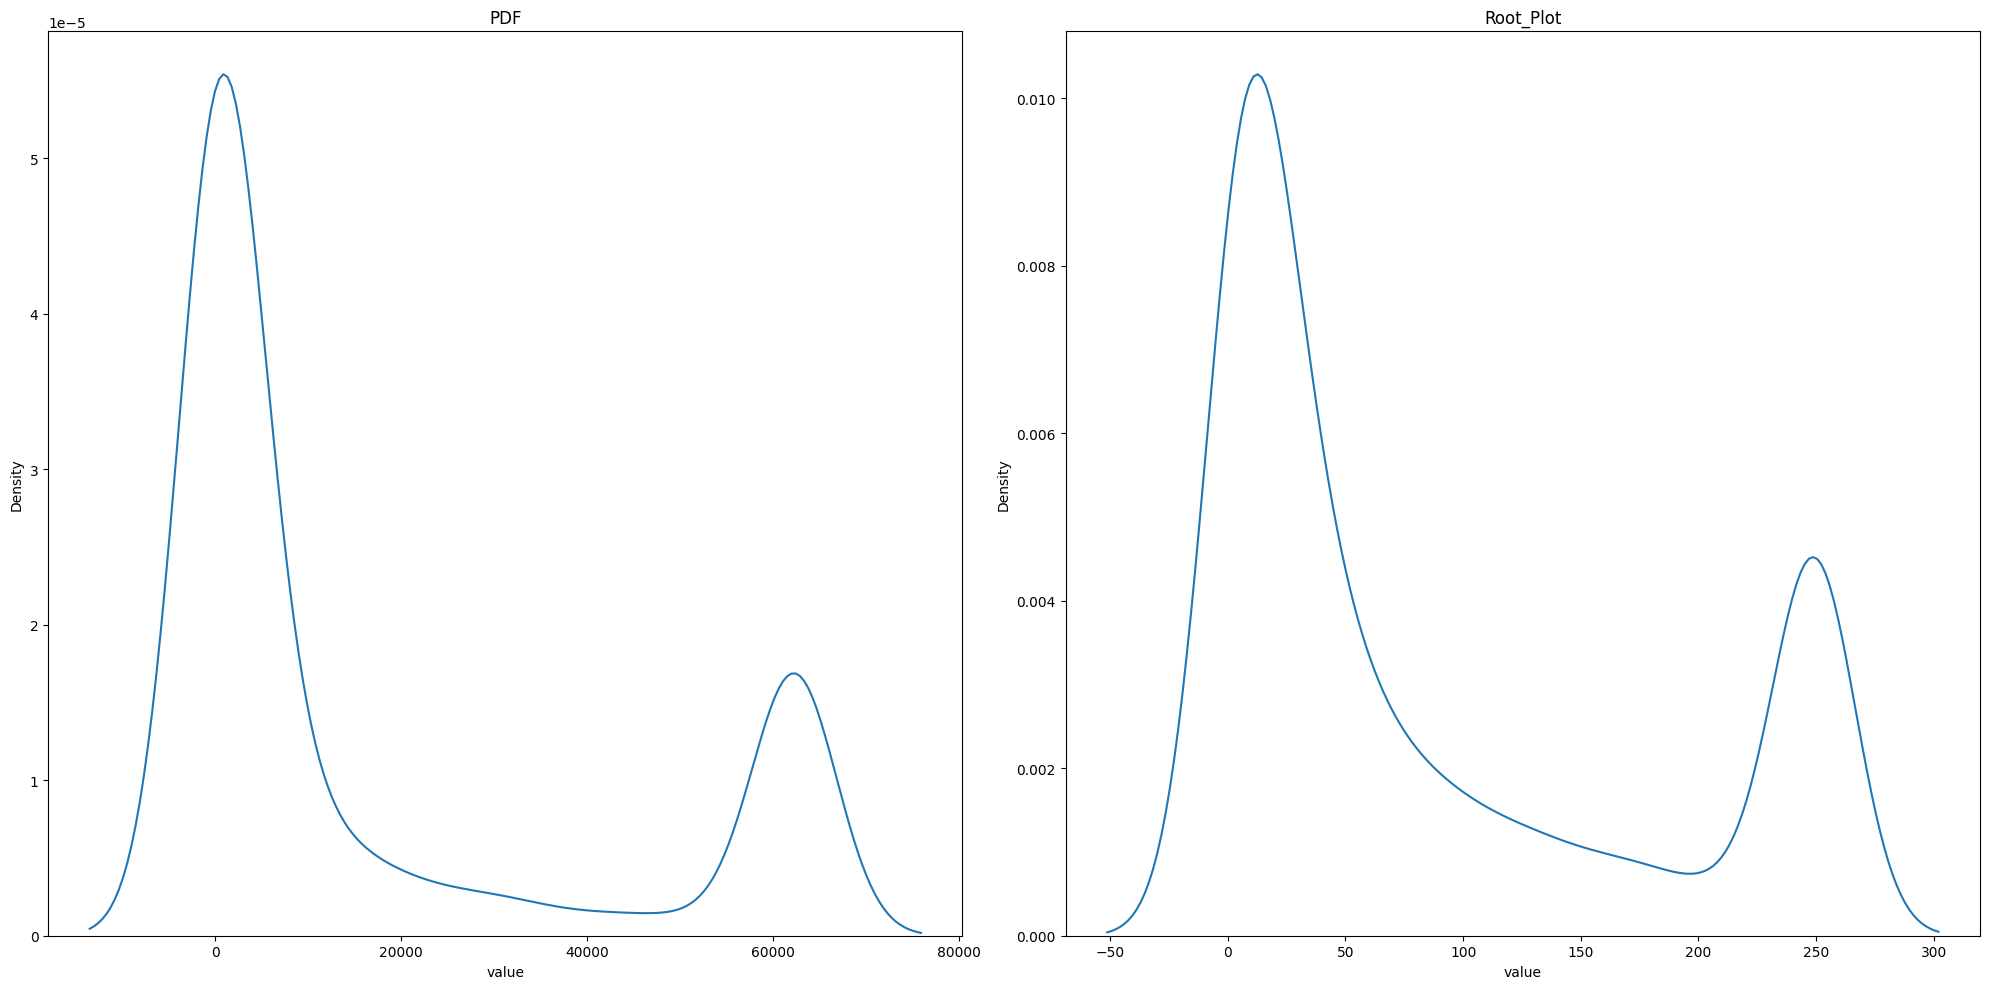

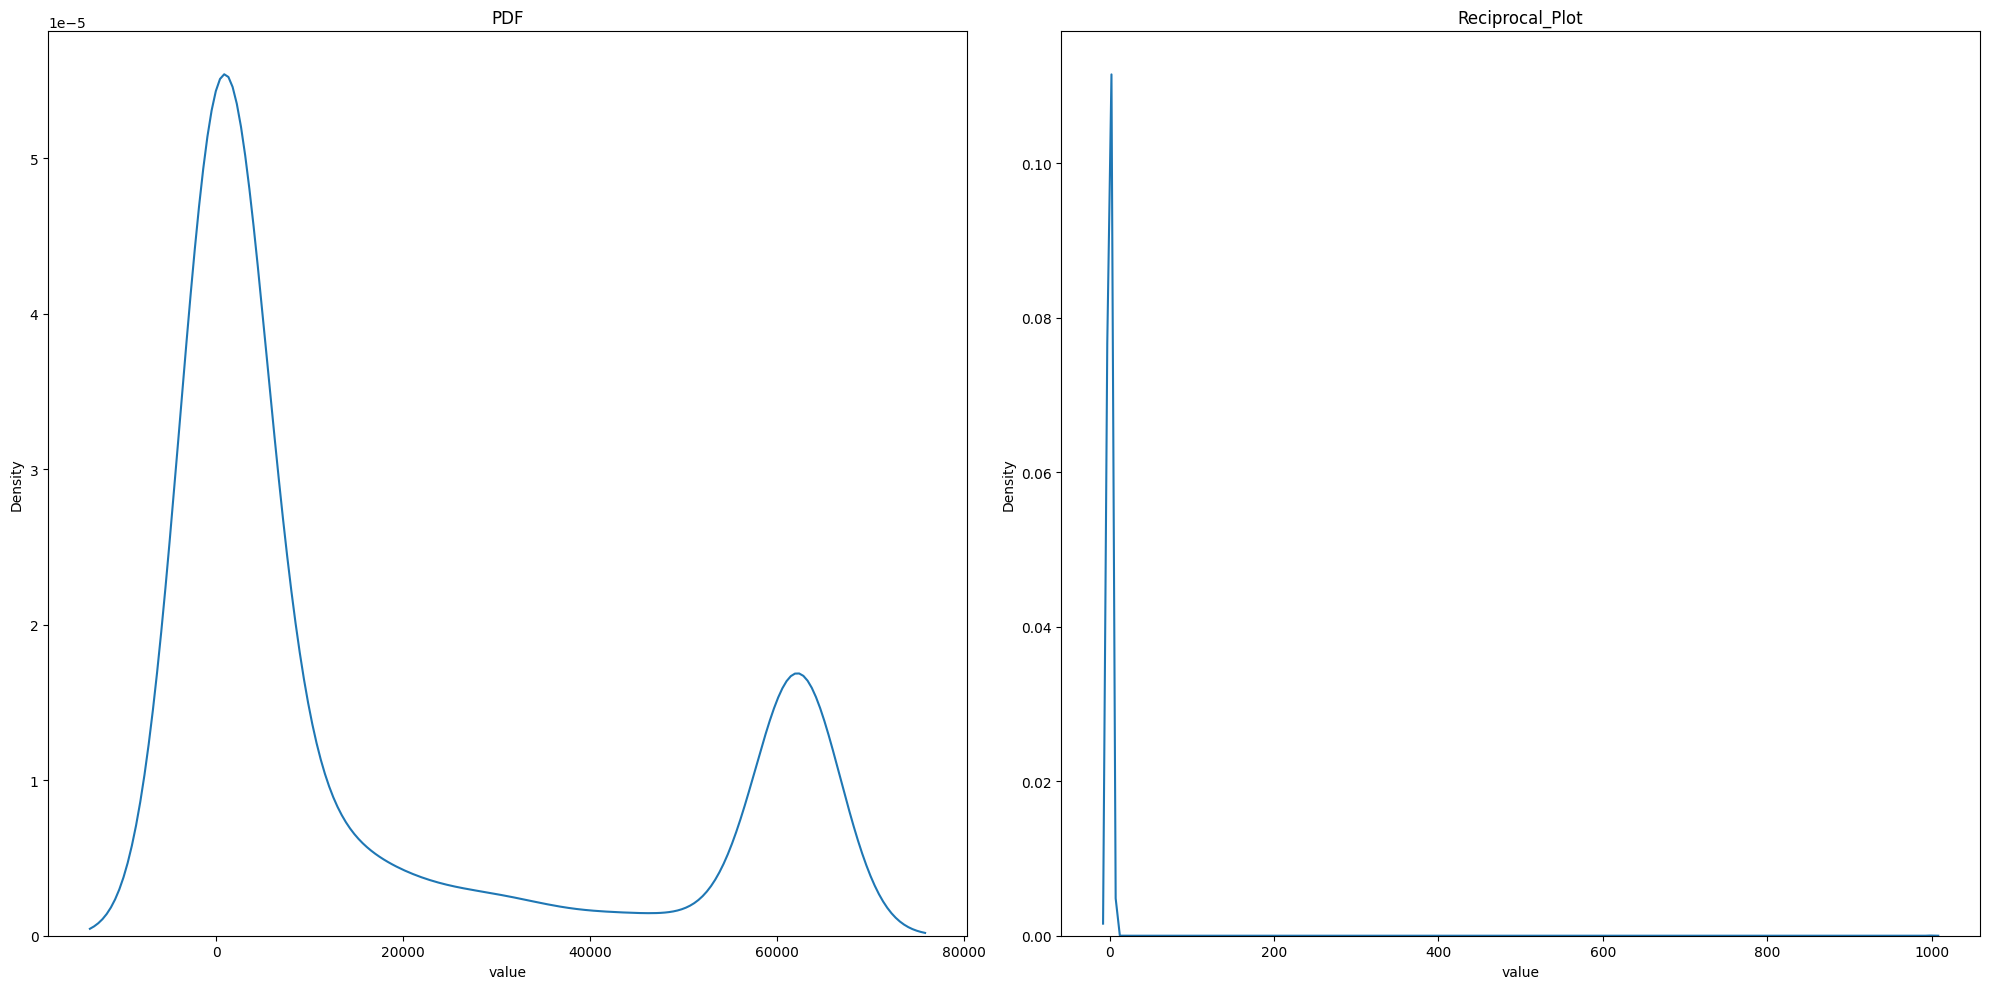

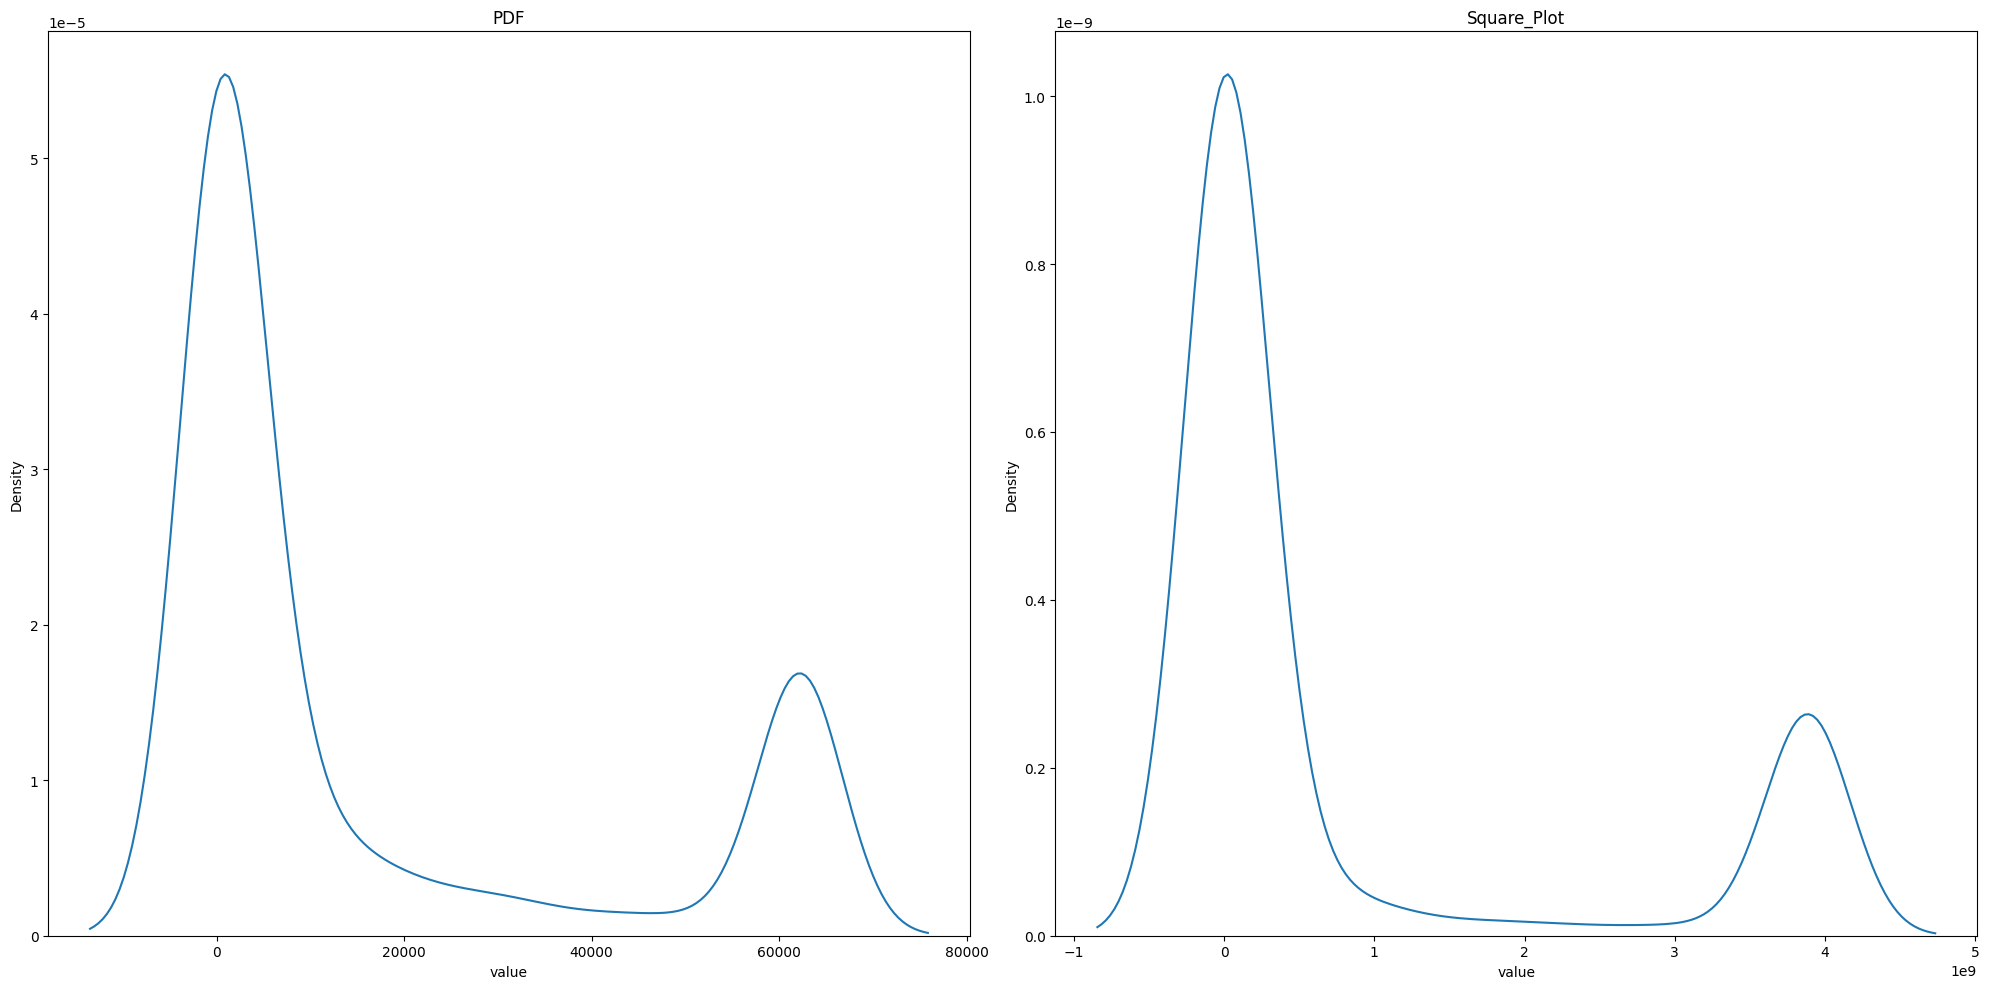

In [9]:
df2 = df[df["unit"]=="Vehicles"]
df2.info()
val = df2
outlier_counter("value",val)
outlier_counter("value",val)
Plotter("value",val)
Boxcox_comparator("value",val)
Log_comparator("value",val)
sqrt_comparator("value",val)
rec_comparator("value",val)
#exp_comparator("value",val)
square_comparator("value",val)

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 40 to 9525
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      664 non-null    object 
 1   category    664 non-null    object 
 2   parameter   664 non-null    object 
 3   mode        664 non-null    object 
 4   powertrain  664 non-null    object 
 5   year        664 non-null    int64  
 6   unit        664 non-null    object 
 7   value       664 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 46.7+ KB
115
0


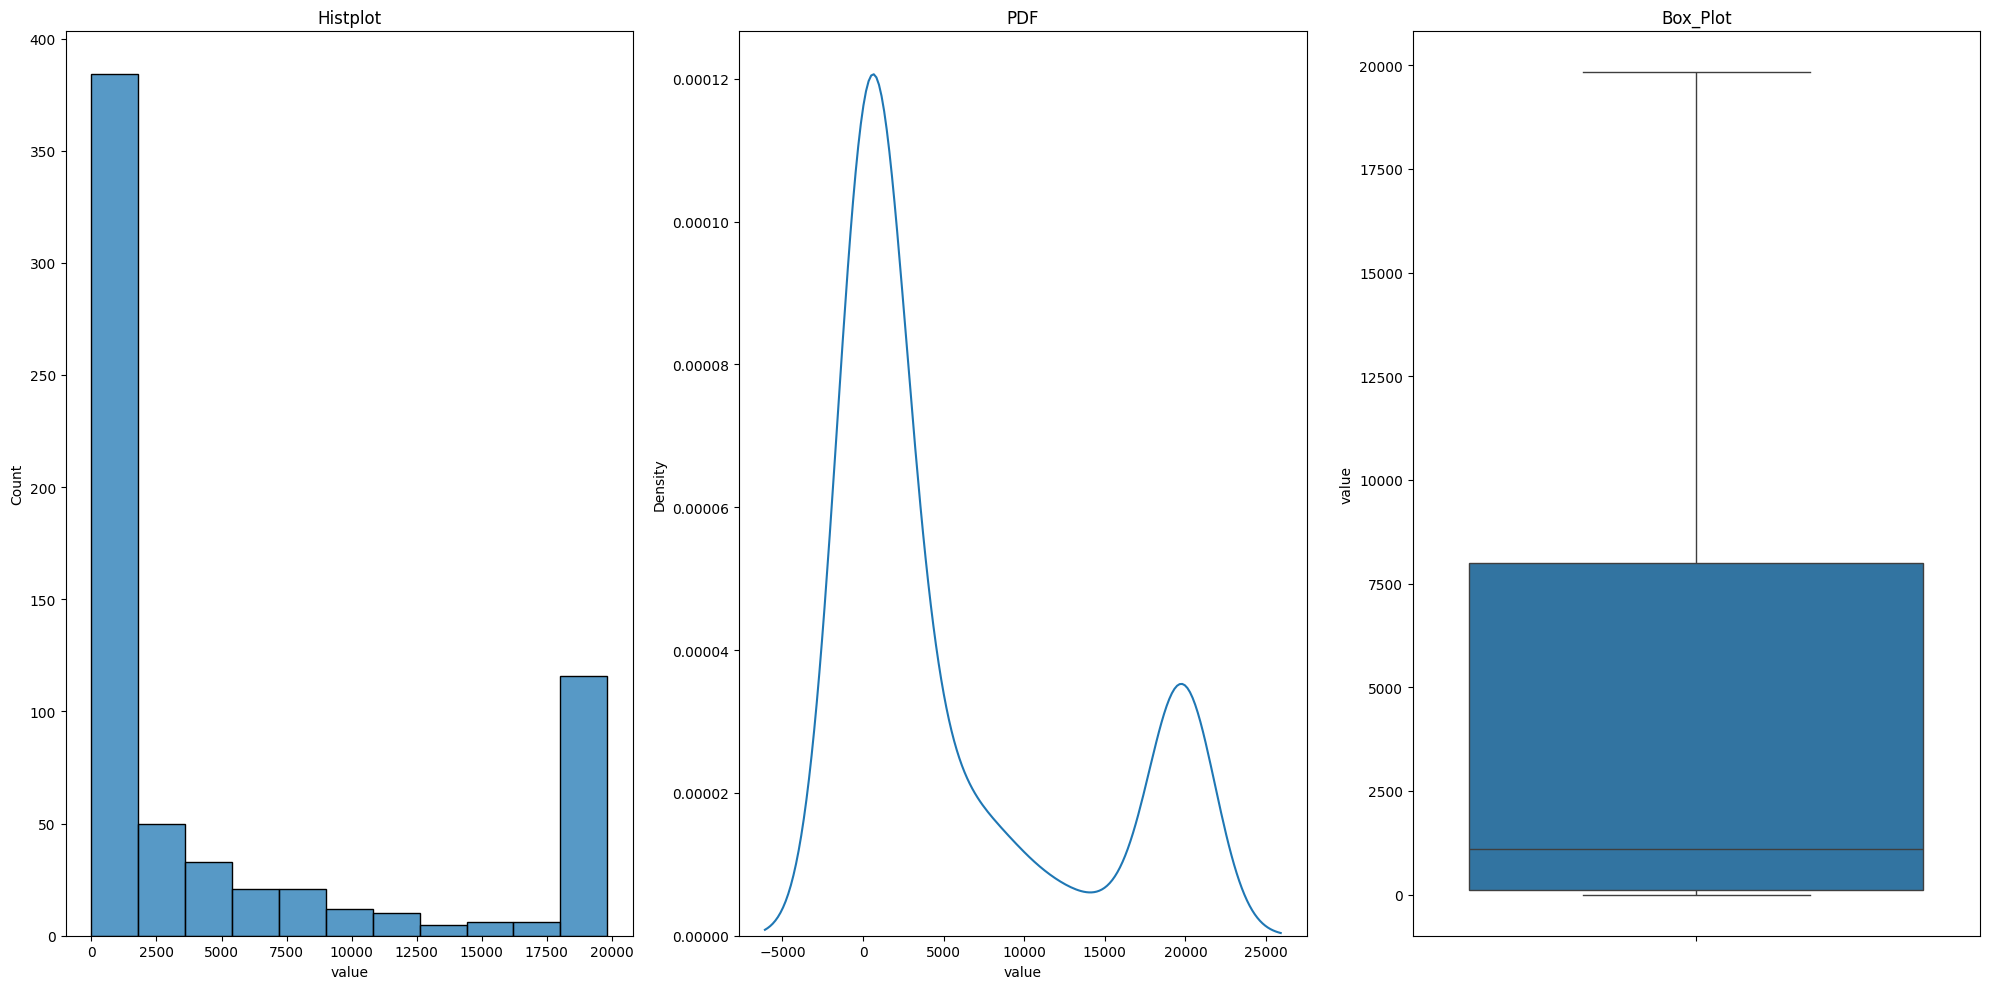

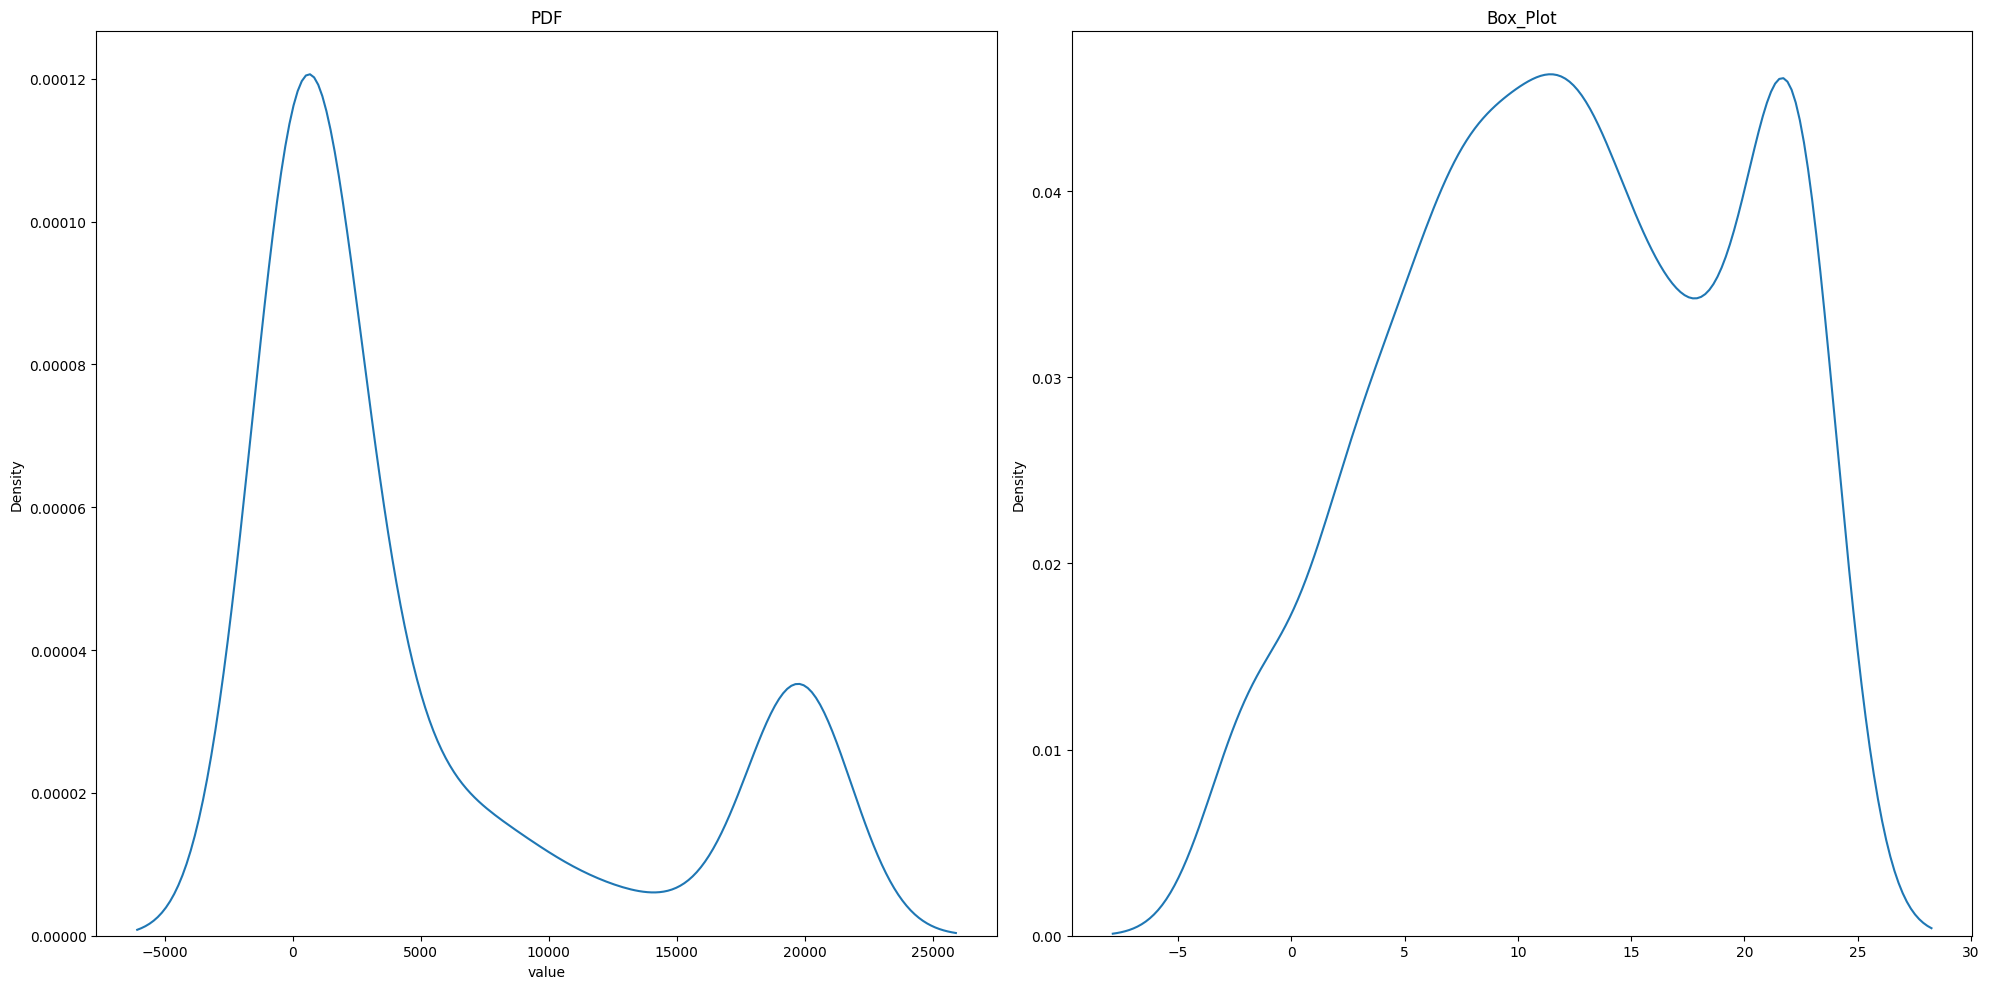

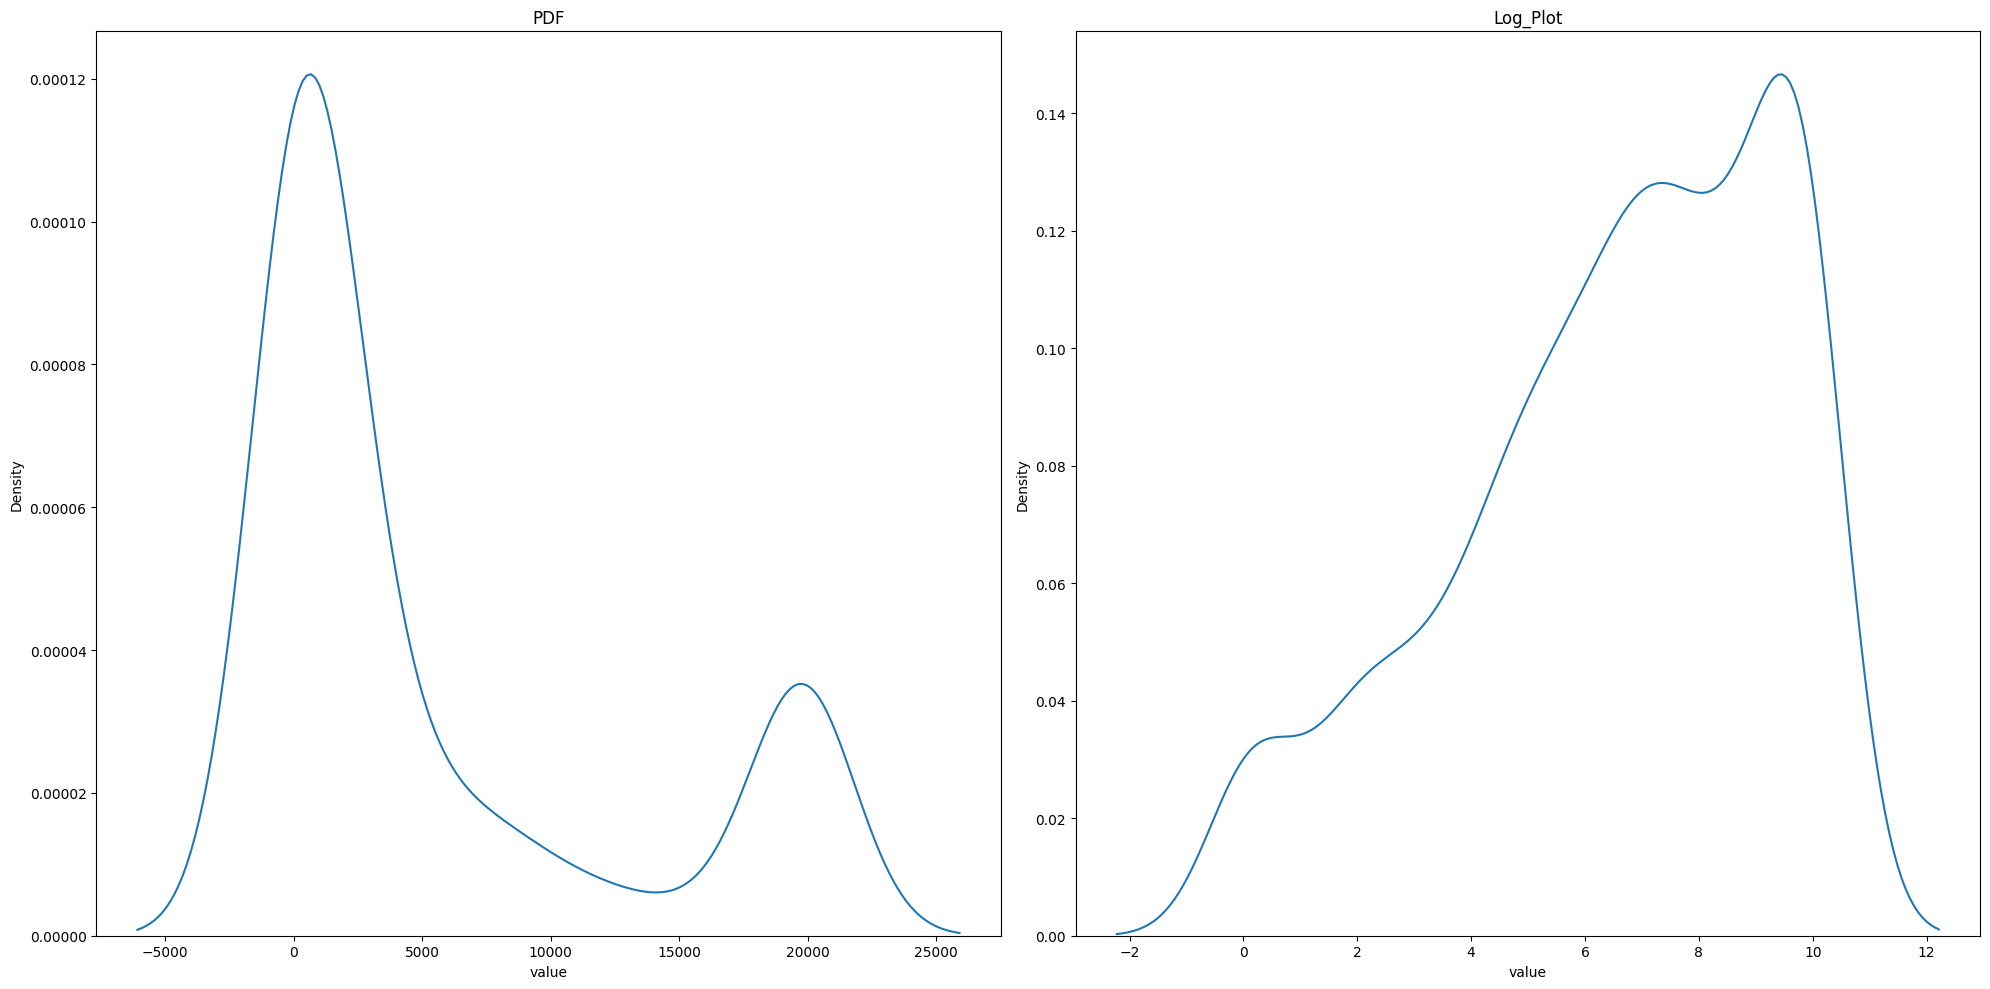

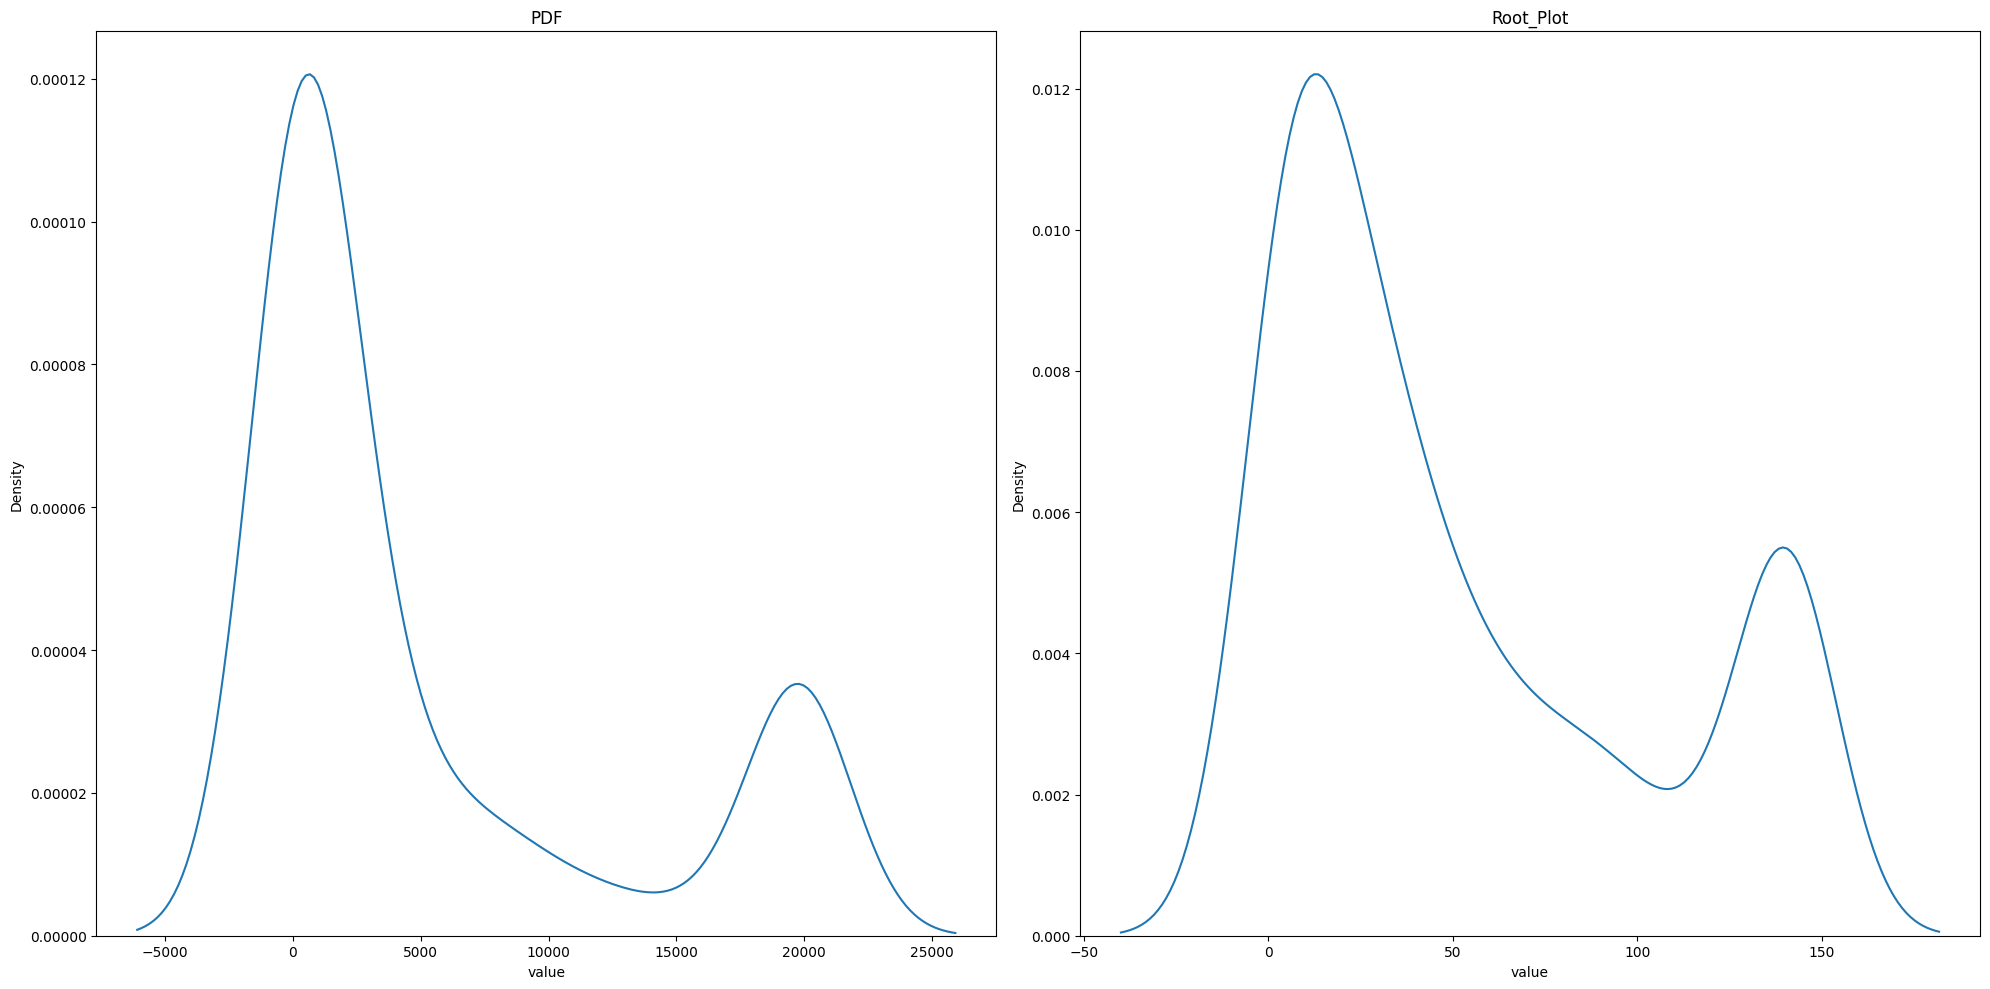

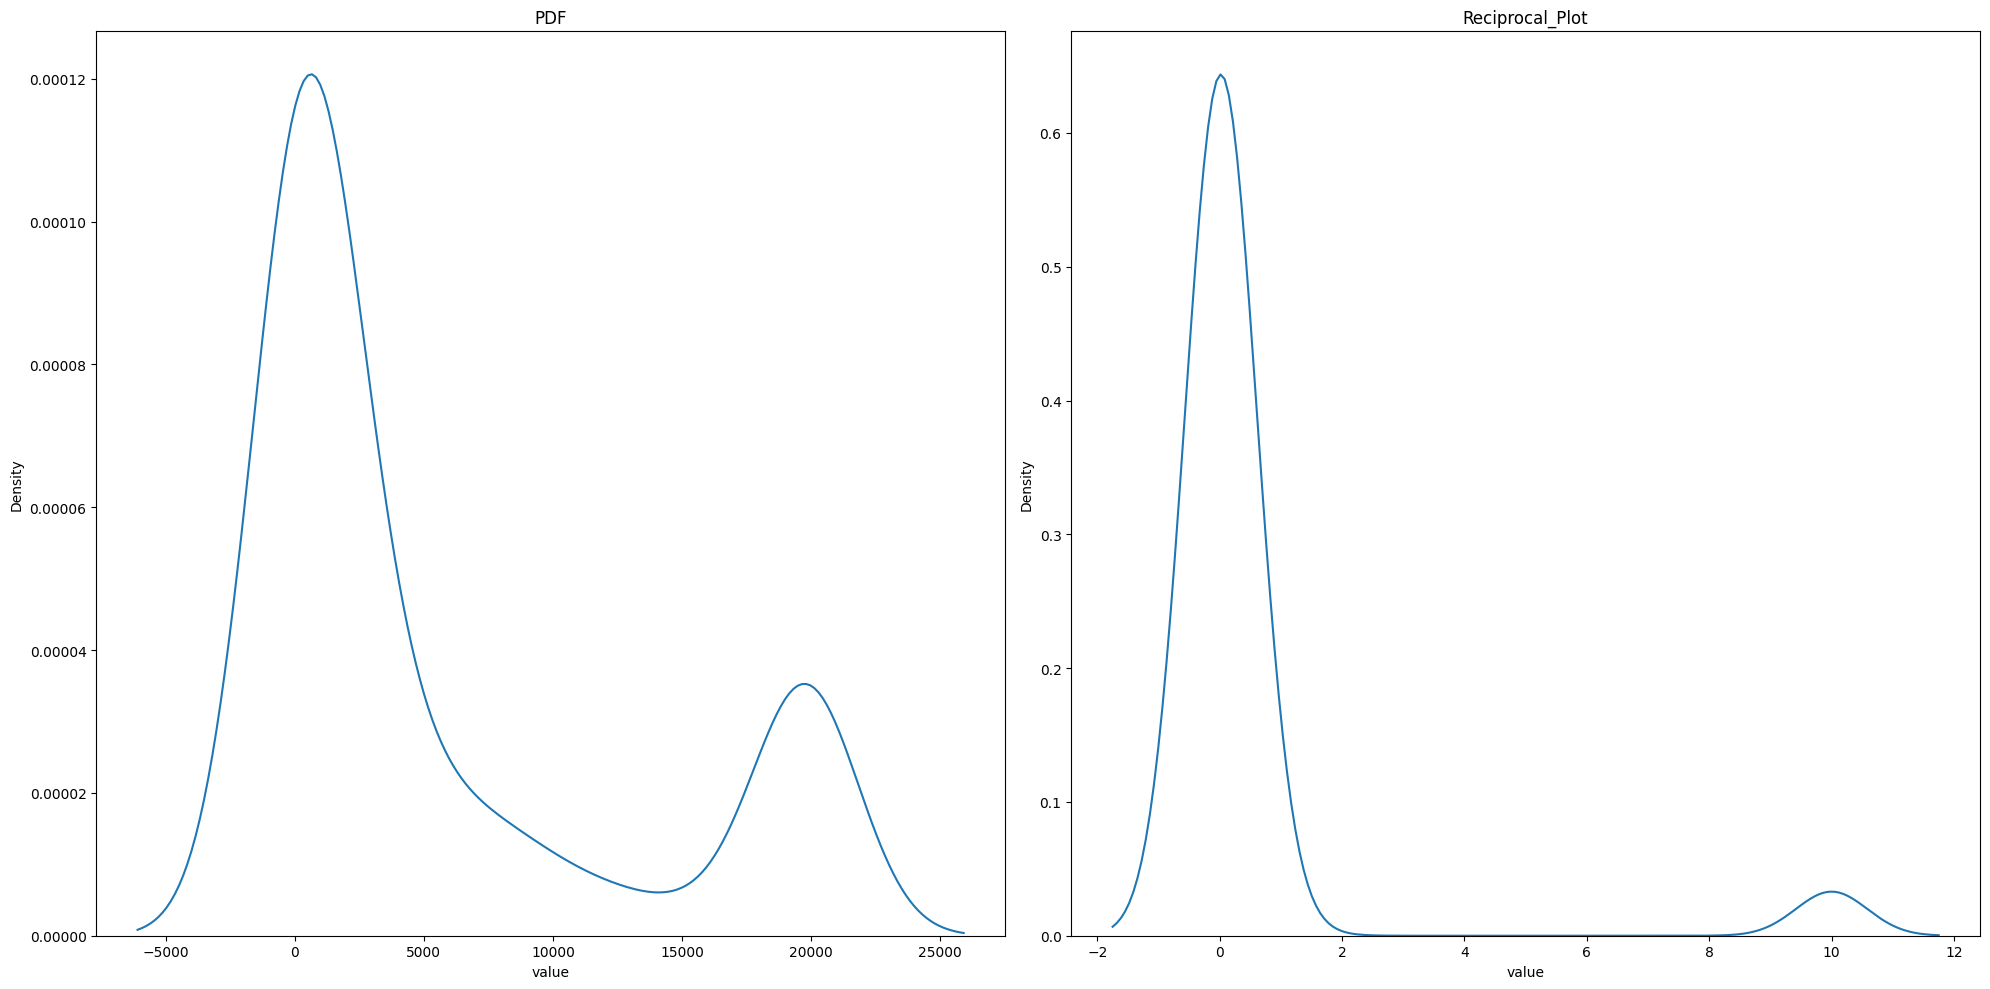

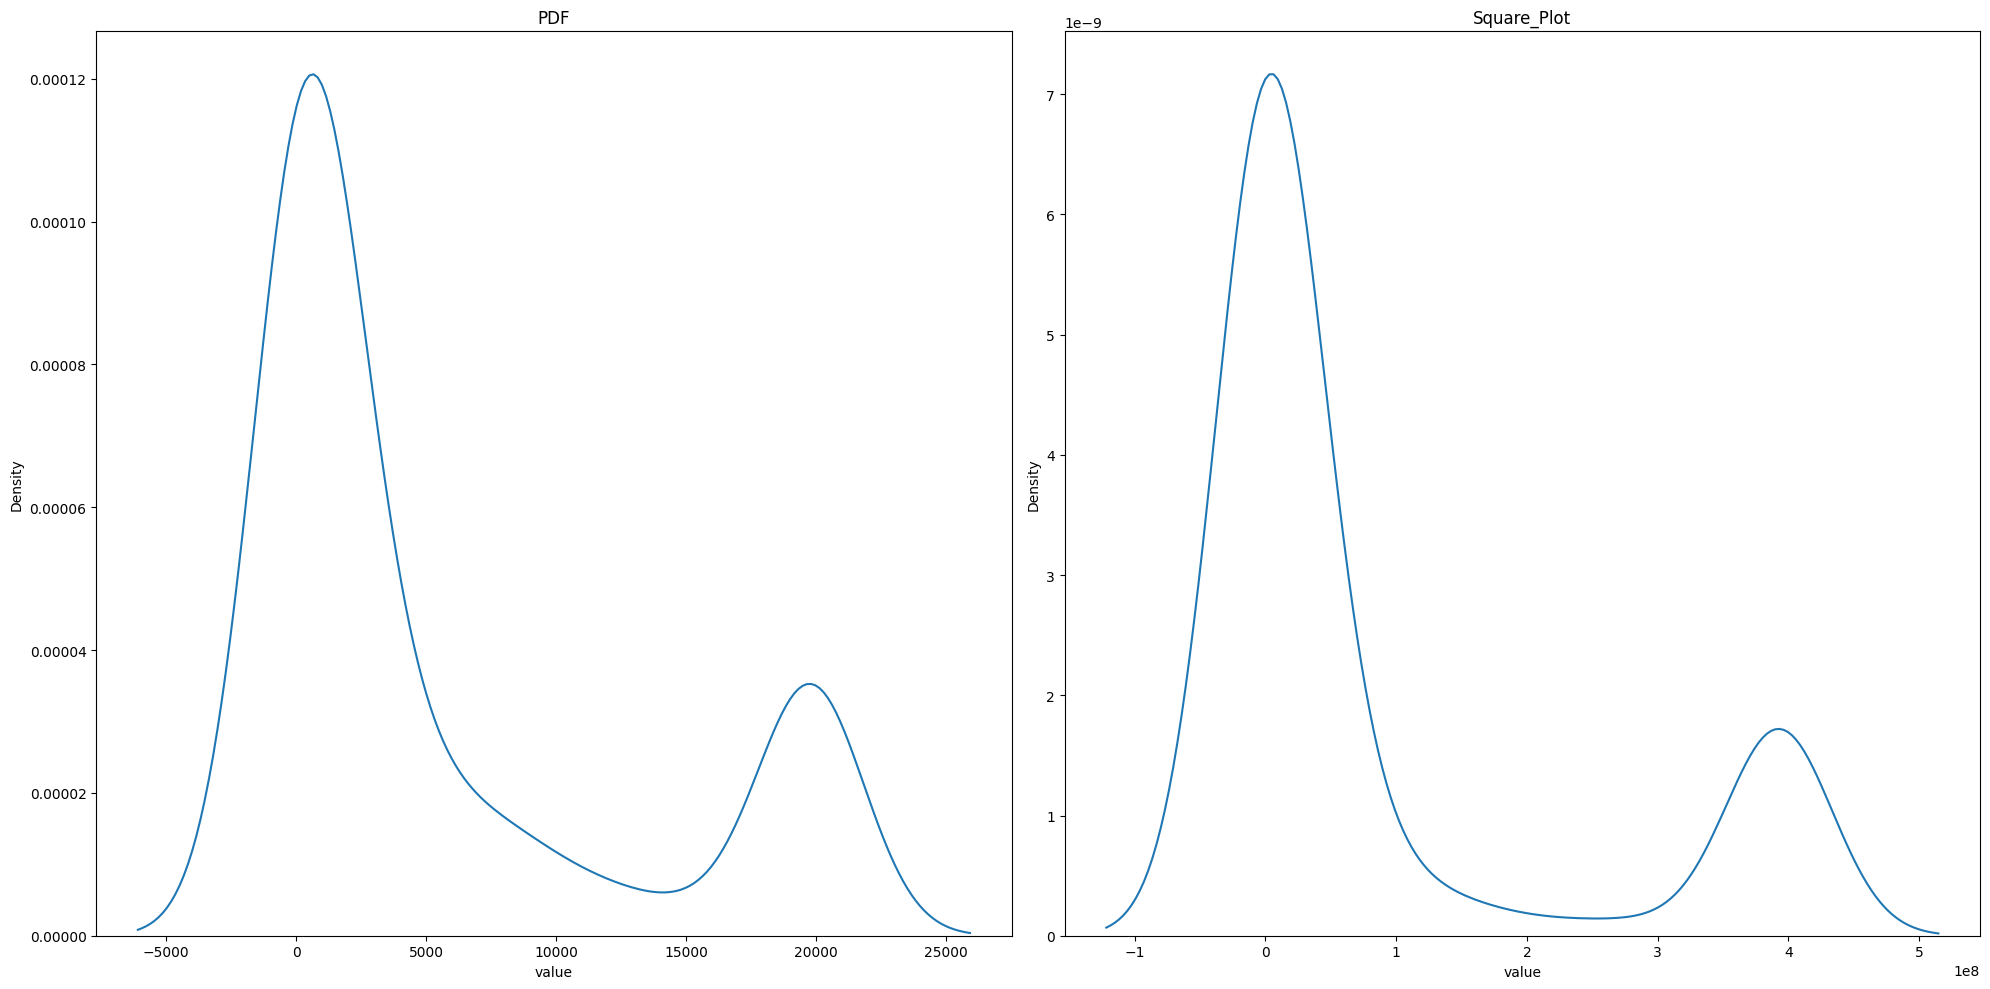

In [10]:
df3 = df[df["unit"]=="charging points"]
df3.info()
val = df3
outlier_counter("value",val)
outlier_counter("value",val)
Plotter("value",val)
Boxcox_comparator("value",val)
Log_comparator("value",val)
sqrt_comparator("value",val)
rec_comparator("value",val)
#exp_comparator("value",val)
square_comparator("value",val)

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 1002 to 9523
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      435 non-null    object 
 1   category    435 non-null    object 
 2   parameter   435 non-null    object 
 3   mode        435 non-null    object 
 4   powertrain  435 non-null    object 
 5   year        435 non-null    int64  
 6   unit        435 non-null    object 
 7   value       435 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 30.6+ KB
54
0


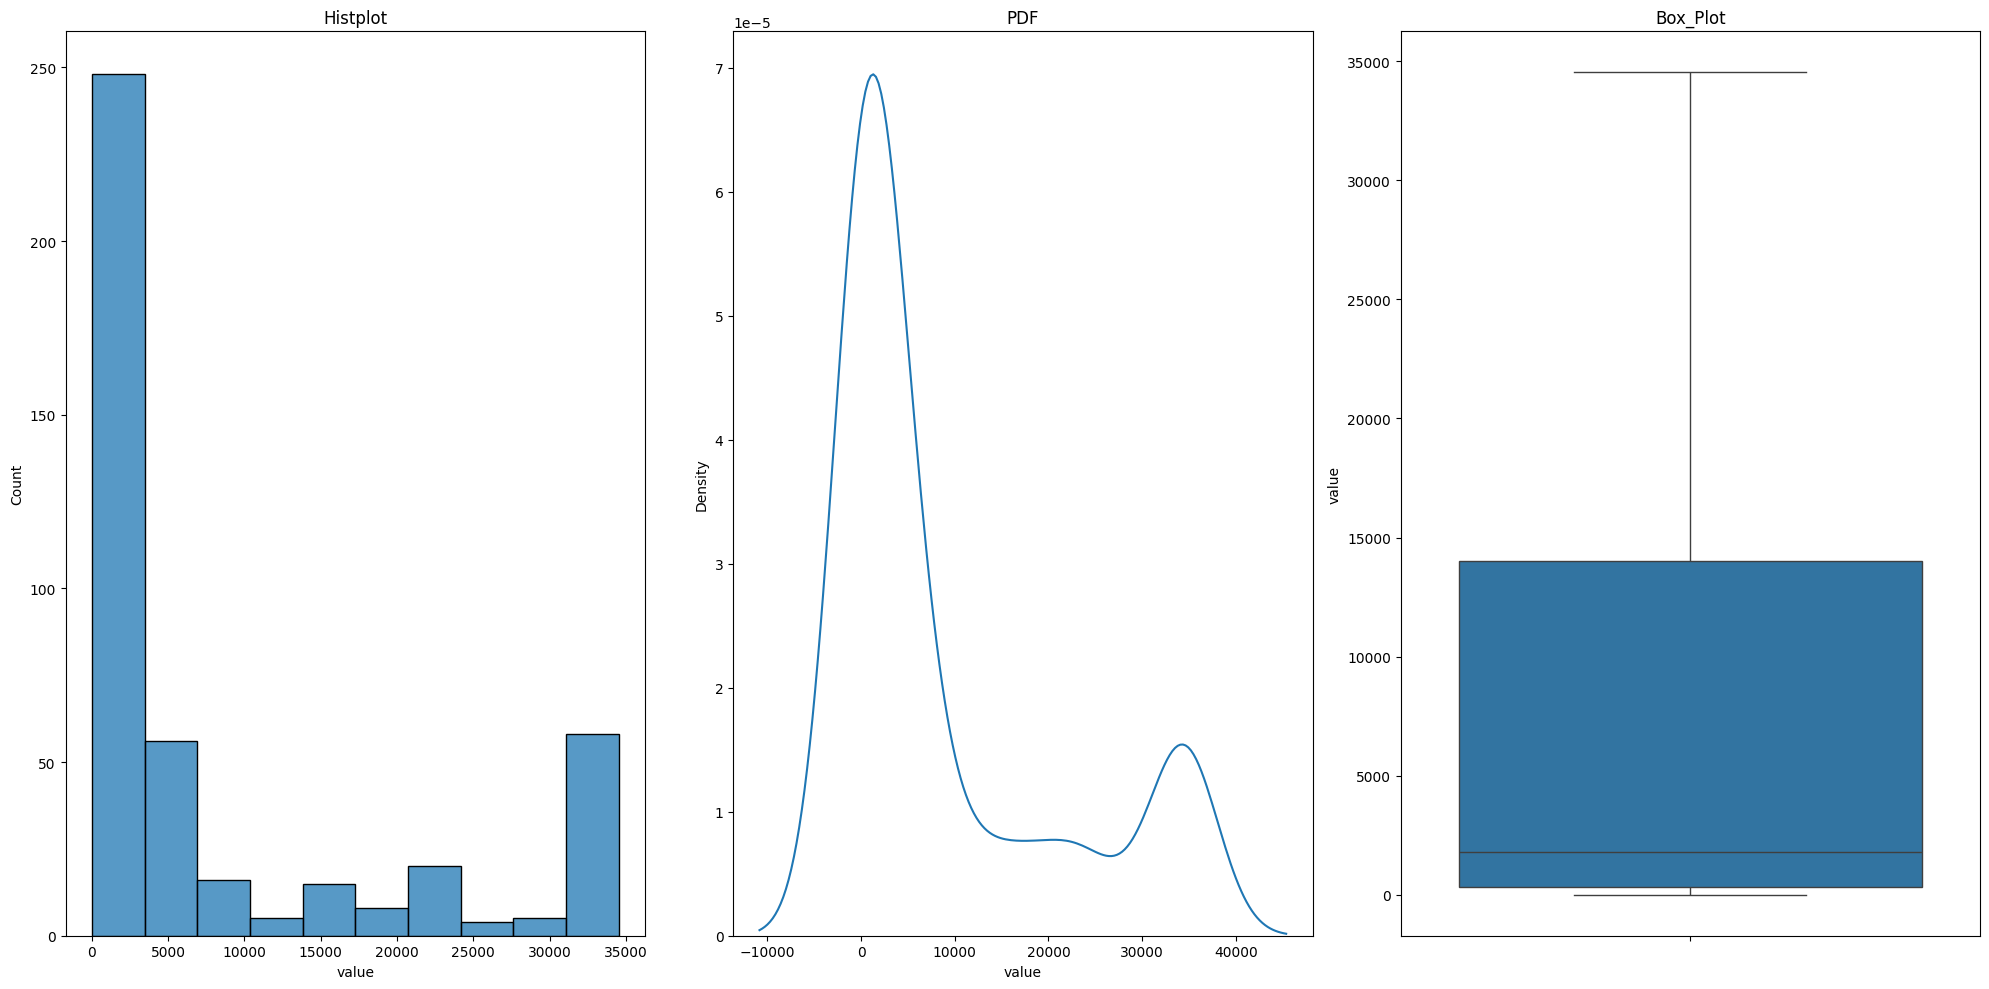

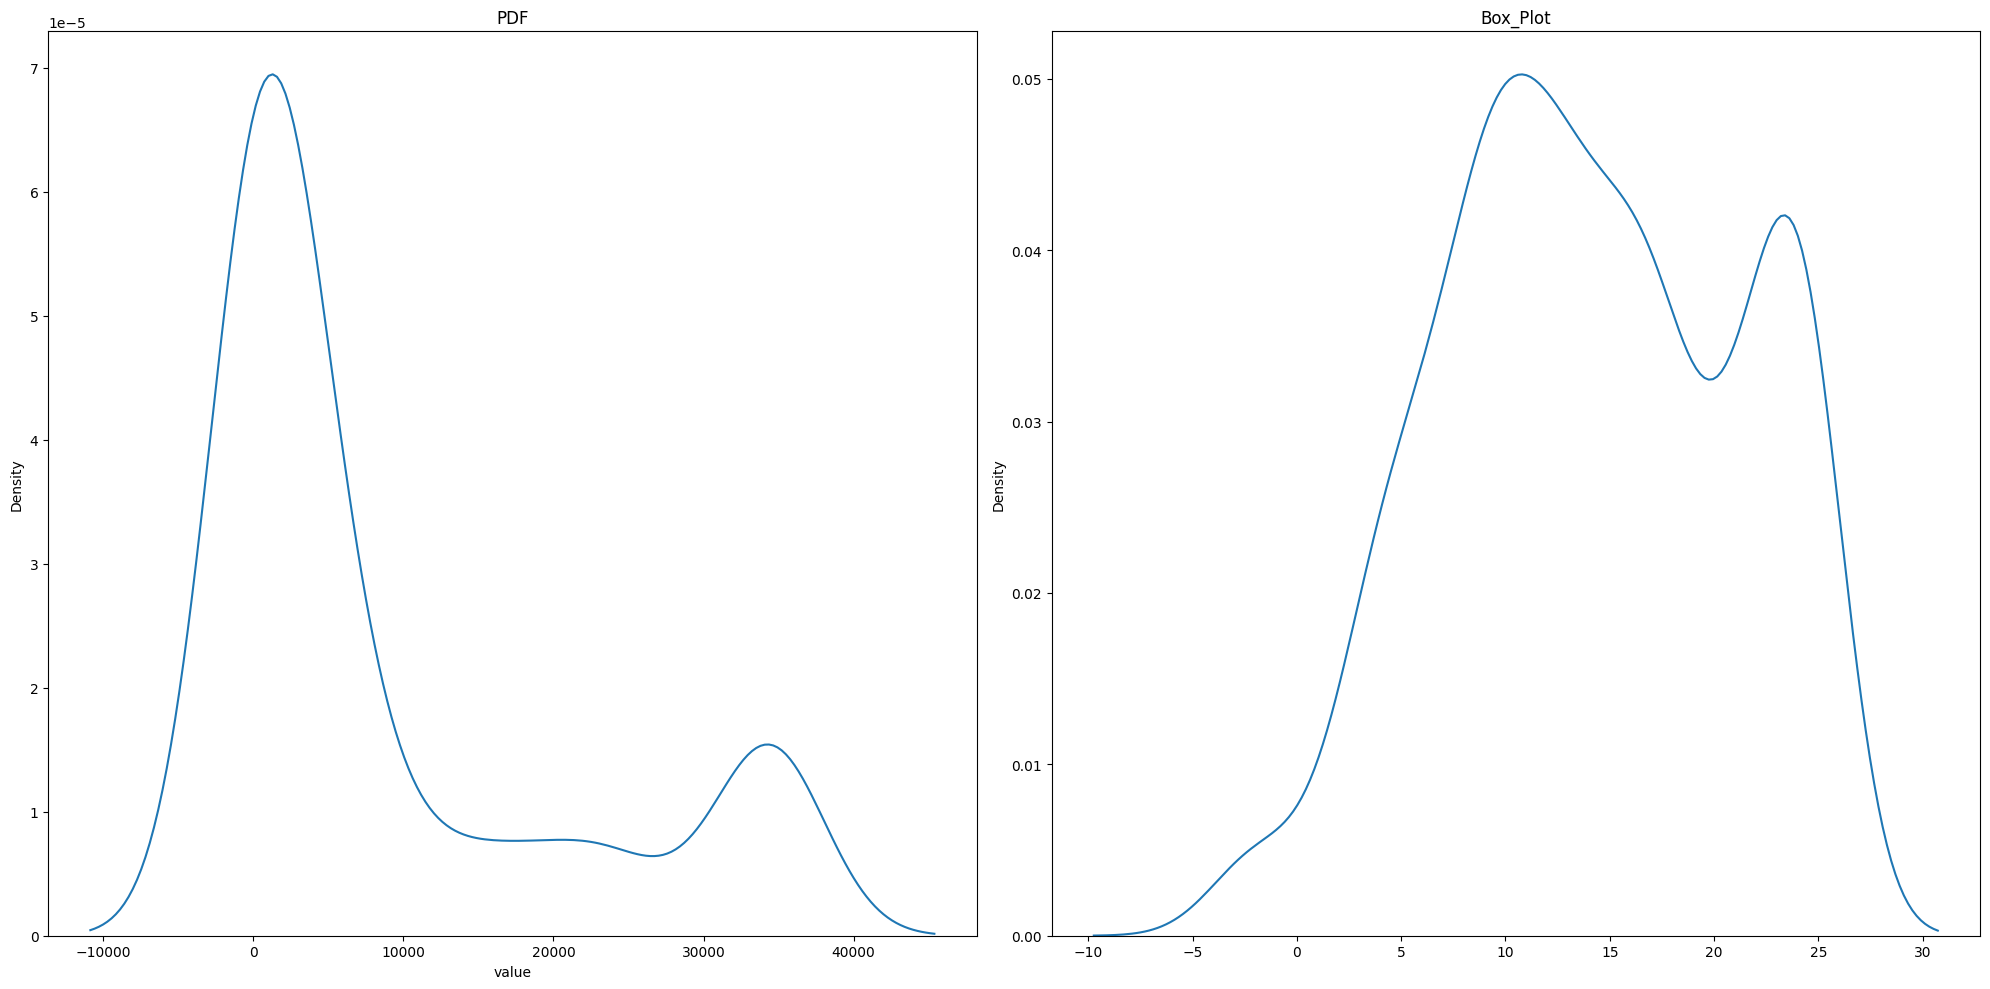

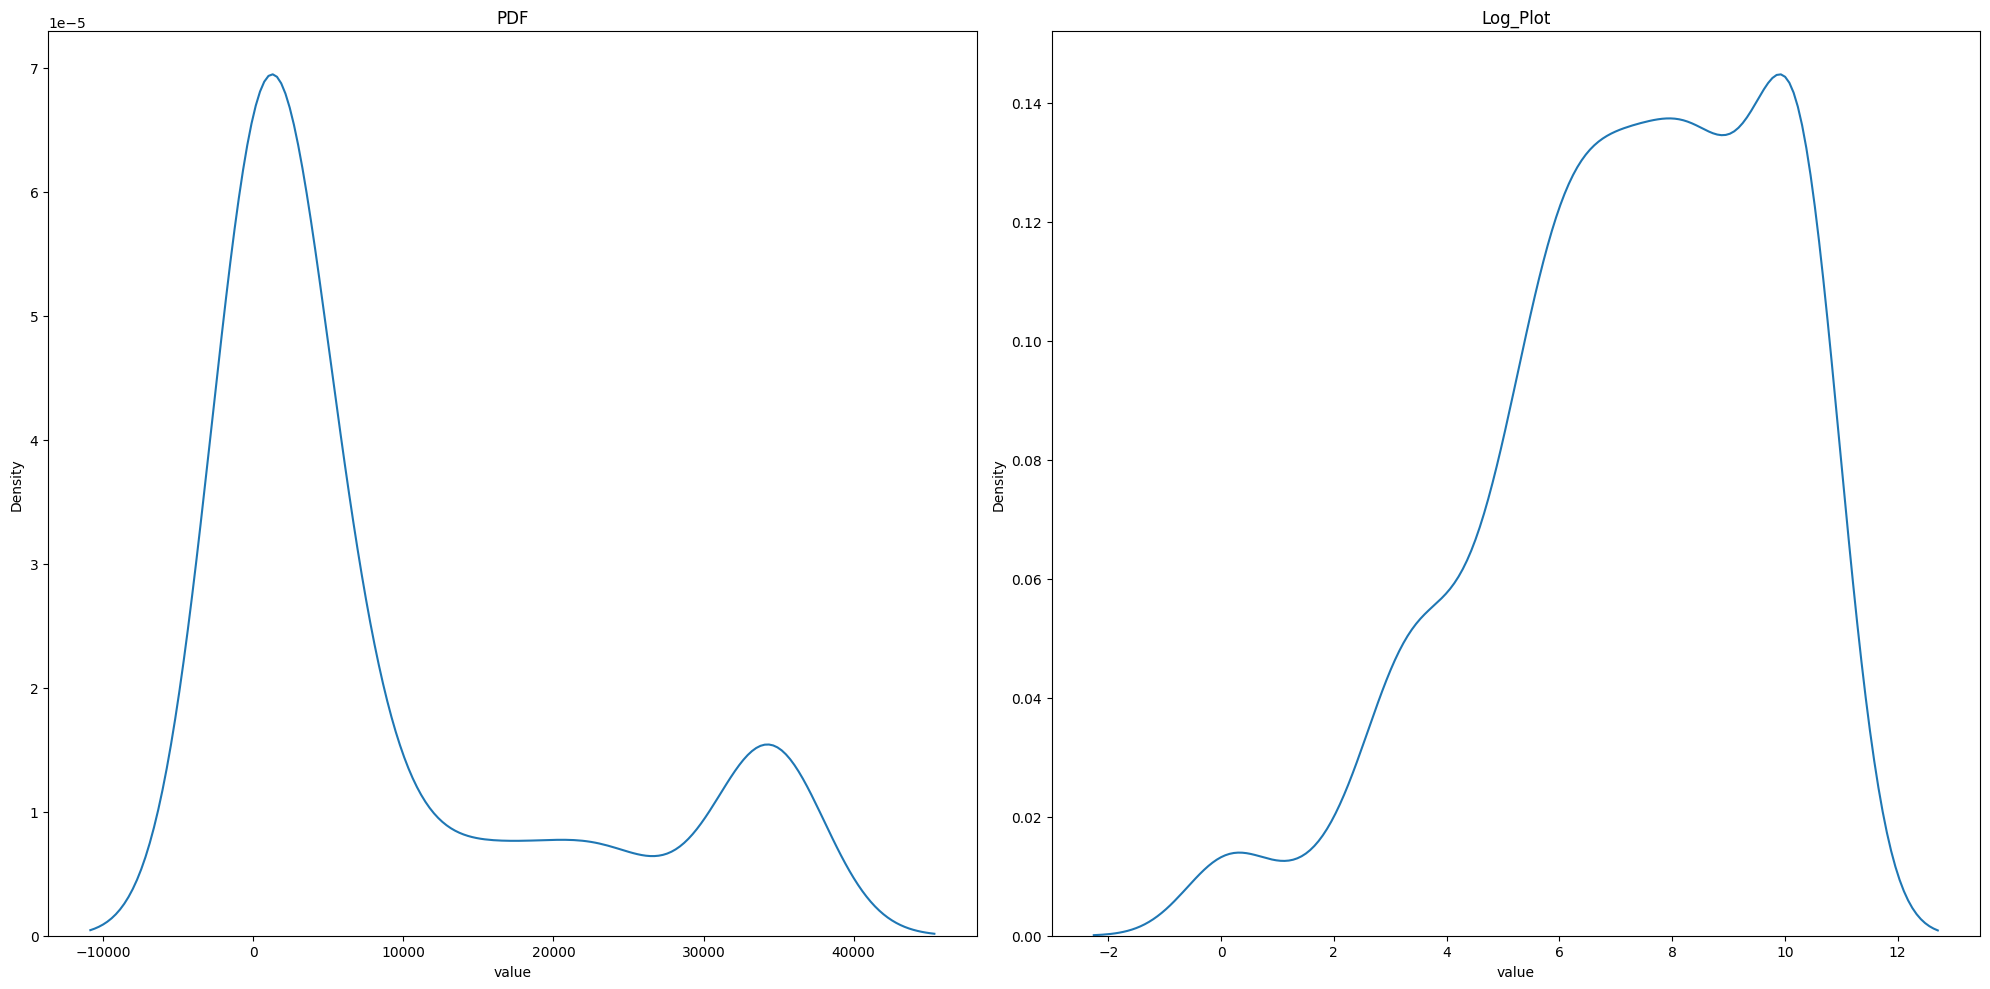

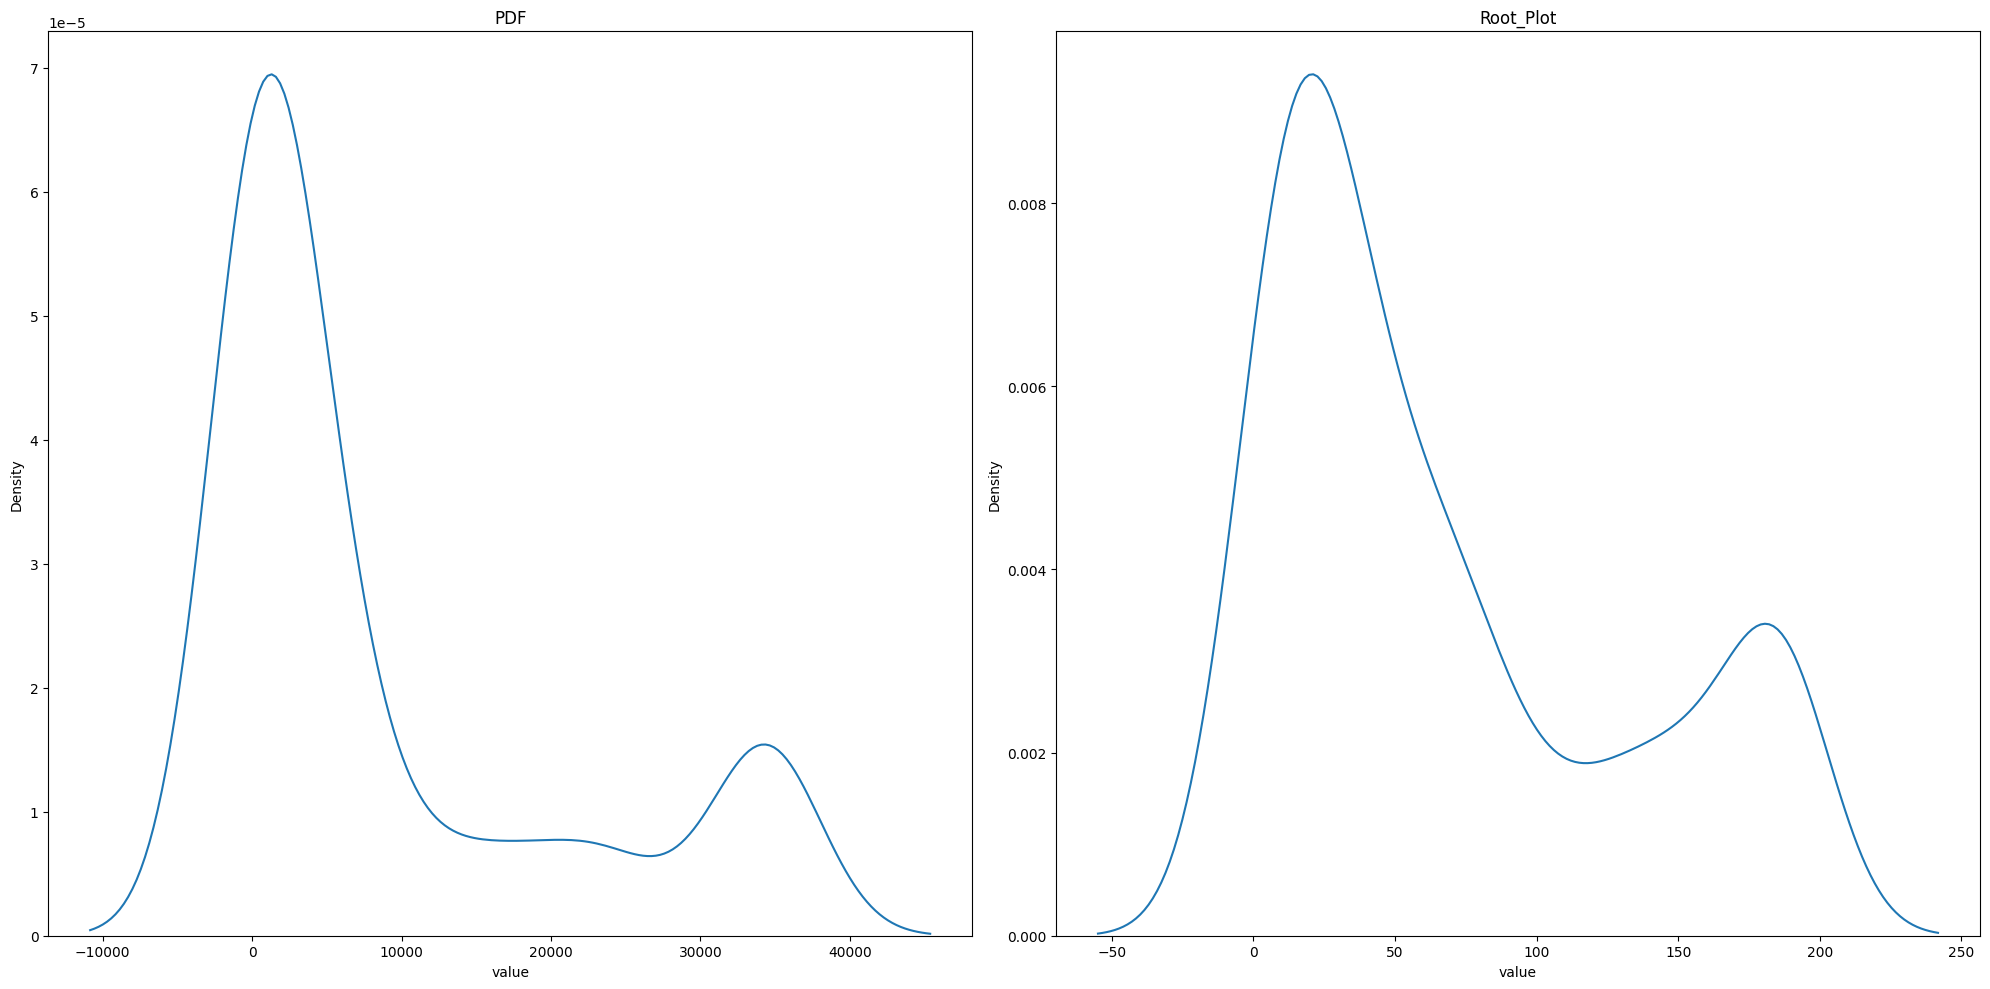

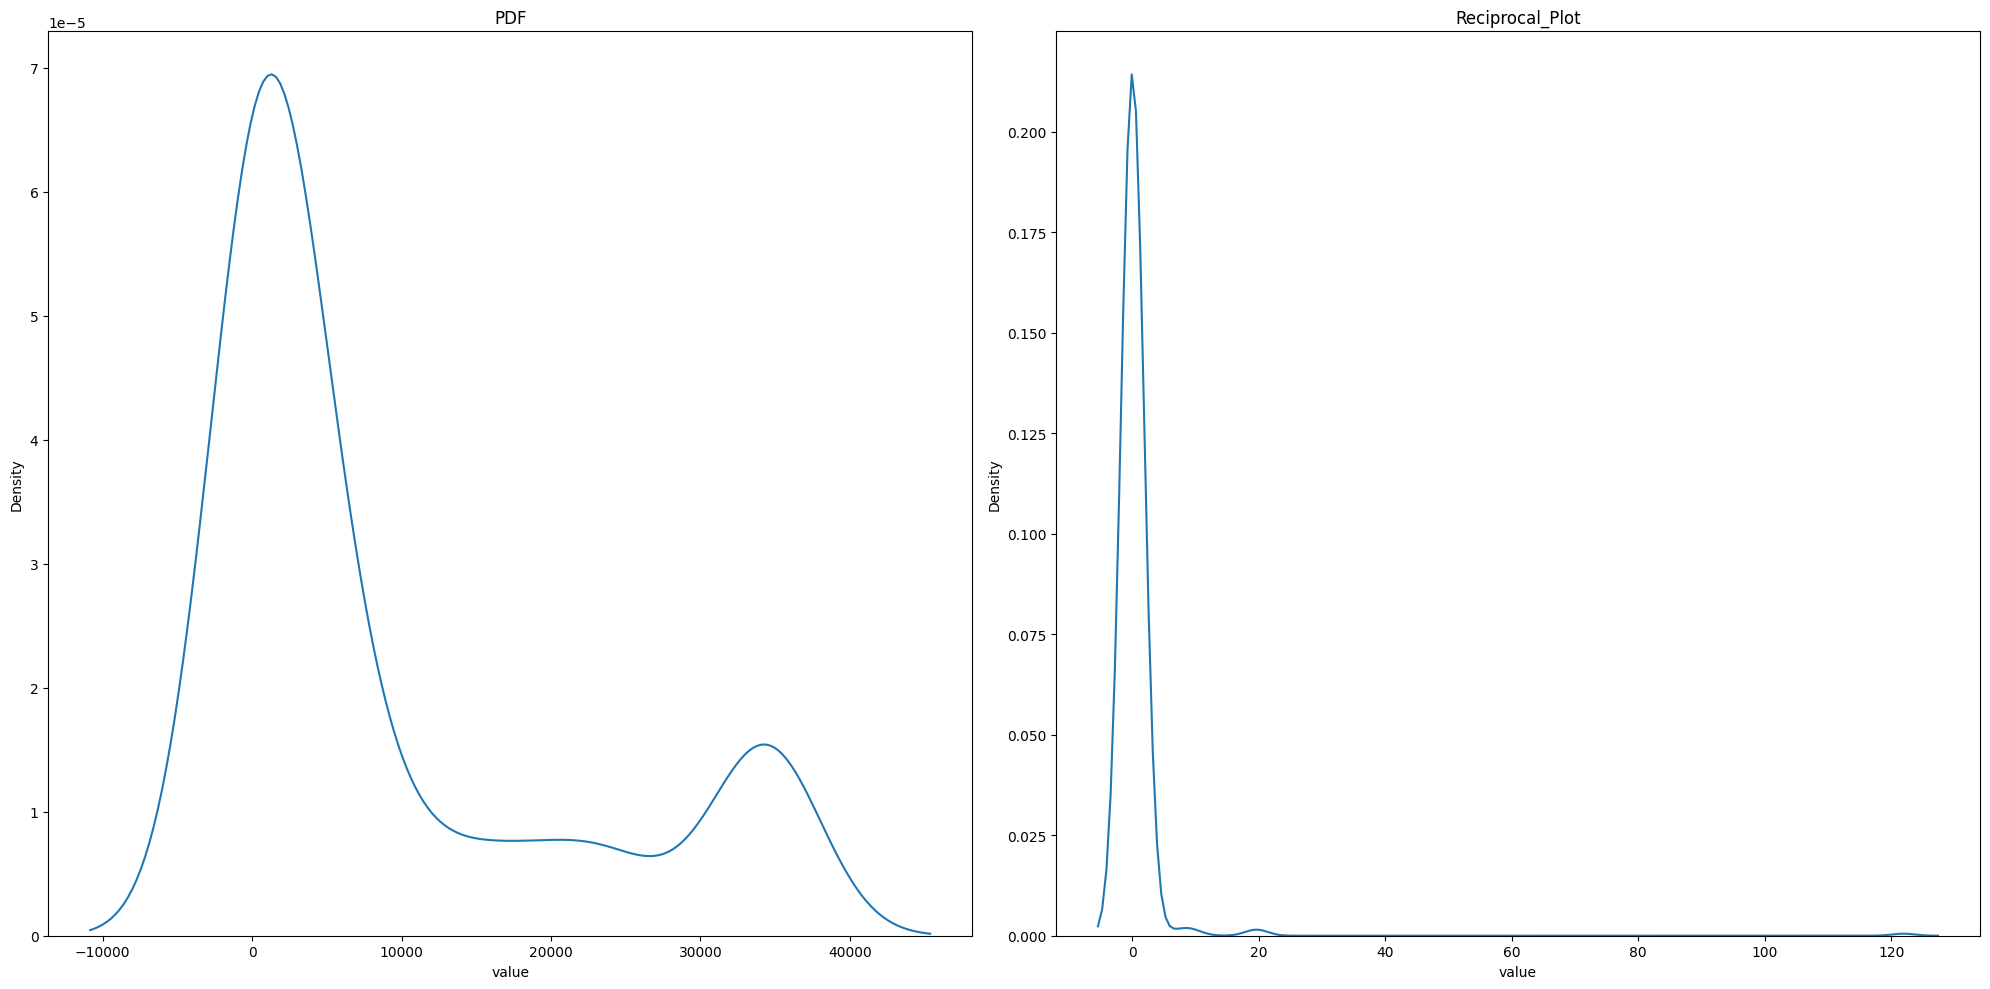

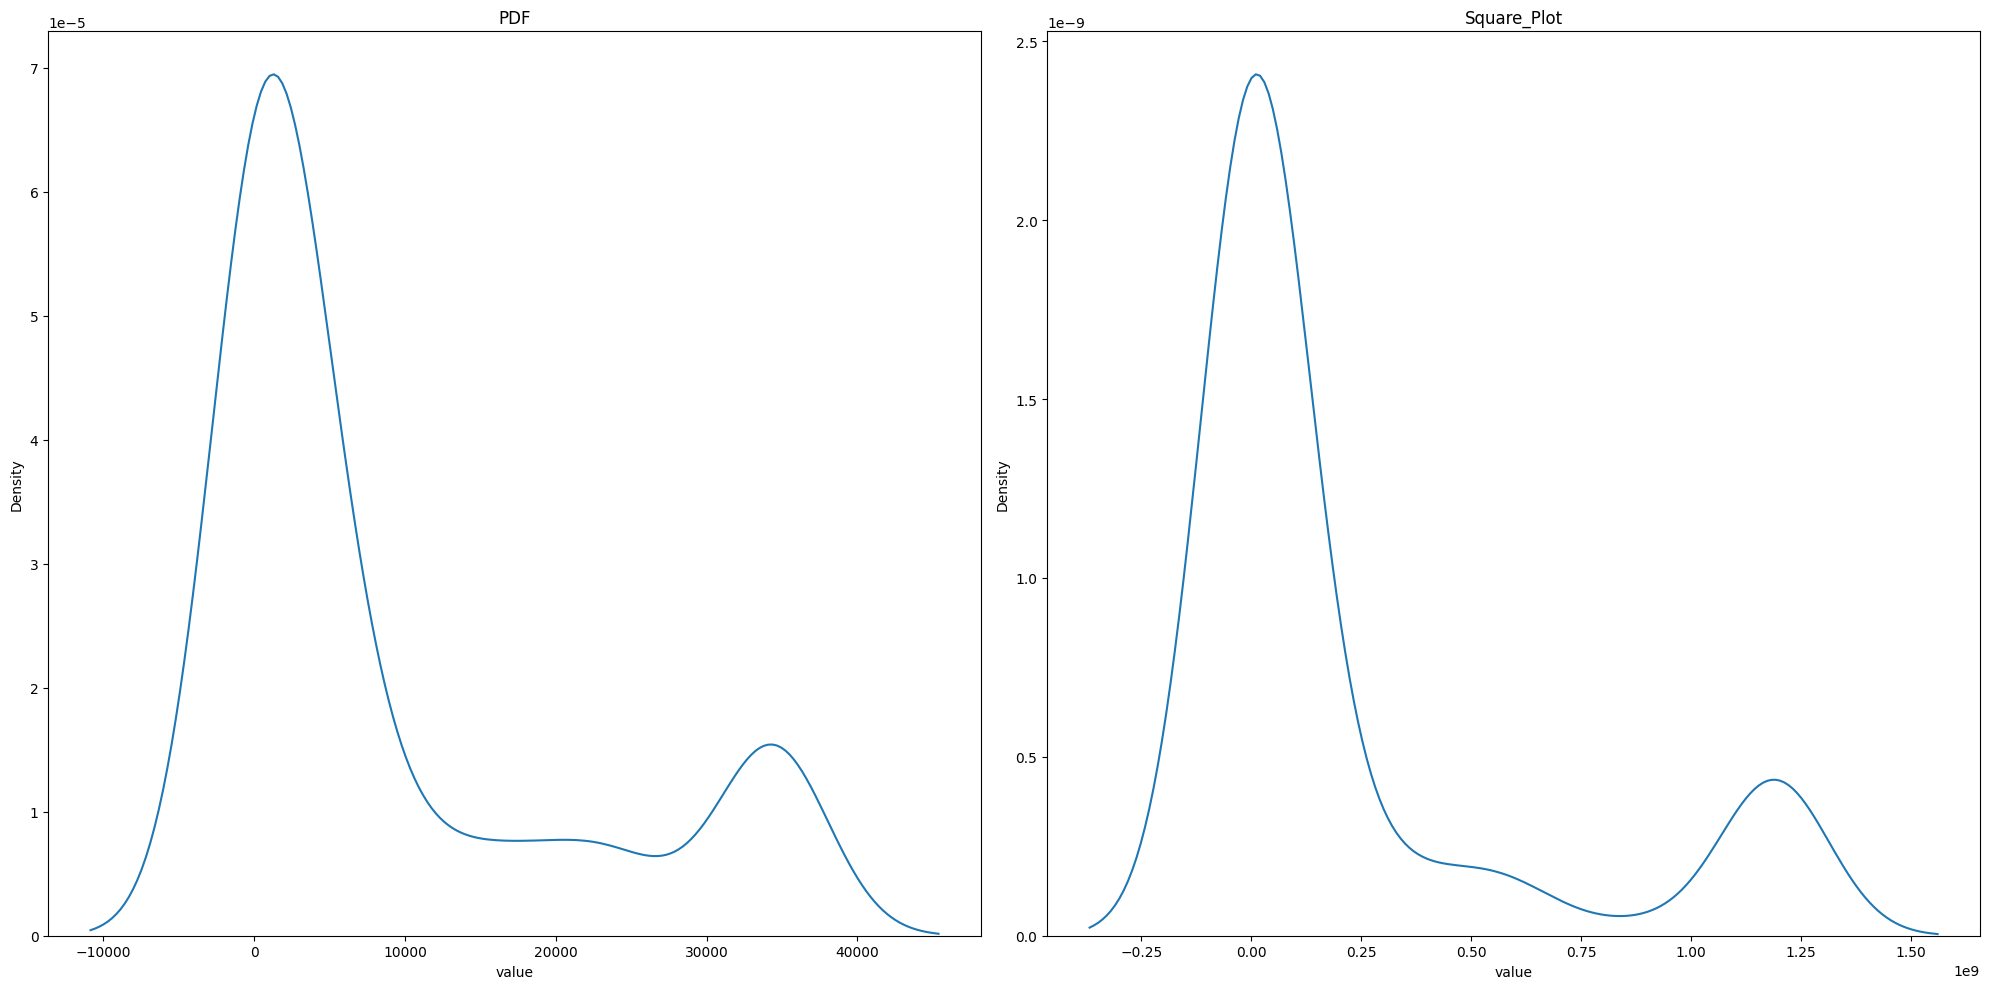

In [11]:
df4 = df[df["unit"]=="GWh"]
df4.info()
val = df4
outlier_counter("value",val)
outlier_counter("value",val)
Plotter("value",val)
Boxcox_comparator("value",val)
Log_comparator("value",val)
sqrt_comparator("value",val)
rec_comparator("value",val)
#exp_comparator("value",val)
square_comparator("value",val)

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1006 to 9503
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      466 non-null    object 
 1   category    466 non-null    object 
 2   parameter   466 non-null    object 
 3   mode        466 non-null    object 
 4   powertrain  466 non-null    object 
 5   year        466 non-null    int64  
 6   unit        466 non-null    object 
 7   value       466 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 32.8+ KB
52
0


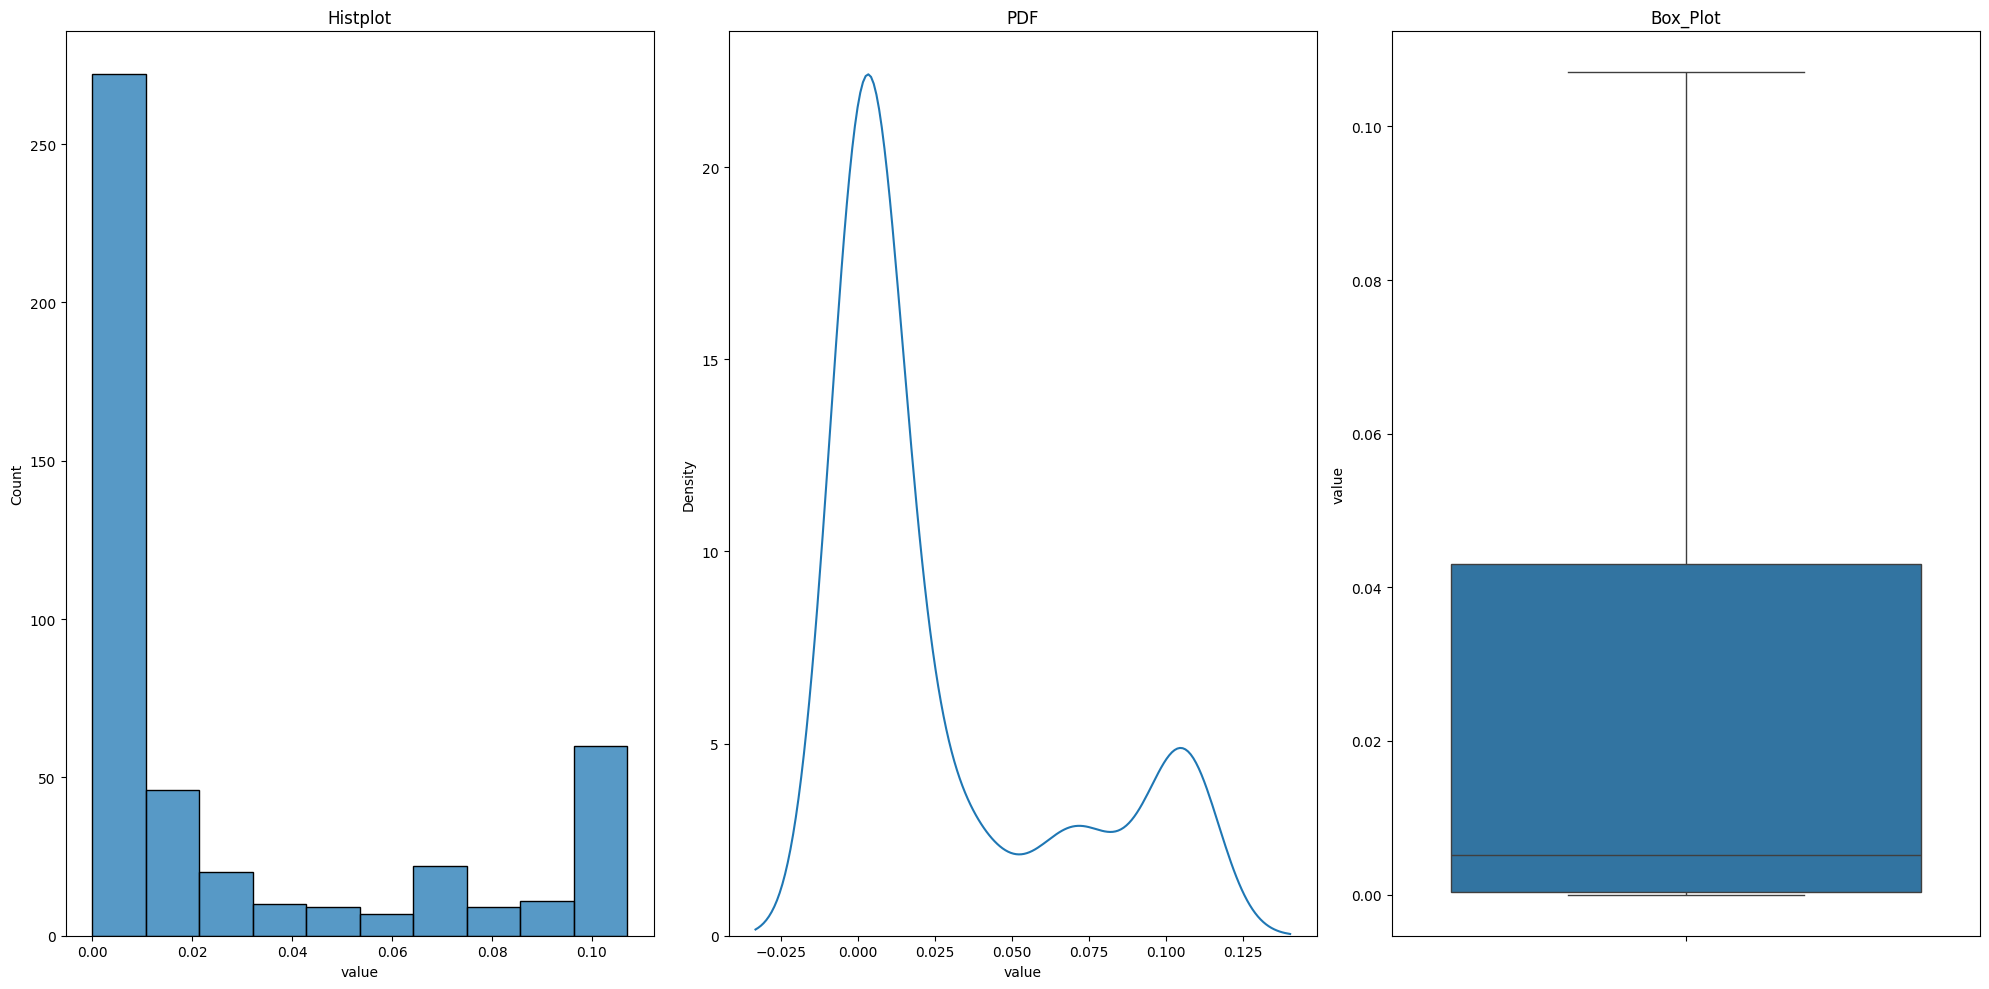

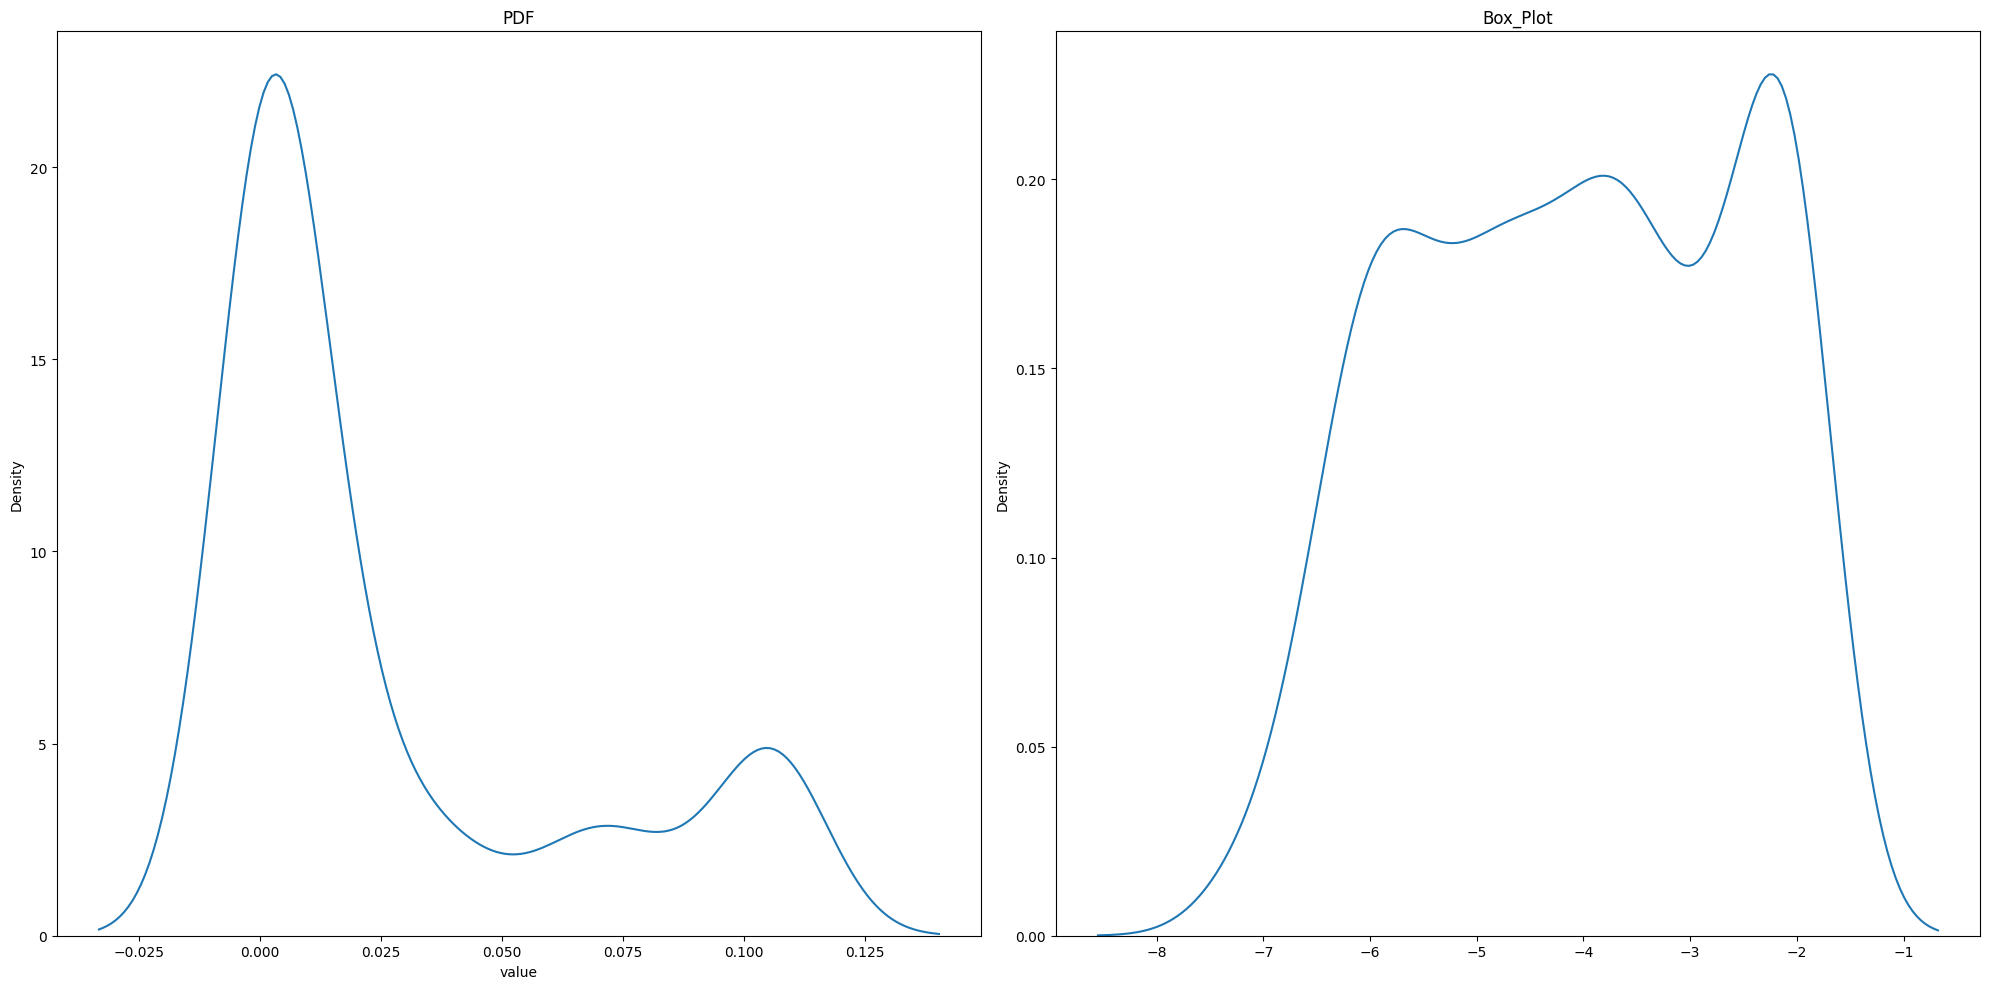

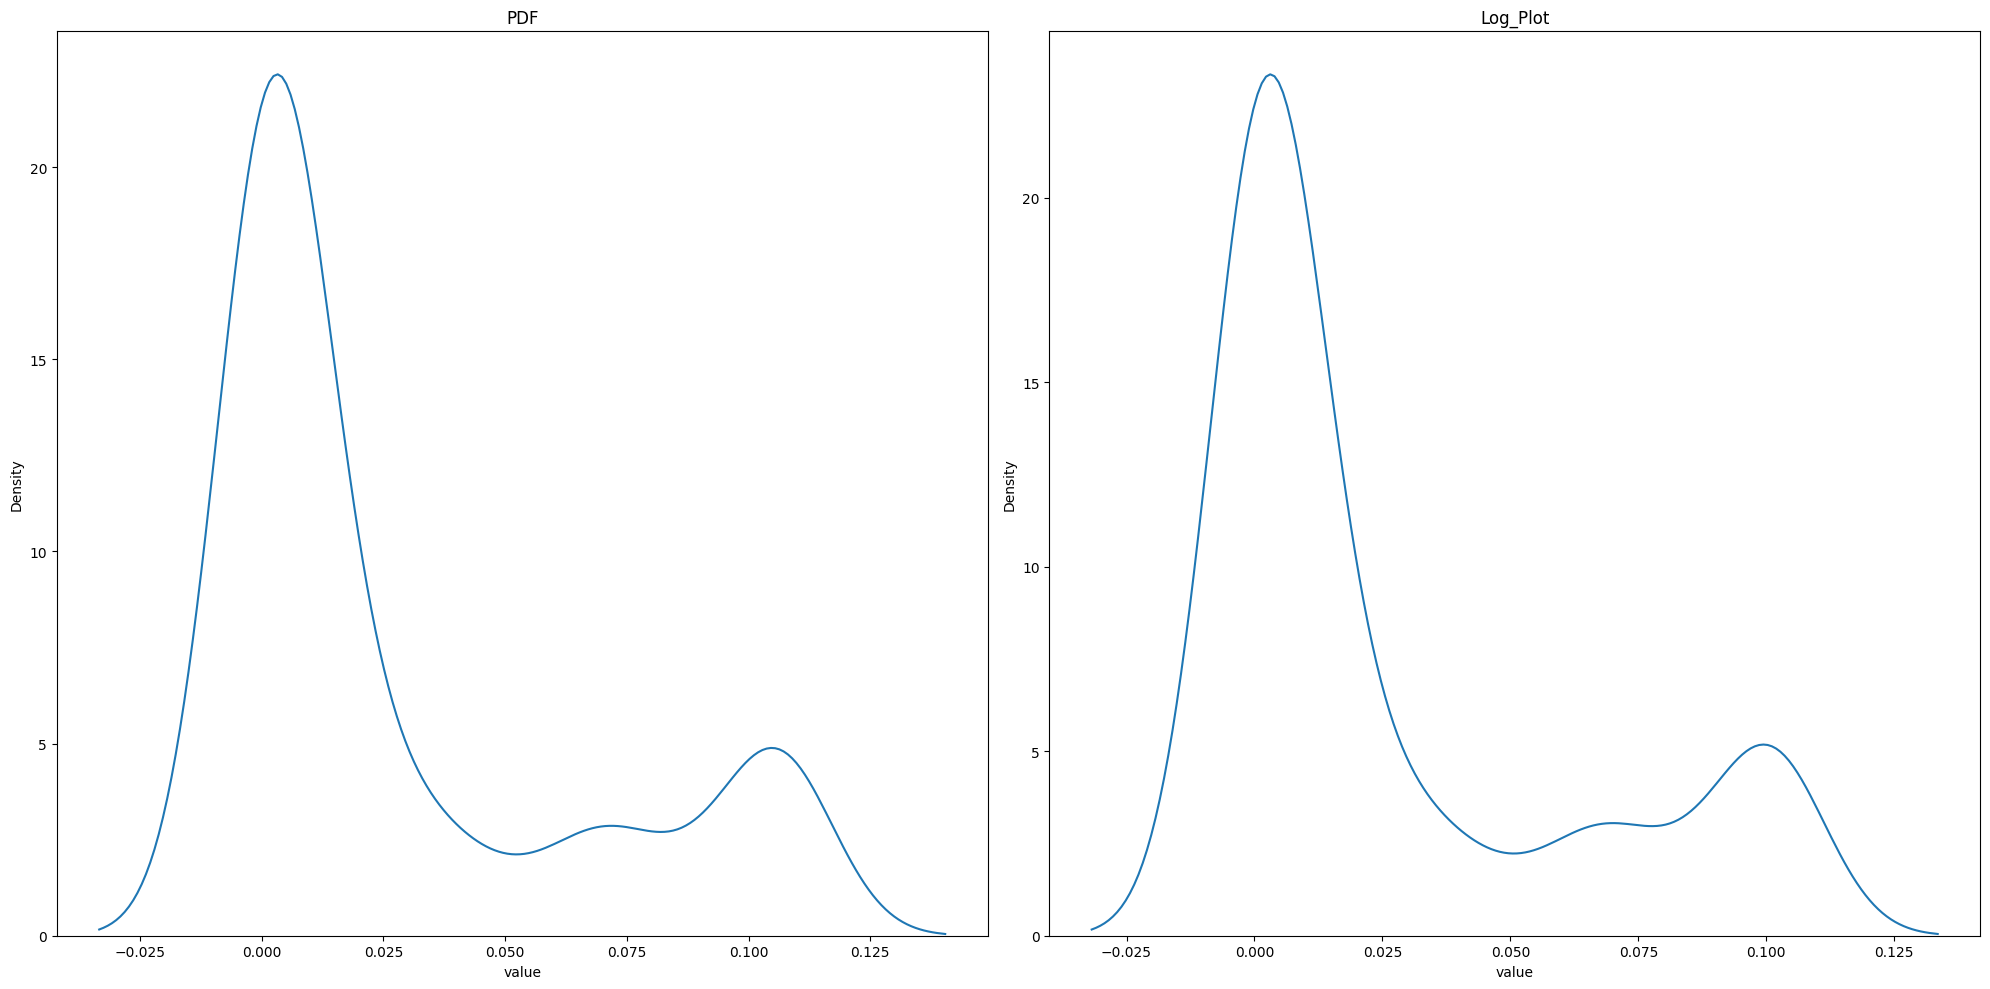

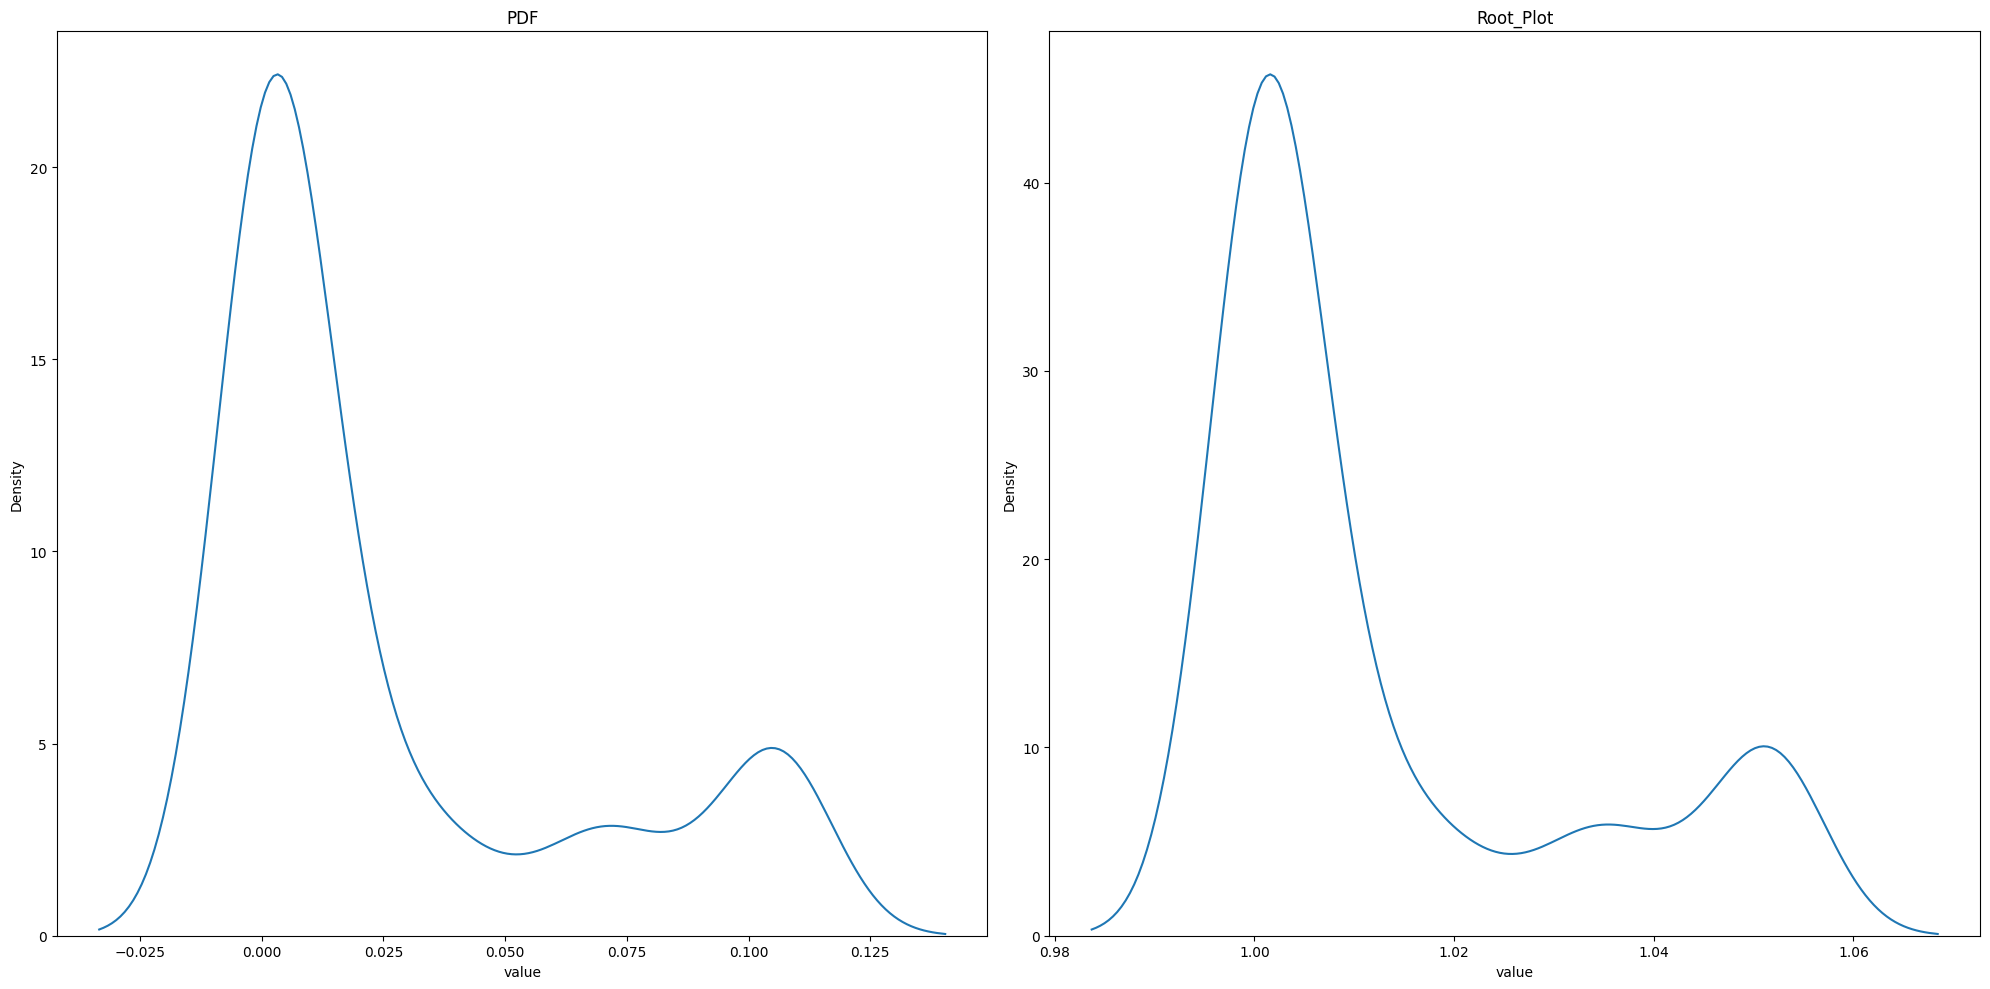

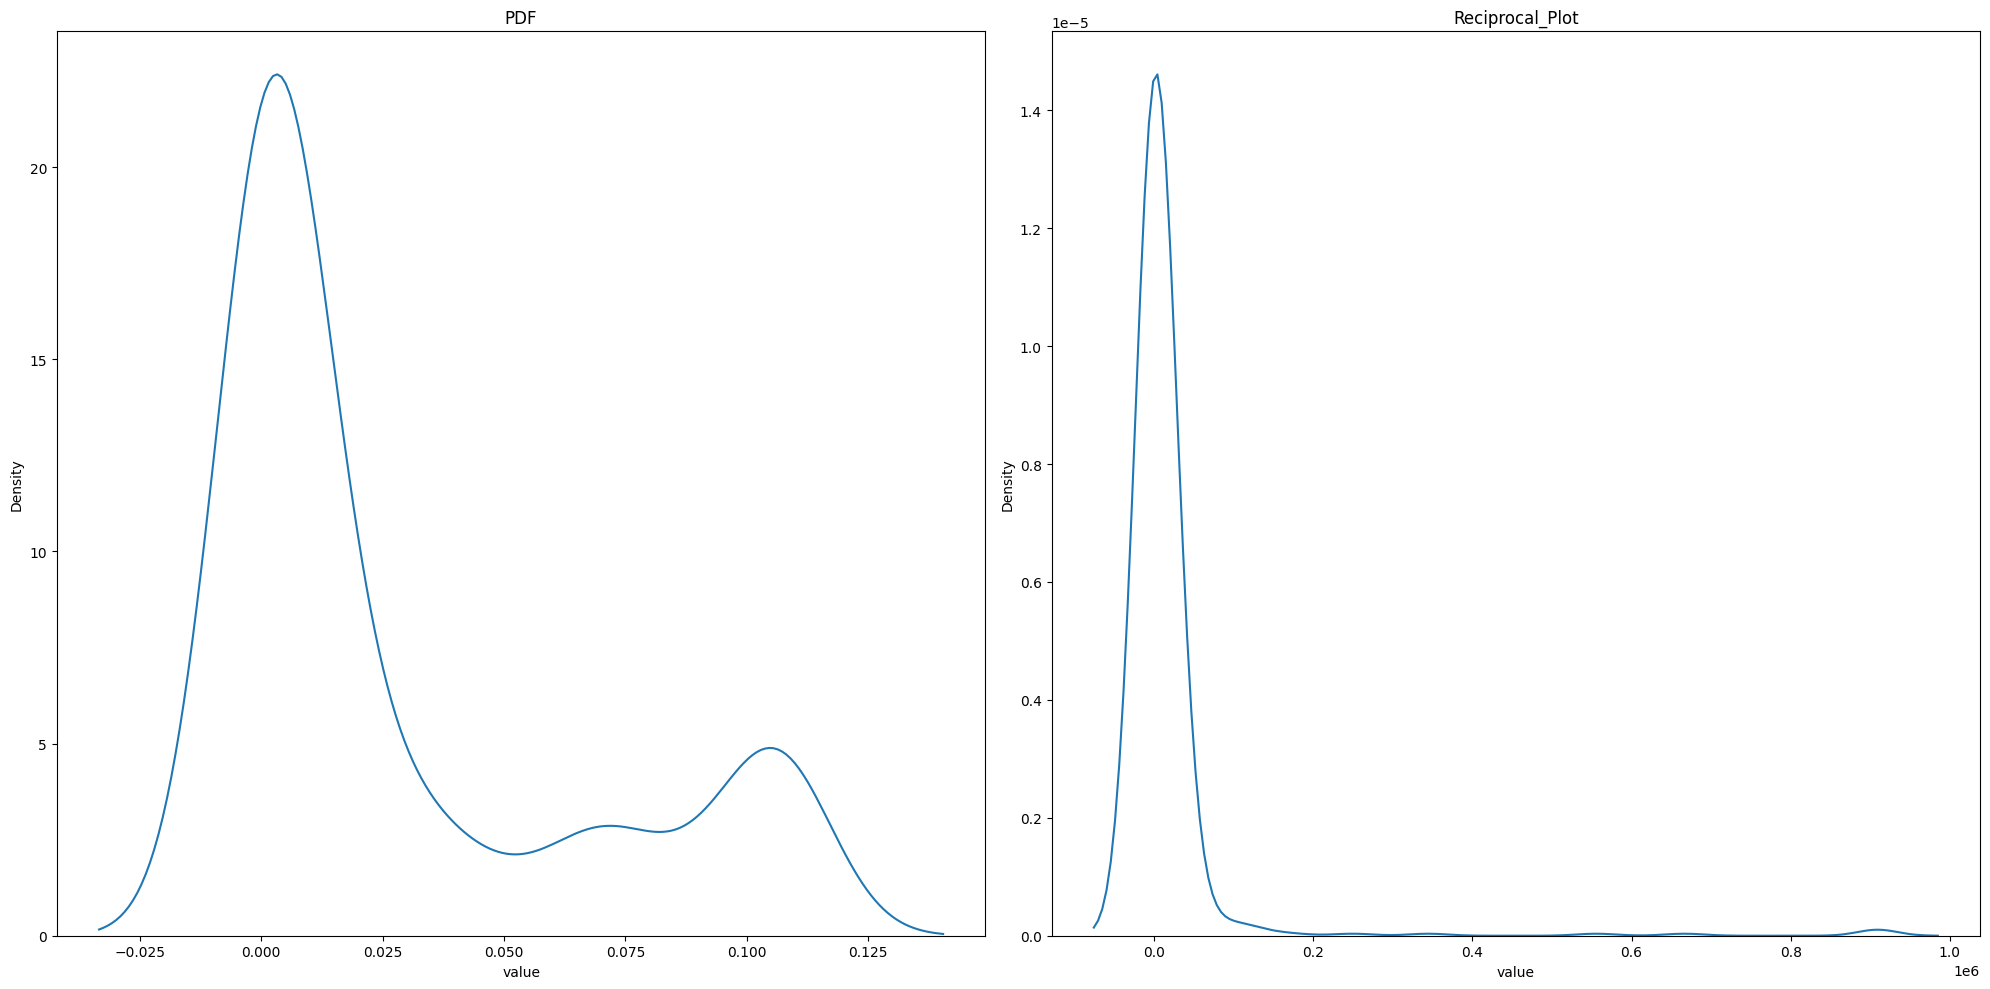

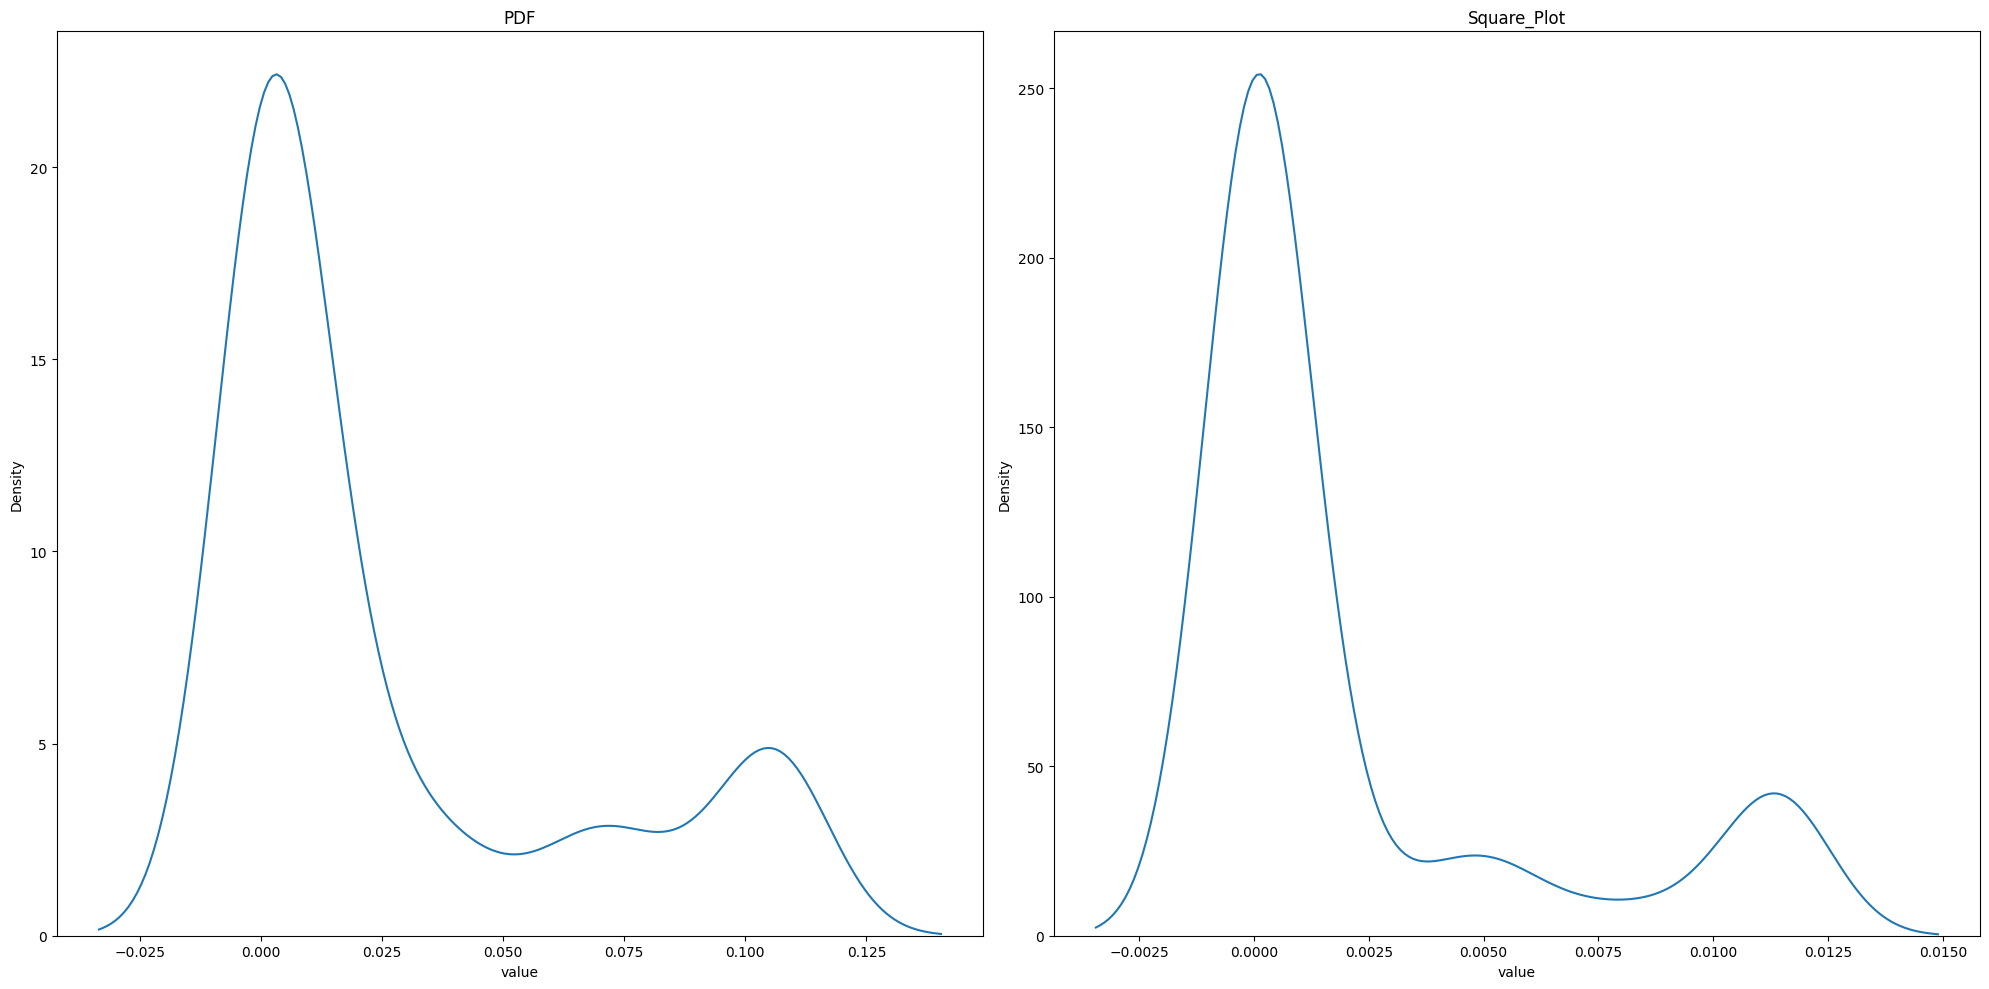

In [12]:
df5 = df[df["unit"]=="Milion barrels per day"]
df5.info()
val = df5
outlier_counter("value",val)
outlier_counter("value",val)
Plotter("value",val)
Boxcox_comparator("value",val)
Log_comparator("value",val)
sqrt_comparator("value",val)
rec_comparator("value",val)
#exp_comparator("value",val)
square_comparator("value",val)

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1010 to 9507
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      466 non-null    object 
 1   category    466 non-null    object 
 2   parameter   466 non-null    object 
 3   mode        466 non-null    object 
 4   powertrain  466 non-null    object 
 5   year        466 non-null    int64  
 6   unit        466 non-null    object 
 7   value       466 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 32.8+ KB
51
0


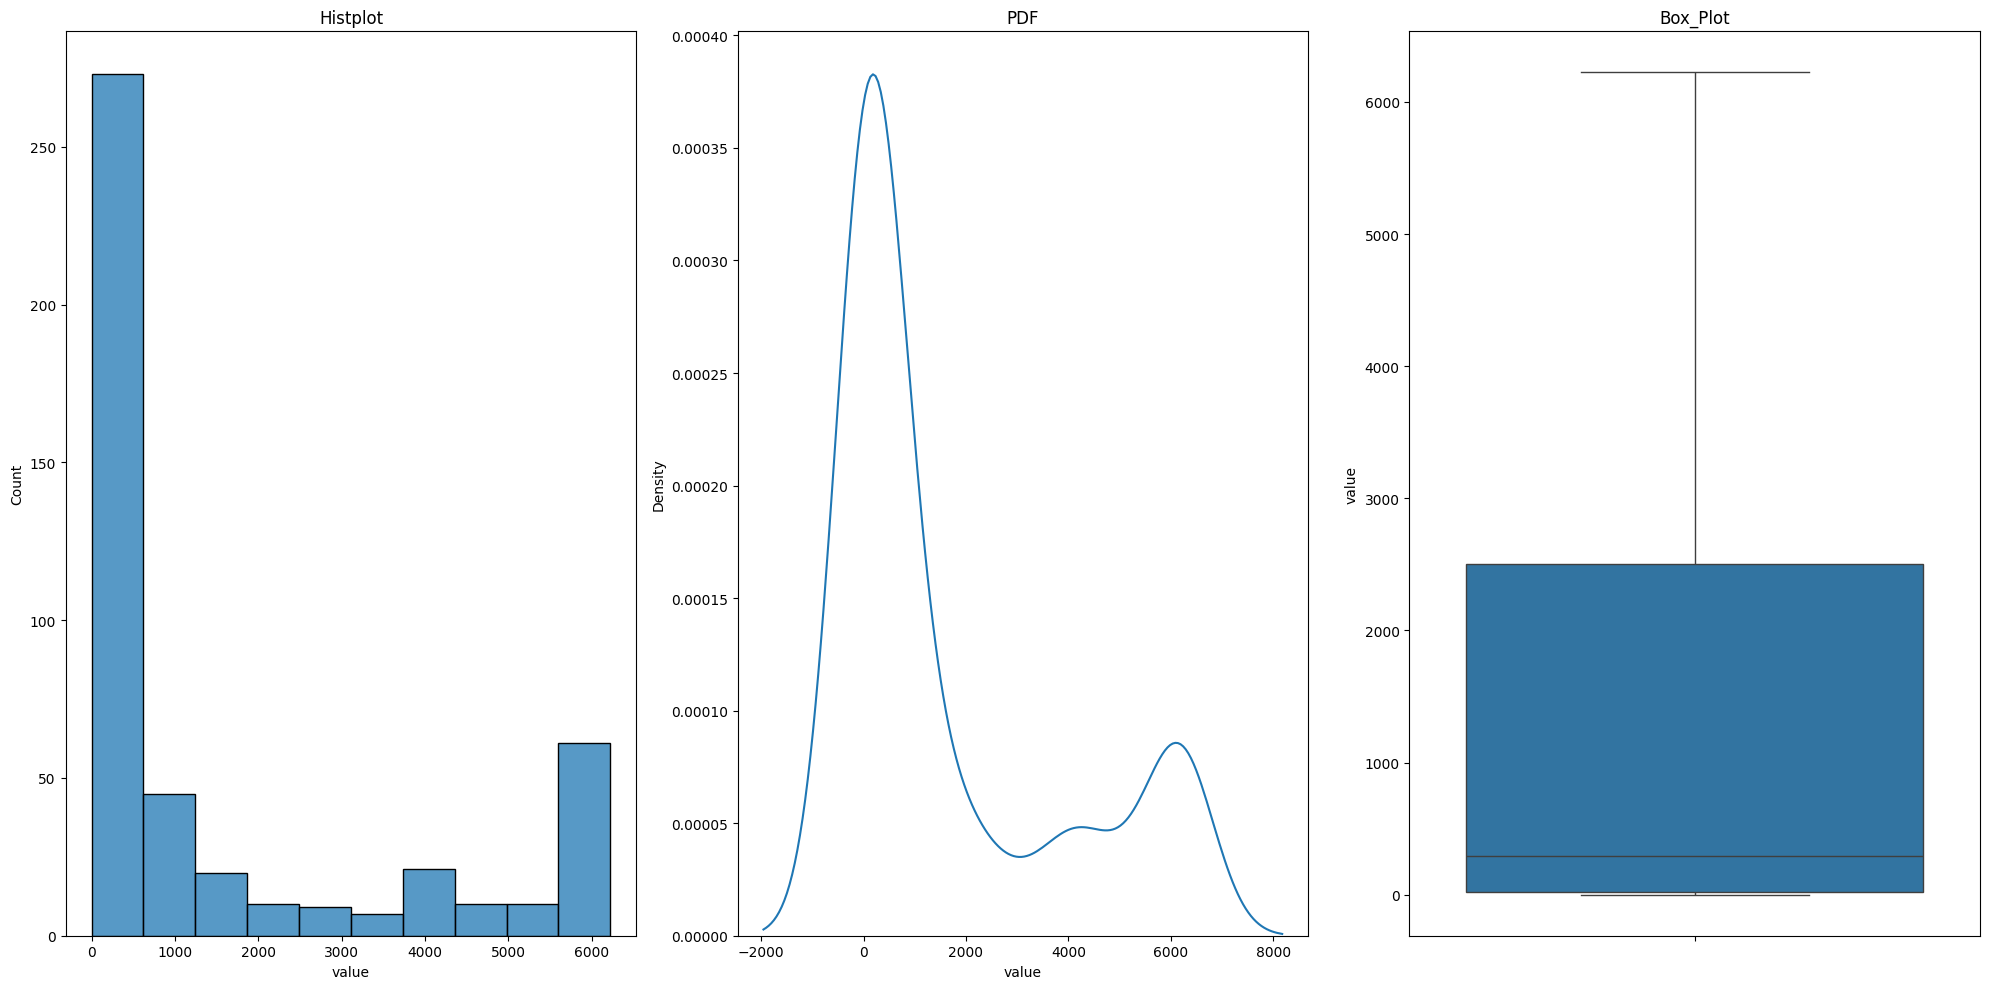

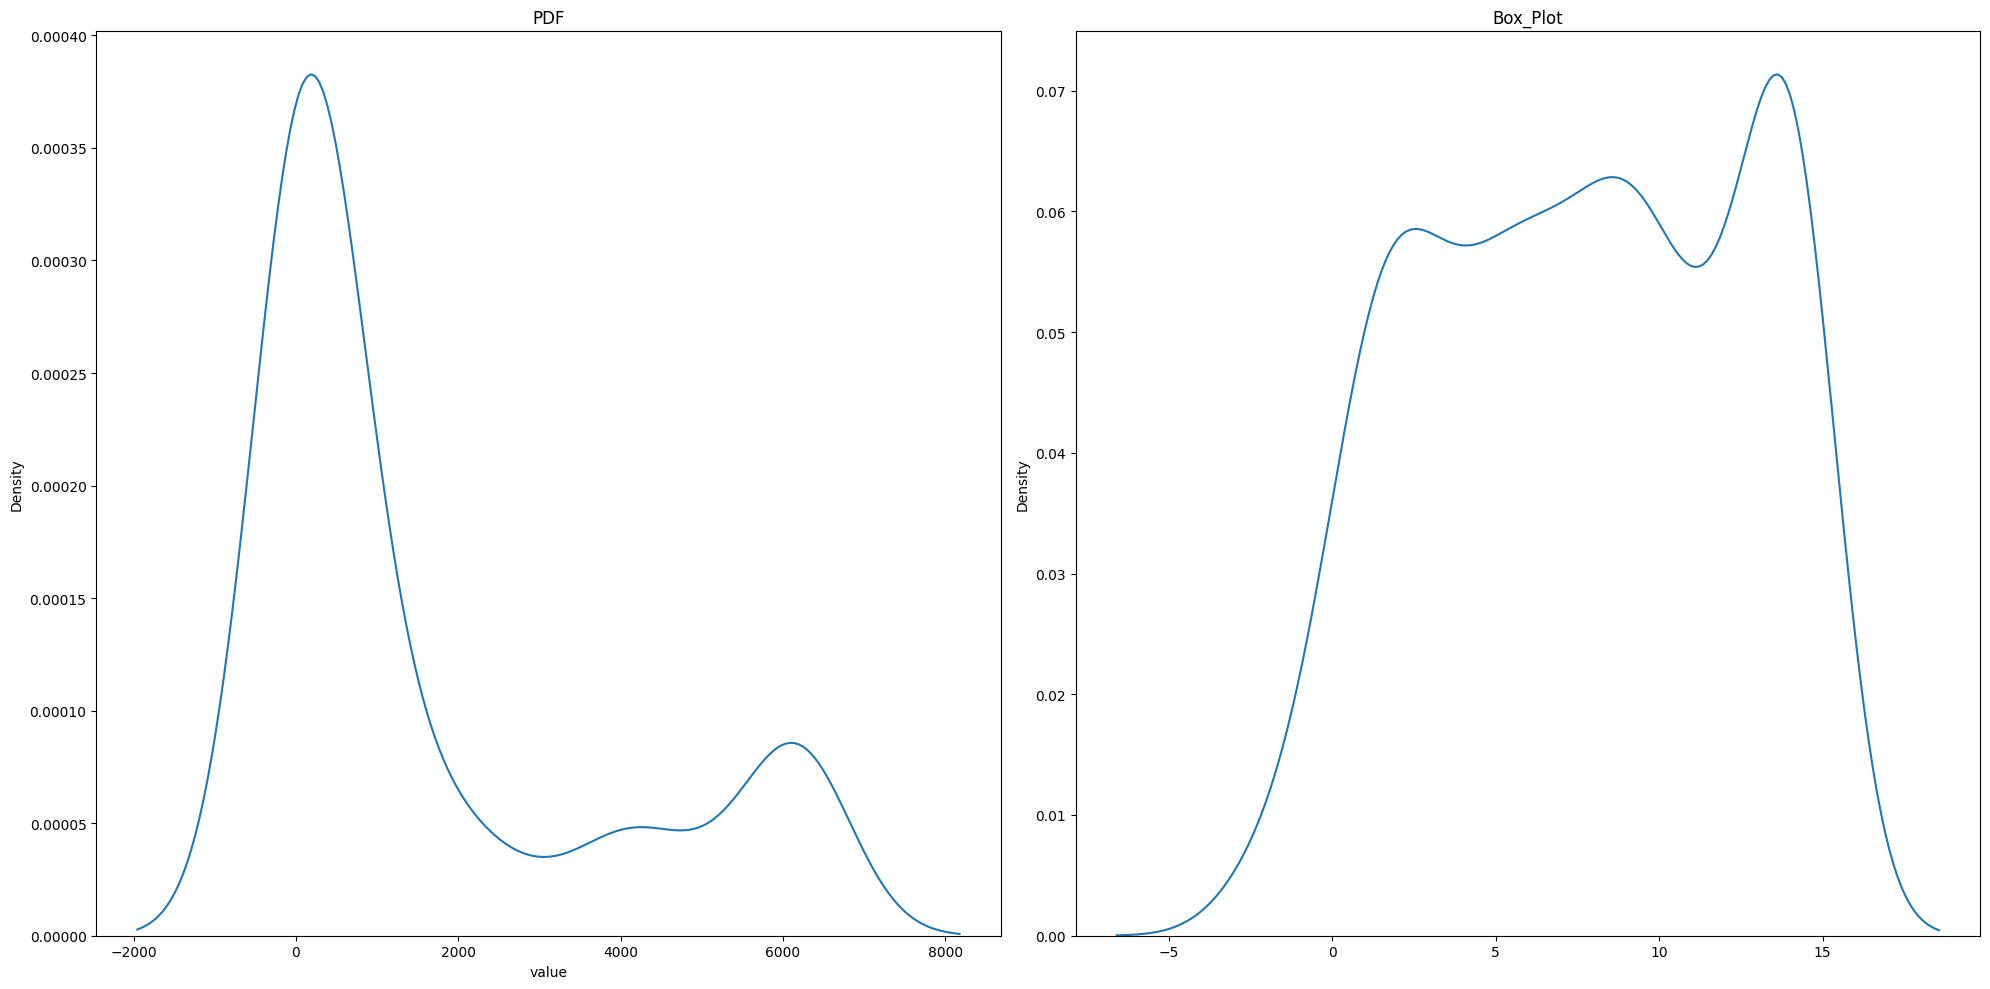

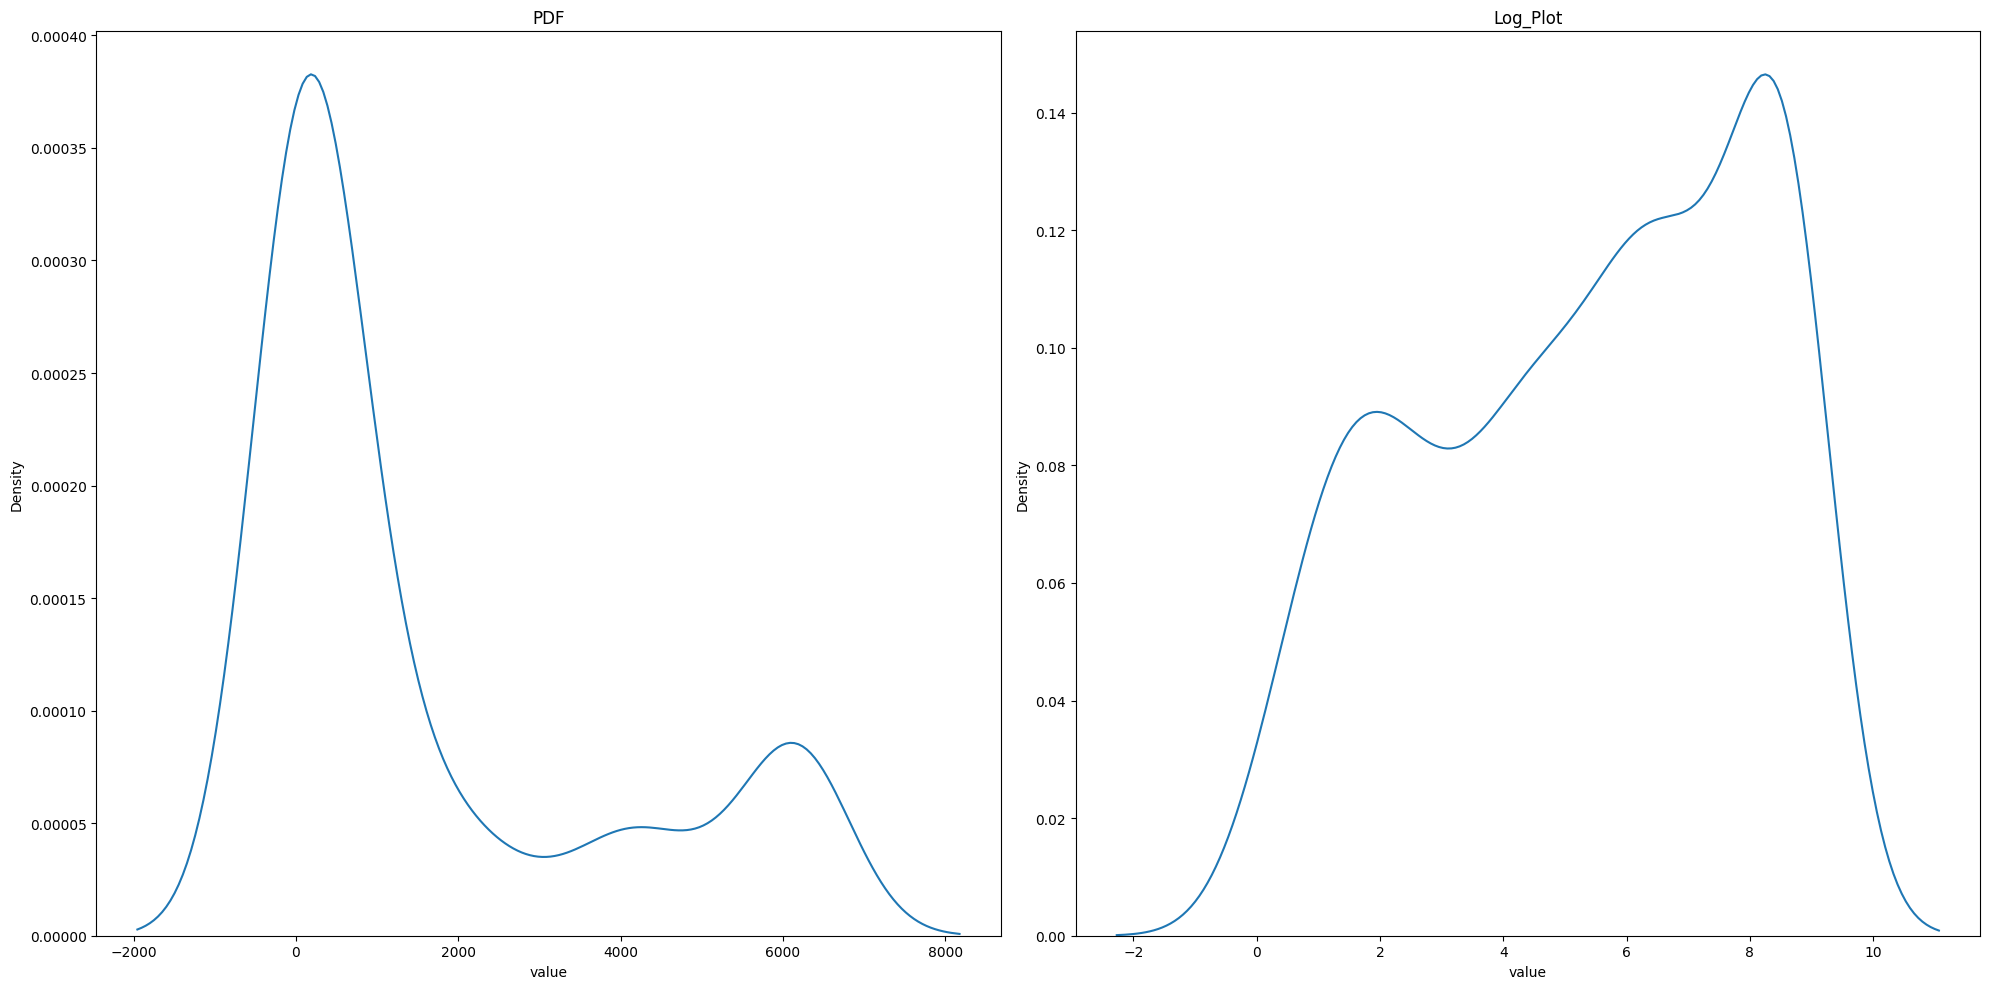

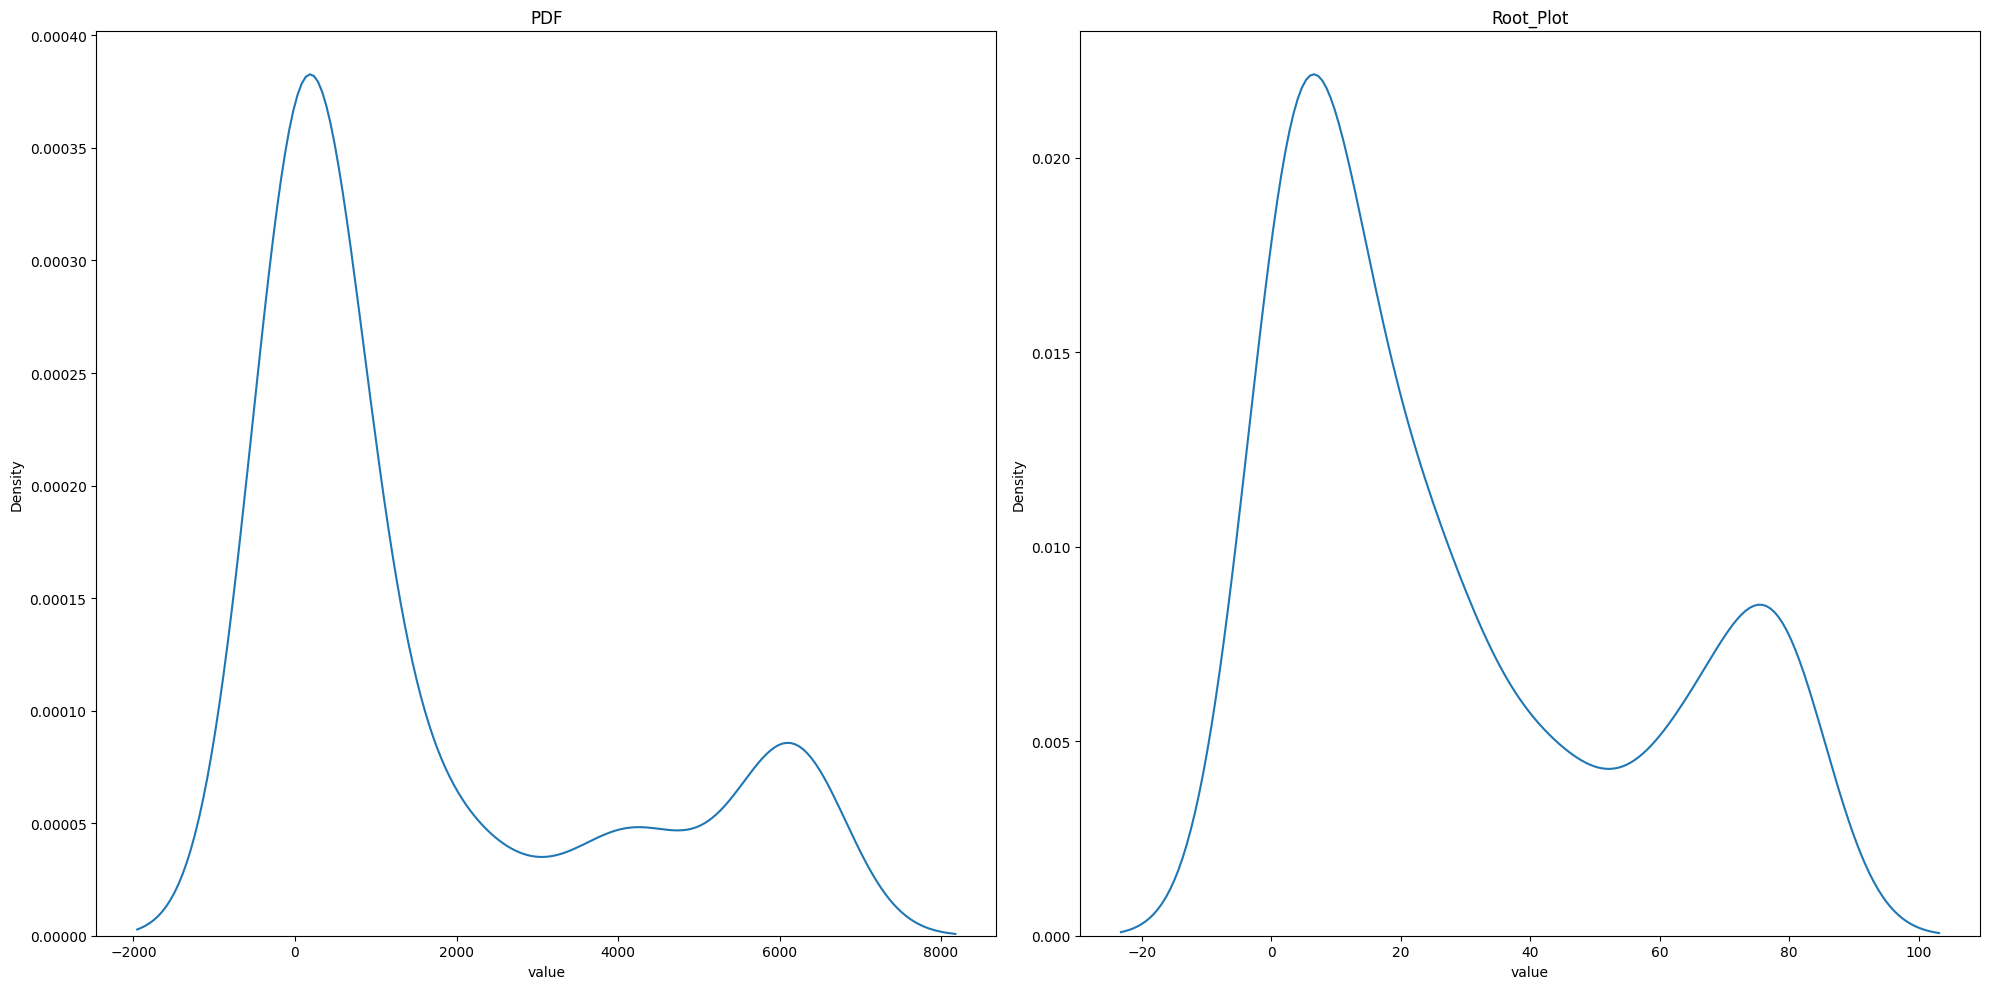

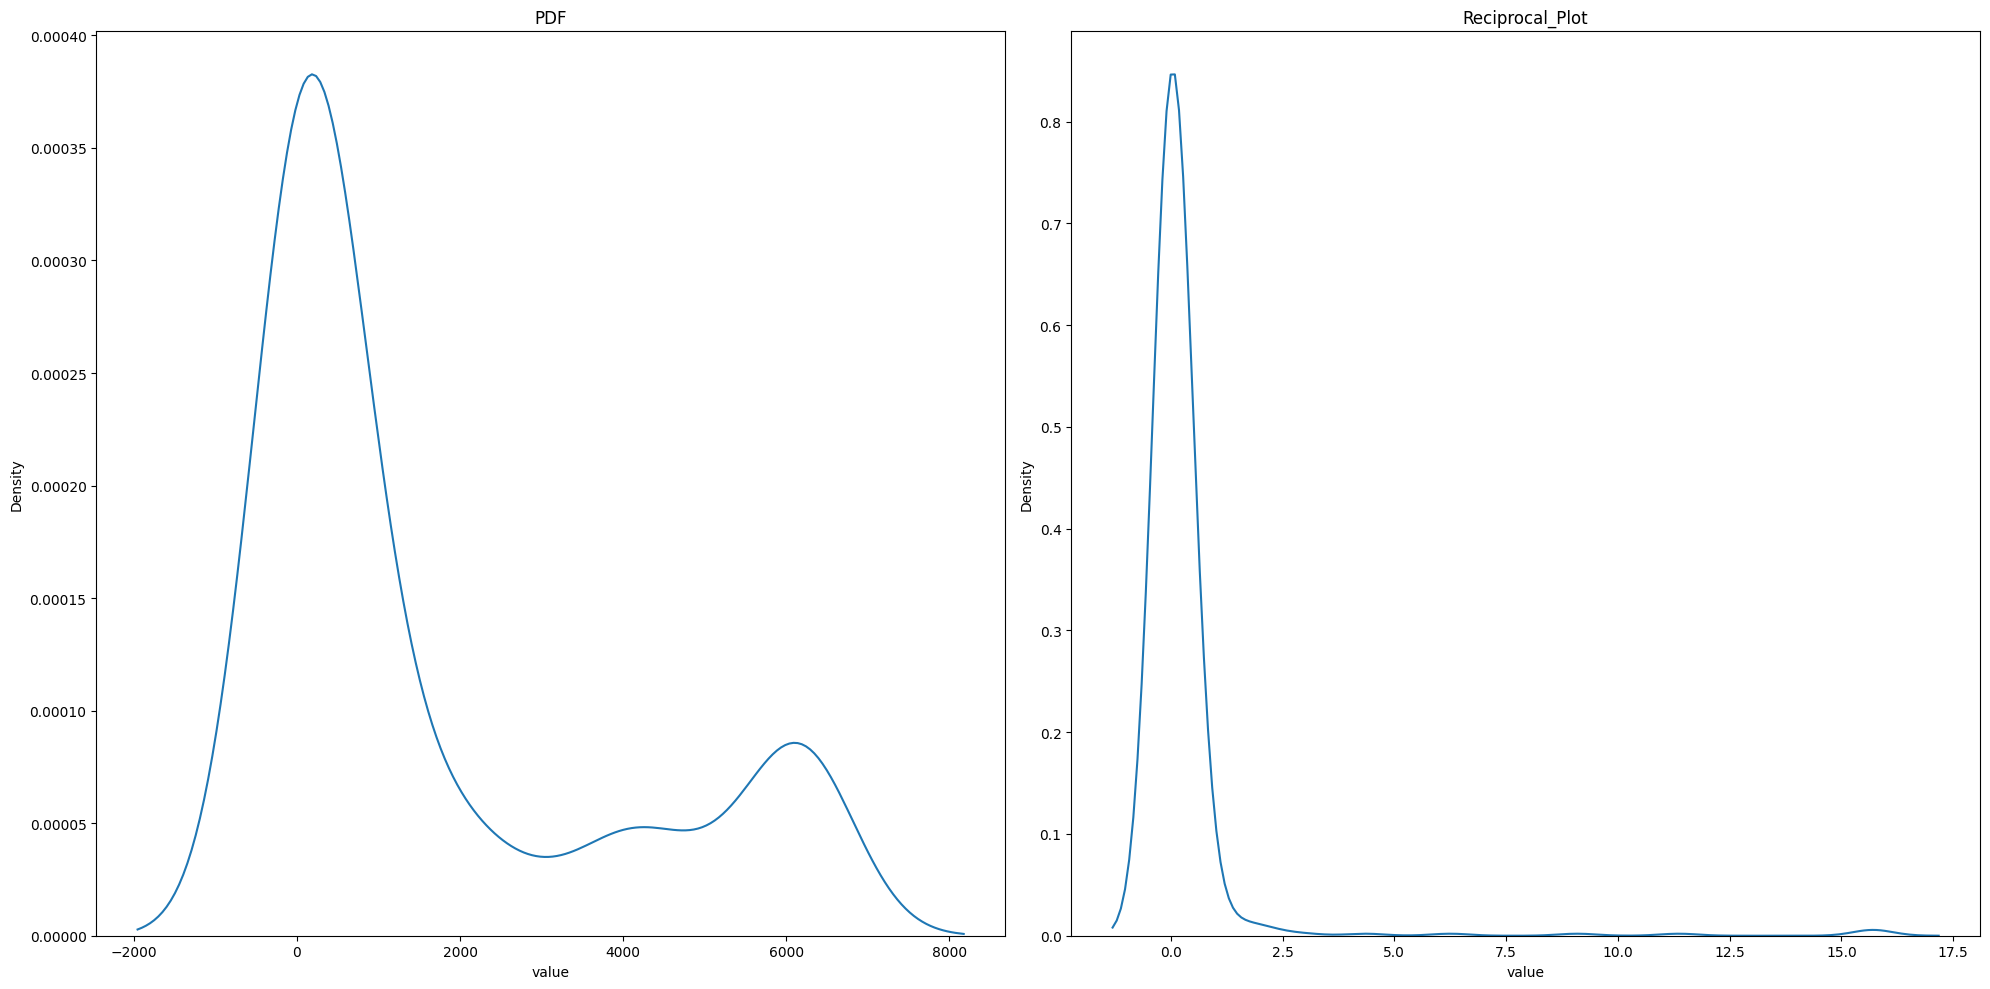

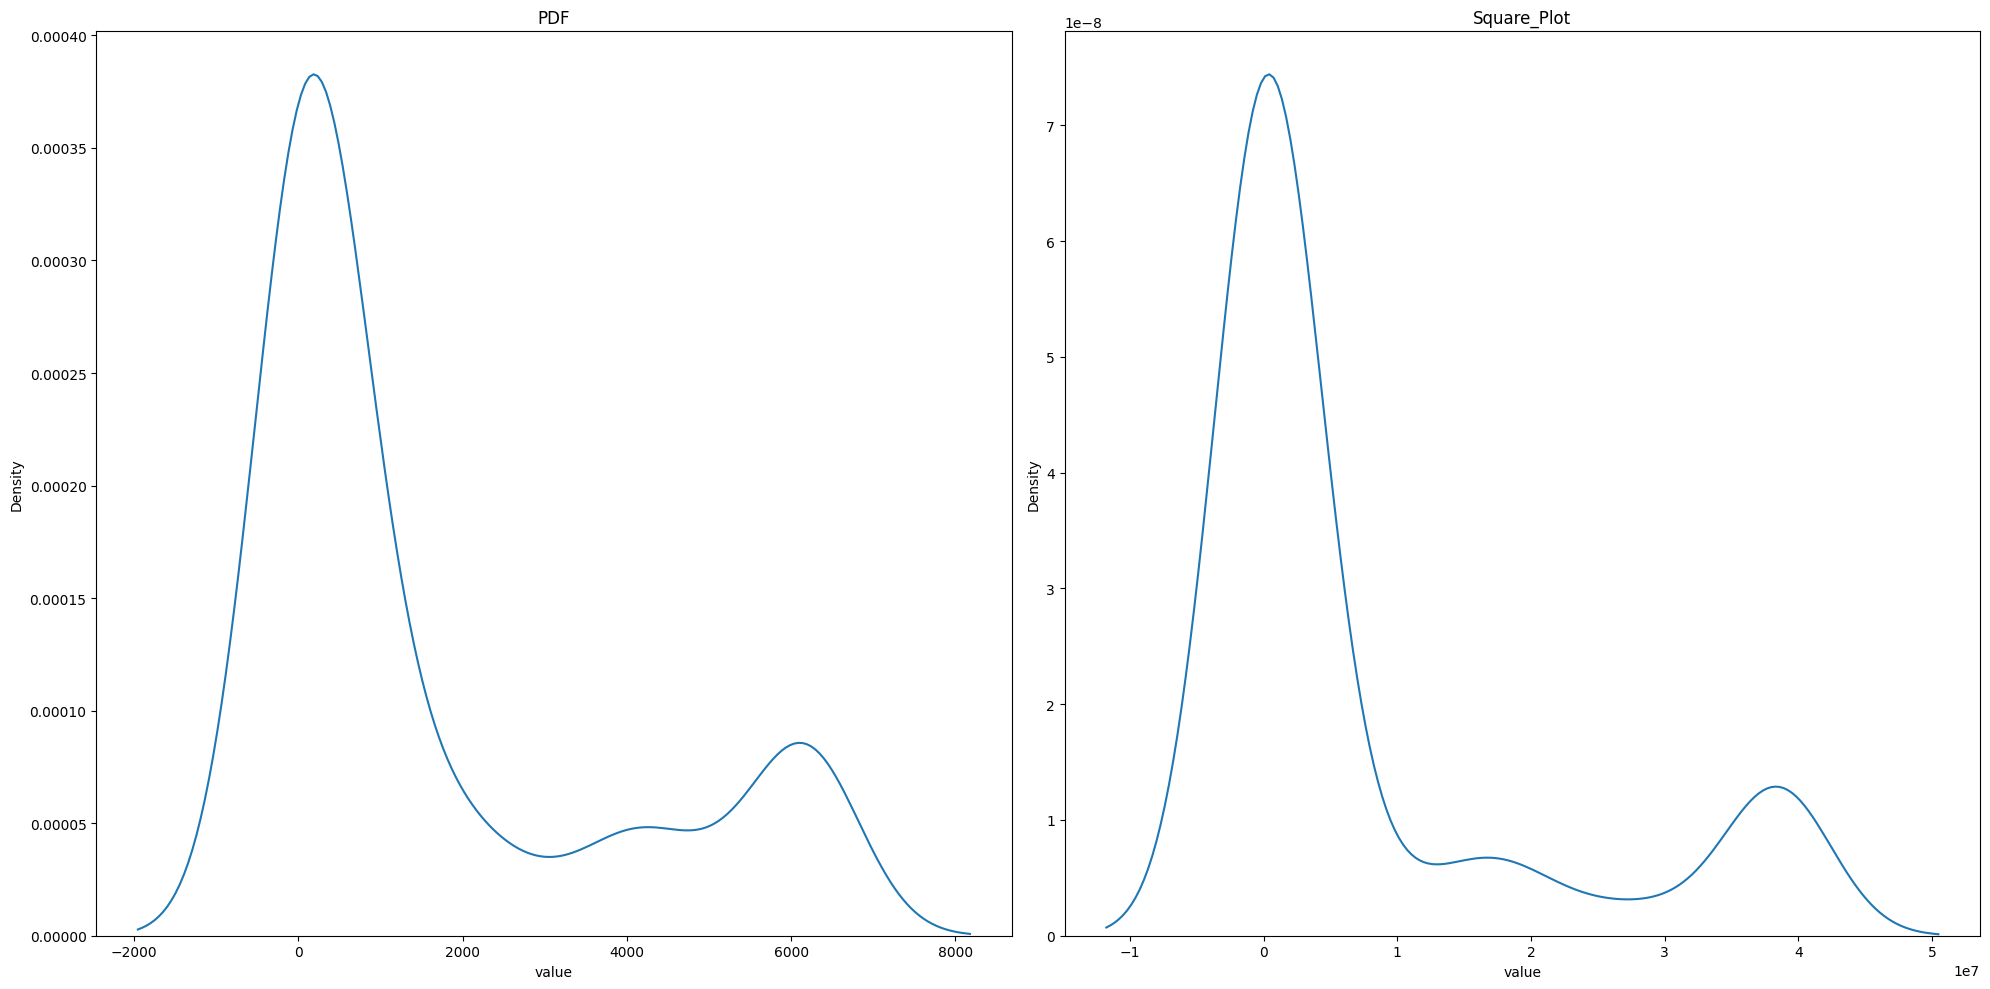

In [13]:
df6 = df[df["unit"]=="Oil displacement, million lge"]
df6.info()
val = df6
outlier_counter("value",val)
outlier_counter("value",val)
Plotter("value",val)
Boxcox_comparator("value",val)
Log_comparator("value",val)
sqrt_comparator("value",val)
rec_comparator("value",val)
#exp_comparator("value",val)
square_comparator("value",val)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["region"])
df1["region"] = le.transform(df1["region"])
df2["region"] = le.transform(df2["region"])
df3["region"] = le.transform(df3["region"])
df4["region"] = le.transform(df4["region"])
df5["region"] = le.transform(df5["region"])
df6["region"] = le.transform(df6["region"])

/tmp/ipykernel_16567/990316997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["region"] = le.transform(df1["region"])
/tmp/ipykernel_16567/990316997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["region"] = le.transform(df2["region"])
/tmp/ipykernel_16567/990316997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [15]:
C = ["category","parameter","mode","powertrain","unit"]

a1 = df1.pop("value")
df1.insert(0,'value',a1)

a2 = df2.pop("value")
df2.insert(0,'value',a2)

a3 = df3.pop("value")
df3.insert(0,'value',a3)

a4 = df4.pop("value")
df4.insert(0,'value',a4)

a5 = df5.pop("value")
df5.insert(0,'value',a5)

a6 = df6.pop("value")
df6.insert(0,'value',a6)

df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2887 entries, 1 to 9519
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       2887 non-null   float64
 1   region      2887 non-null   int64  
 2   category    2887 non-null   object 
 3   parameter   2887 non-null   object 
 4   mode        2887 non-null   object 
 5   powertrain  2887 non-null   object 
 6   year        2887 non-null   int64  
 7   unit        2887 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 203.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       4624 non-null   float64
 1   region      4624 non-null   int64  
 2   category    4624 non-null   object 
 3   parameter   4624 non-null   object 
 4   mode        4624 non-null   object 
 5   powertrain  4624 non-null   obje

In [16]:
C = ["category","parameter","mode","powertrain","unit"]
for i in df1.columns:
    print(f"{i} has {df1[i].nunique()} unique values")
for i in C:
    x = pd.get_dummies(df1[i],drop_first=False)
    df1 = pd.concat([df1,x],axis=1)
    df1.drop(columns=[i],inplace=True,axis=1)


df1.info()

value has 357 unique values
region has 36 unique values
category has 3 unique values
parameter has 2 unique values
mode has 4 unique values
powertrain has 1 unique values
year has 15 unique values
unit has 1 unique values
<class 'pandas.core.frame.DataFrame'>
Index: 2887 entries, 1 to 9519
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value             2887 non-null   float64
 1   region            2887 non-null   int64  
 2   year              2887 non-null   int64  
 3   Historical        2887 non-null   bool   
 4   Projection-APS    2887 non-null   bool   
 5   Projection-STEPS  2887 non-null   bool   
 6   EV sales share    2887 non-null   bool   
 7   EV stock share    2887 non-null   bool   
 8   Buses             2887 non-null   bool   
 9   Cars              2887 non-null   bool   
 10  Trucks            2887 non-null   bool   
 11  Vans              2887 non-null   bool   
 12  EV           

In [17]:
C = ["category","parameter","mode","powertrain","unit"]
for i in df2.columns:
    print(f"{i} has {df2[i].nunique()} unique values")
for i in C:
    x = pd.get_dummies(df2[i],drop_first=False)
    df2 = pd.concat([df2,x],axis=1)
    df2.drop(columns=[i],inplace=True,axis=1)


df2.info()

value has 335 unique values
region has 36 unique values
category has 3 unique values
parameter has 2 unique values
mode has 4 unique values
powertrain has 2 unique values
year has 15 unique values
unit has 1 unique values
<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 9541
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value             4624 non-null   float64
 1   region            4624 non-null   int64  
 2   year              4624 non-null   int64  
 3   Historical        4624 non-null   bool   
 4   Projection-APS    4624 non-null   bool   
 5   Projection-STEPS  4624 non-null   bool   
 6   EV sales          4624 non-null   bool   
 7   EV stock          4624 non-null   bool   
 8   Buses             4624 non-null   bool   
 9   Cars              4624 non-null   bool   
 10  Trucks            4624 non-null   bool   
 11  Vans              4624 non-null   bool   
 12  BEV          

In [18]:
C = ["category","parameter","mode","powertrain","unit"]
for i in df3.columns:
    print(f"{i} has {df3[i].nunique()} unique values")
for i in C:
    x = pd.get_dummies(df3[i],drop_first=False)
    df3 = pd.concat([df3,x],axis=1)
    df3.drop(columns=[i],inplace=True,axis=1)


df3.info()

value has 193 unique values
region has 36 unique values
category has 2 unique values
parameter has 1 unique values
mode has 1 unique values
powertrain has 2 unique values
year has 15 unique values
unit has 1 unique values
<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 40 to 9525
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   value                    664 non-null    float64
 1   region                   664 non-null    int64  
 2   year                     664 non-null    int64  
 3   Historical               664 non-null    bool   
 4   Projection-STEPS         664 non-null    bool   
 5   EV charging points       664 non-null    bool   
 6   EV                       664 non-null    bool   
 7   Publicly available fast  664 non-null    bool   
 8   Publicly available slow  664 non-null    bool   
 9   charging points          664 non-null    bool   
dtypes: bool(7), float64(1),

In [19]:
C = ["category","parameter","mode","powertrain","unit"]
for i in df4.columns:
    print(f"{i} has {df4[i].nunique()} unique values")
for i in C:
    x = pd.get_dummies(df4[i],drop_first=False)
    df4 = pd.concat([df4,x],axis=1)
    df4.drop(columns=[i],inplace=True,axis=1)


df4.info()

value has 160 unique values
region has 6 unique values
category has 3 unique values
parameter has 1 unique values
mode has 4 unique values
powertrain has 1 unique values
year has 15 unique values
unit has 1 unique values
<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 1002 to 9523
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   value               435 non-null    float64
 1   region              435 non-null    int64  
 2   year                435 non-null    int64  
 3   Historical          435 non-null    bool   
 4   Projection-APS      435 non-null    bool   
 5   Projection-STEPS    435 non-null    bool   
 6   Electricity demand  435 non-null    bool   
 7   Buses               435 non-null    bool   
 8   Cars                435 non-null    bool   
 9   Trucks              435 non-null    bool   
 10  Vans                435 non-null    bool   
 11  EV                  435 non-null 

In [20]:
C = ["category","parameter","mode","powertrain","unit"]
for i in df5.columns:
    print(f"{i} has {df5[i].nunique()} unique values")
for i in C:
    x = pd.get_dummies(df5[i],drop_first=False)
    df5 = pd.concat([df5,x],axis=1)
    df5.drop(columns=[i],inplace=True,axis=1)


df5.info()

value has 189 unique values
region has 6 unique values
category has 3 unique values
parameter has 1 unique values
mode has 4 unique values
powertrain has 1 unique values
year has 15 unique values
unit has 1 unique values
<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1006 to 9503
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   value                   466 non-null    float64
 1   region                  466 non-null    int64  
 2   year                    466 non-null    int64  
 3   Historical              466 non-null    bool   
 4   Projection-APS          466 non-null    bool   
 5   Projection-STEPS        466 non-null    bool   
 6   Oil displacement Mbd    466 non-null    bool   
 7   Buses                   466 non-null    bool   
 8   Cars                    466 non-null    bool   
 9   Trucks                  466 non-null    bool   
 10  Vans                    466 non-nu

In [21]:
C = ["category","parameter","mode","powertrain","unit"]
for i in df6.columns:
    print(f"{i} has {df6[i].nunique()} unique values")
for i in C:
    x = pd.get_dummies(df6[i],drop_first=False)
    df6 = pd.concat([df6,x],axis=1)
    df6.drop(columns=[i],inplace=True,axis=1)


df6.info()

value has 193 unique values
region has 6 unique values
category has 3 unique values
parameter has 1 unique values
mode has 4 unique values
powertrain has 1 unique values
year has 15 unique values
unit has 1 unique values
<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1010 to 9507
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   value                          466 non-null    float64
 1   region                         466 non-null    int64  
 2   year                           466 non-null    int64  
 3   Historical                     466 non-null    bool   
 4   Projection-APS                 466 non-null    bool   
 5   Projection-STEPS               466 non-null    bool   
 6   Oil displacement, million lge  466 non-null    bool   
 7   Buses                          466 non-null    bool   
 8   Cars                           466 non-null    bool   
 9   Trucks    

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test)

#X_train = Stand.fit_transform(X_train)
#X_test = Stand.transform(X_test)


def tester(df):
    
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    # Dictionary to store results
    results = {}

    # # Linear Regression
    # model = LinearRegression()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['Linear Regression'] = {'MSE': mse, 'R2 Score': r2}

    # # Ridge Regression
    # model = Ridge()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['Ridge Regression'] = {'MSE': mse, 'R2 Score': r2}

    # # Lasso Regression
    # model = Lasso()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['Lasso Regression'] = {'MSE': mse, 'R2 Score': r2}

    # # ElasticNet Regression
    # model = ElasticNet()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['ElasticNet Regression'] = {'MSE': mse, 'R2 Score': r2}

    # # Support Vector Regression (SVR)
    # model = SVR()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['SVR'] = {'MSE': mse, 'R2 Score': r2}

    # # Decision Tree Regression
    # model = DecisionTreeRegressor()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['Decision Tree'] = {'MSE': mse, 'R2 Score': r2}

    # Random Forest Regression
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Random Forest'] = {'MSE': mse, 'R2 Score': r2}

    # # Gradient Boosting Regression
    # model = GradientBoostingRegressor()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['Gradient Boosting'] = {'MSE': mse, 'R2 Score': r2}

    # # AdaBoost Regression
    # model = AdaBoostRegressor()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # results['AdaBoost'] = {'MSE': mse, 'R2 Score': r2}

    # K-Nearest Neighbors Regression
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['KNN'] = {'MSE': mse, 'R2 Score': r2}

    # Print results
    for model, scores in results.items():
        print(f"{model}:")
        print(f"  MSE: {scores['MSE']}")
        print(f"  R2 Score: {scores['R2 Score']}")
        print()

print("Divided Based on unit")
print("Dataframe 1")
# df1.info()
tester(df1)
print("Dataframe 2")
# df2.info()
tester(df2)
print("Dataframe 3")
# df3.info()
tester(df3)
print("Dataframe 4")
# df4.info()
tester(df4)
print("Dataframe 5")
# df5.info()
tester(df5)
print("Dataframe 6")
# df6.info()
tester(df6)

Divided Based on unit
Dataframe 1
<class 'pandas.core.frame.DataFrame'>
Index: 2887 entries, 1 to 9519
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value             2887 non-null   float64
 1   region            2887 non-null   int64  
 2   year              2887 non-null   int64  
 3   Historical        2887 non-null   bool   
 4   Projection-APS    2887 non-null   bool   
 5   Projection-STEPS  2887 non-null   bool   
 6   EV sales share    2887 non-null   bool   
 7   EV stock share    2887 non-null   bool   
 8   Buses             2887 non-null   bool   
 9   Cars              2887 non-null   bool   
 10  Trucks            2887 non-null   bool   
 11  Vans              2887 non-null   bool   
 12  EV                2887 non-null   bool   
 13  percent           2887 non-null   bool   
dtypes: bool(11), float64(1), int64(2)
memory usage: 121.2 KB
Random Forest:
  MSE: 0.3438366173366083
  R2 Scor

In [23]:
df1.head()

value  region  year  Historical  Projection-APS  Projection-STEPS  \
1   0.00650       0  2011        True           False             False   
2   0.00046       0  2011        True           False             False   
5   0.00280       0  2012        True           False             False   
6   0.03000       0  2012        True           False             False   
13  0.03400       0  2013        True           False             False   

    EV sales share  EV stock share  Buses  Cars  Trucks   Vans    EV  percent  
1             True           False  False  True   False  False  True     True  
2            False            True  False  True   False  False  True     True  
5            False            True  False  True   False  False  True     True  
6             True           False  False  True   False  False  True     True  
13            True           False  False  True   False  False  True     True

In [24]:
df1.isnull().sum()

value               0
region              0
year                0
Historical          0
Projection-APS      0
Projection-STEPS    0
EV sales share      0
EV stock share      0
Buses               0
Cars                0
Trucks              0
Vans                0
EV                  0
percent             0
dtype: int64

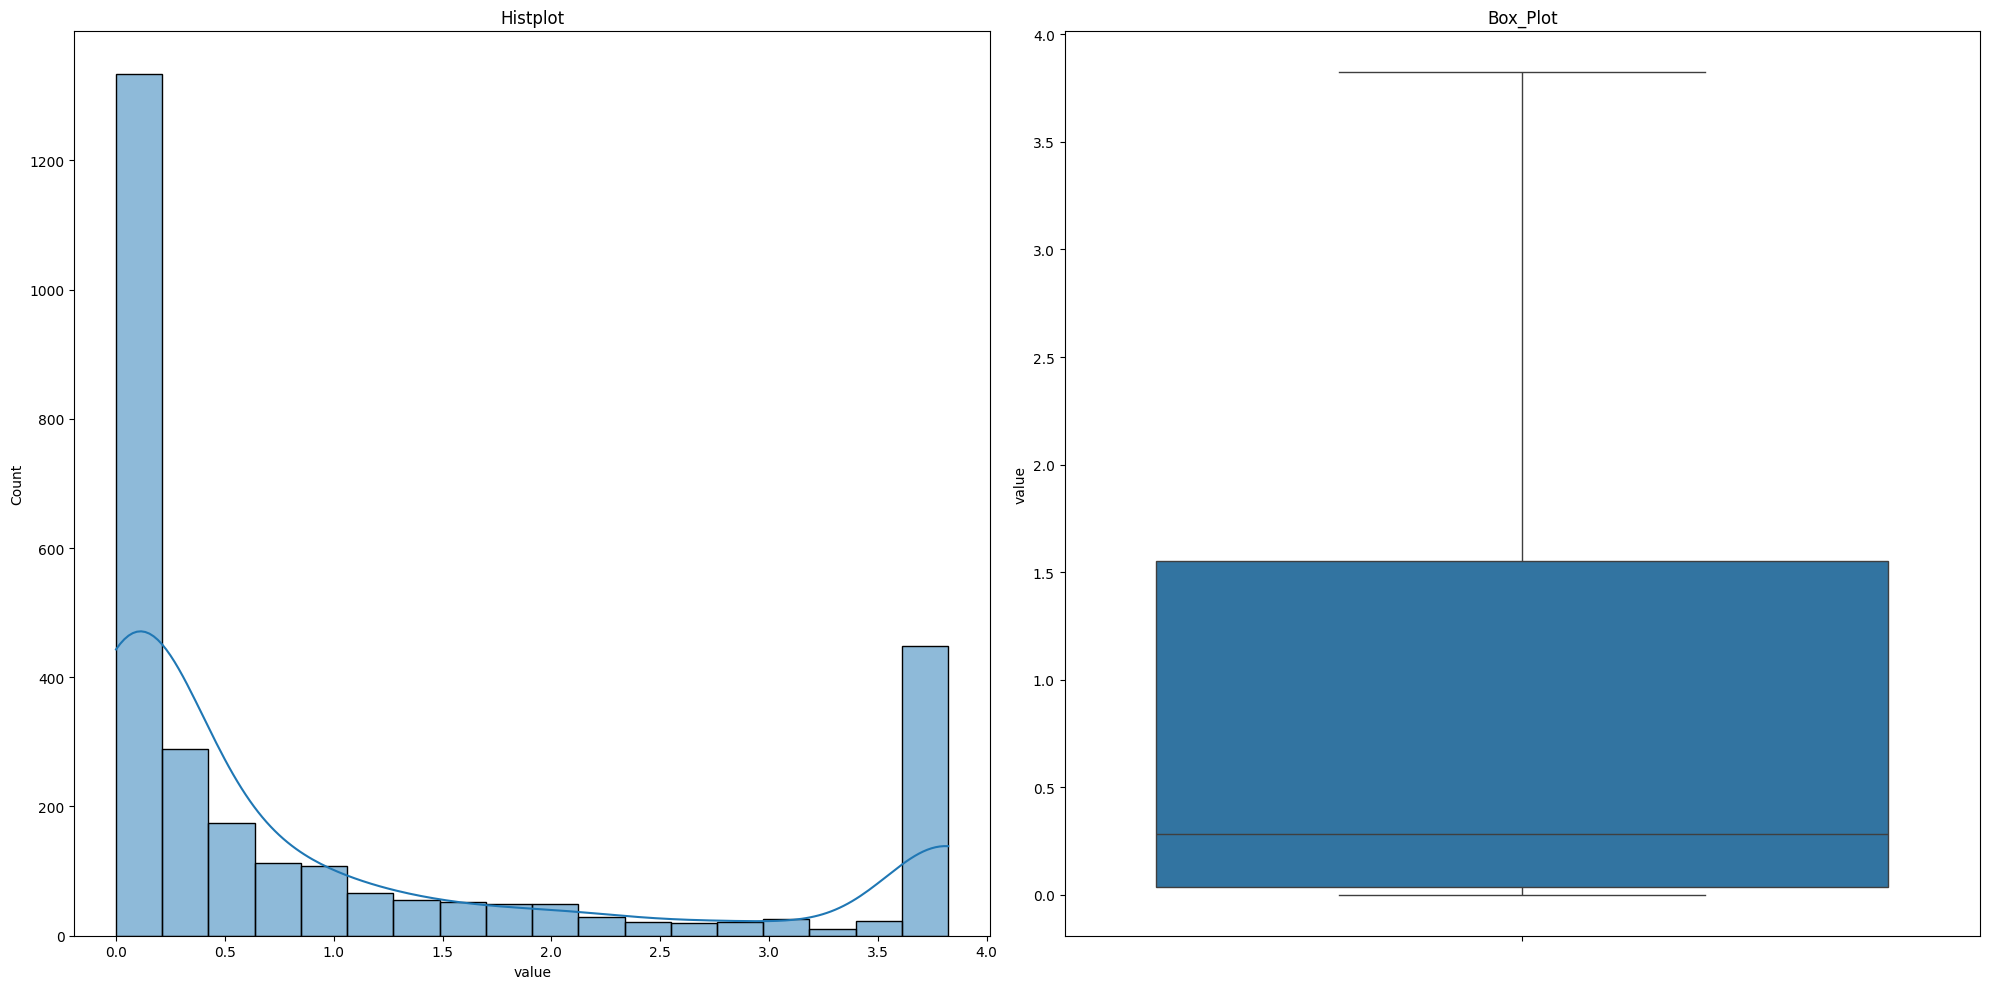

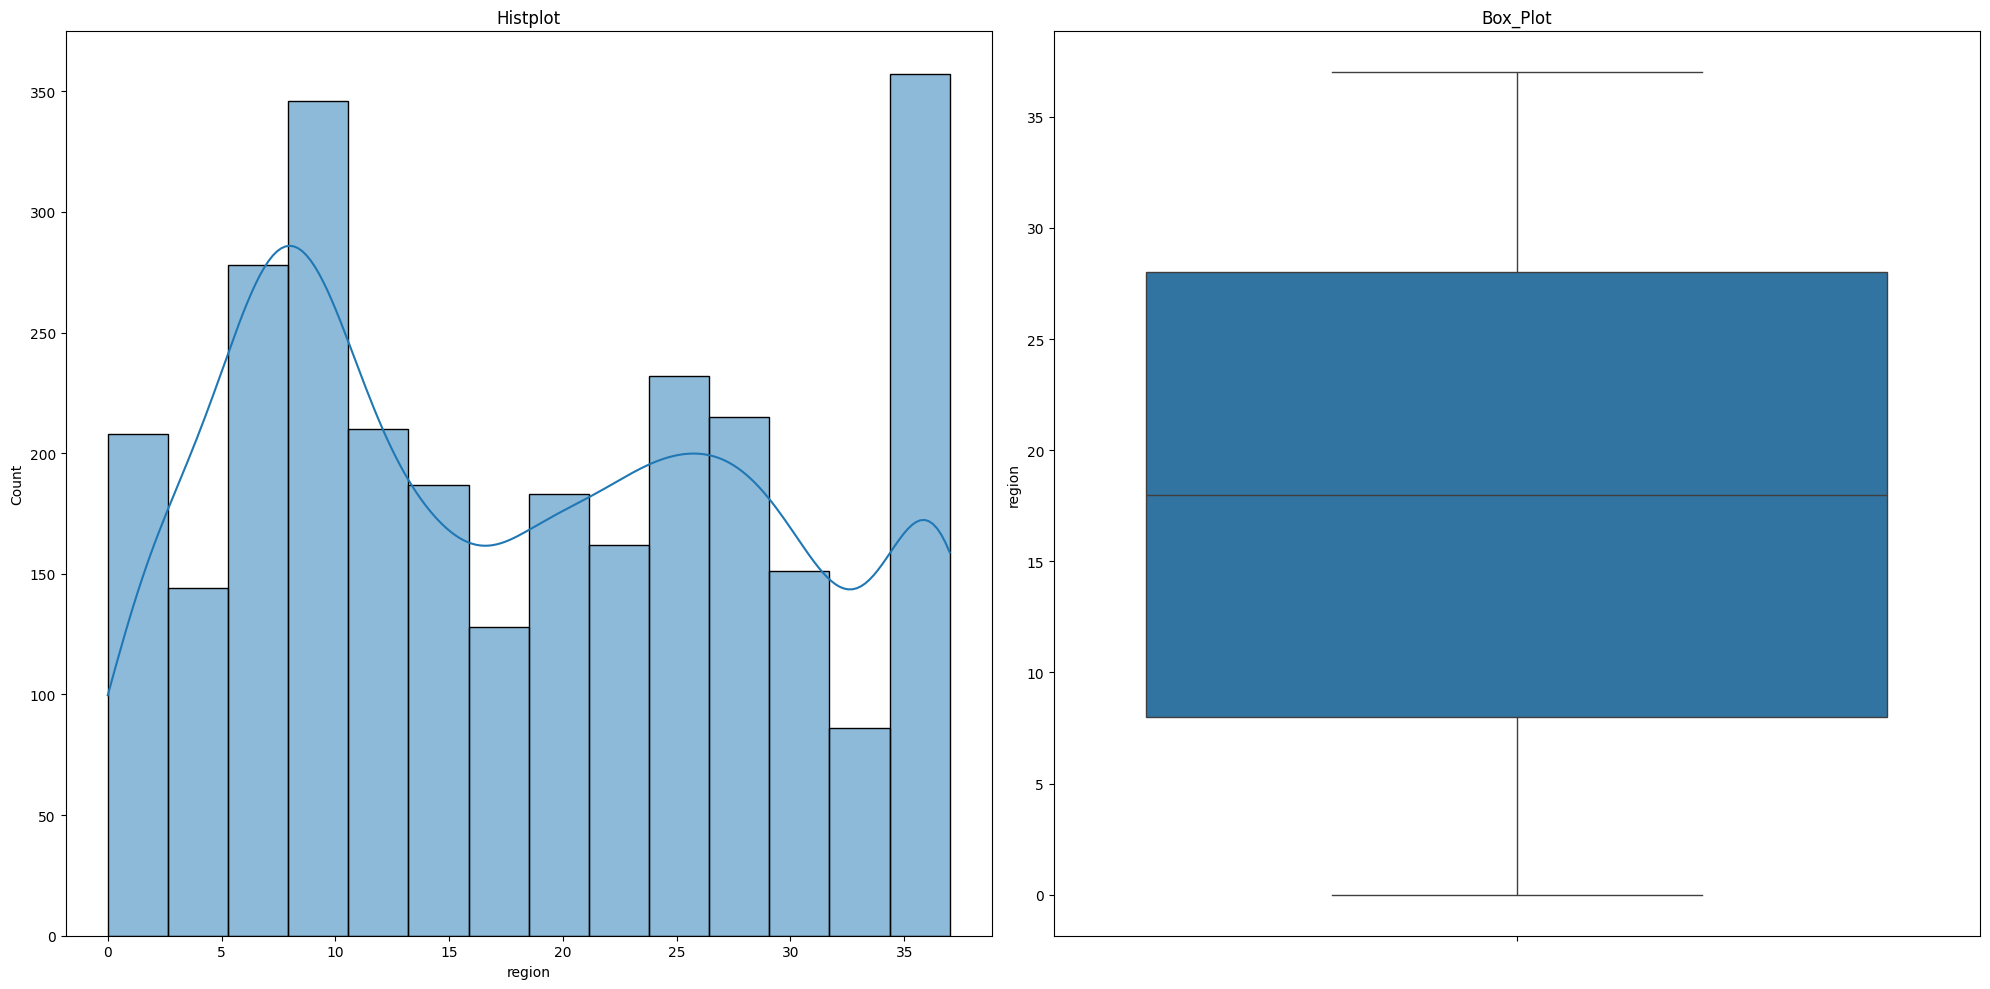

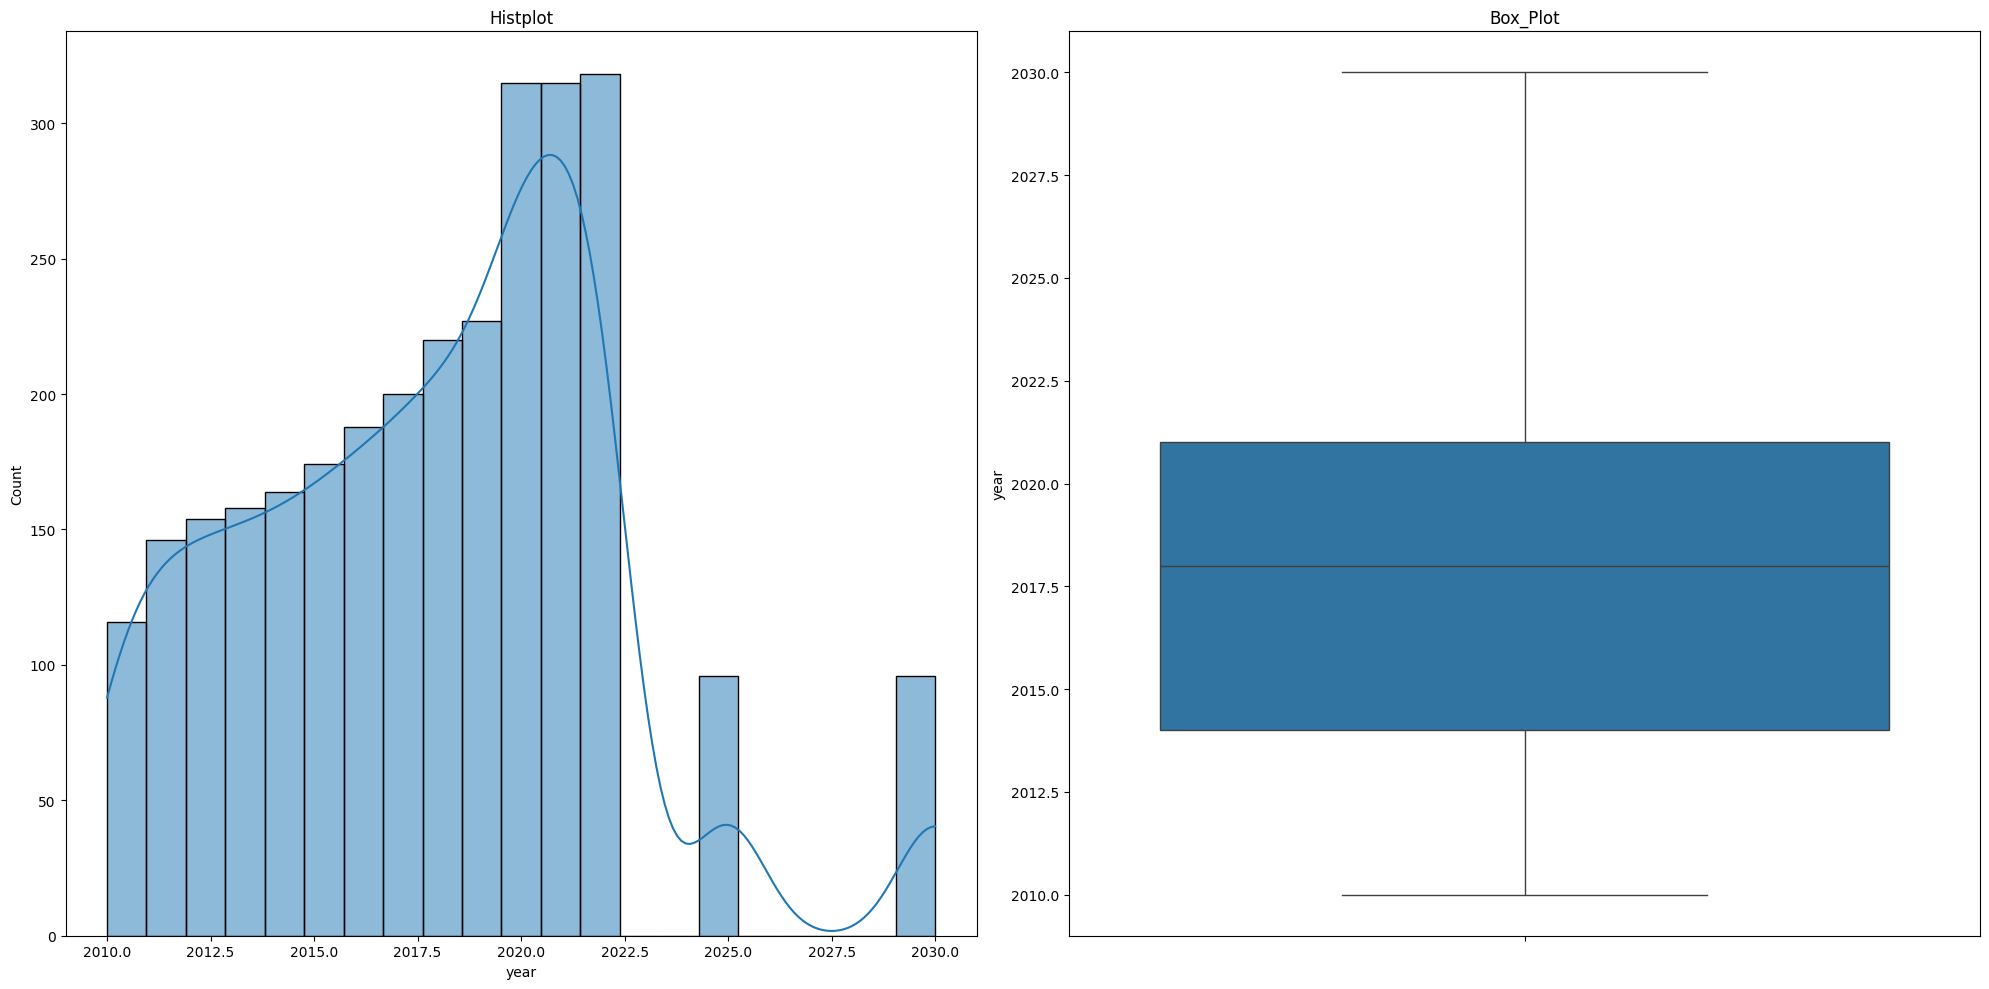

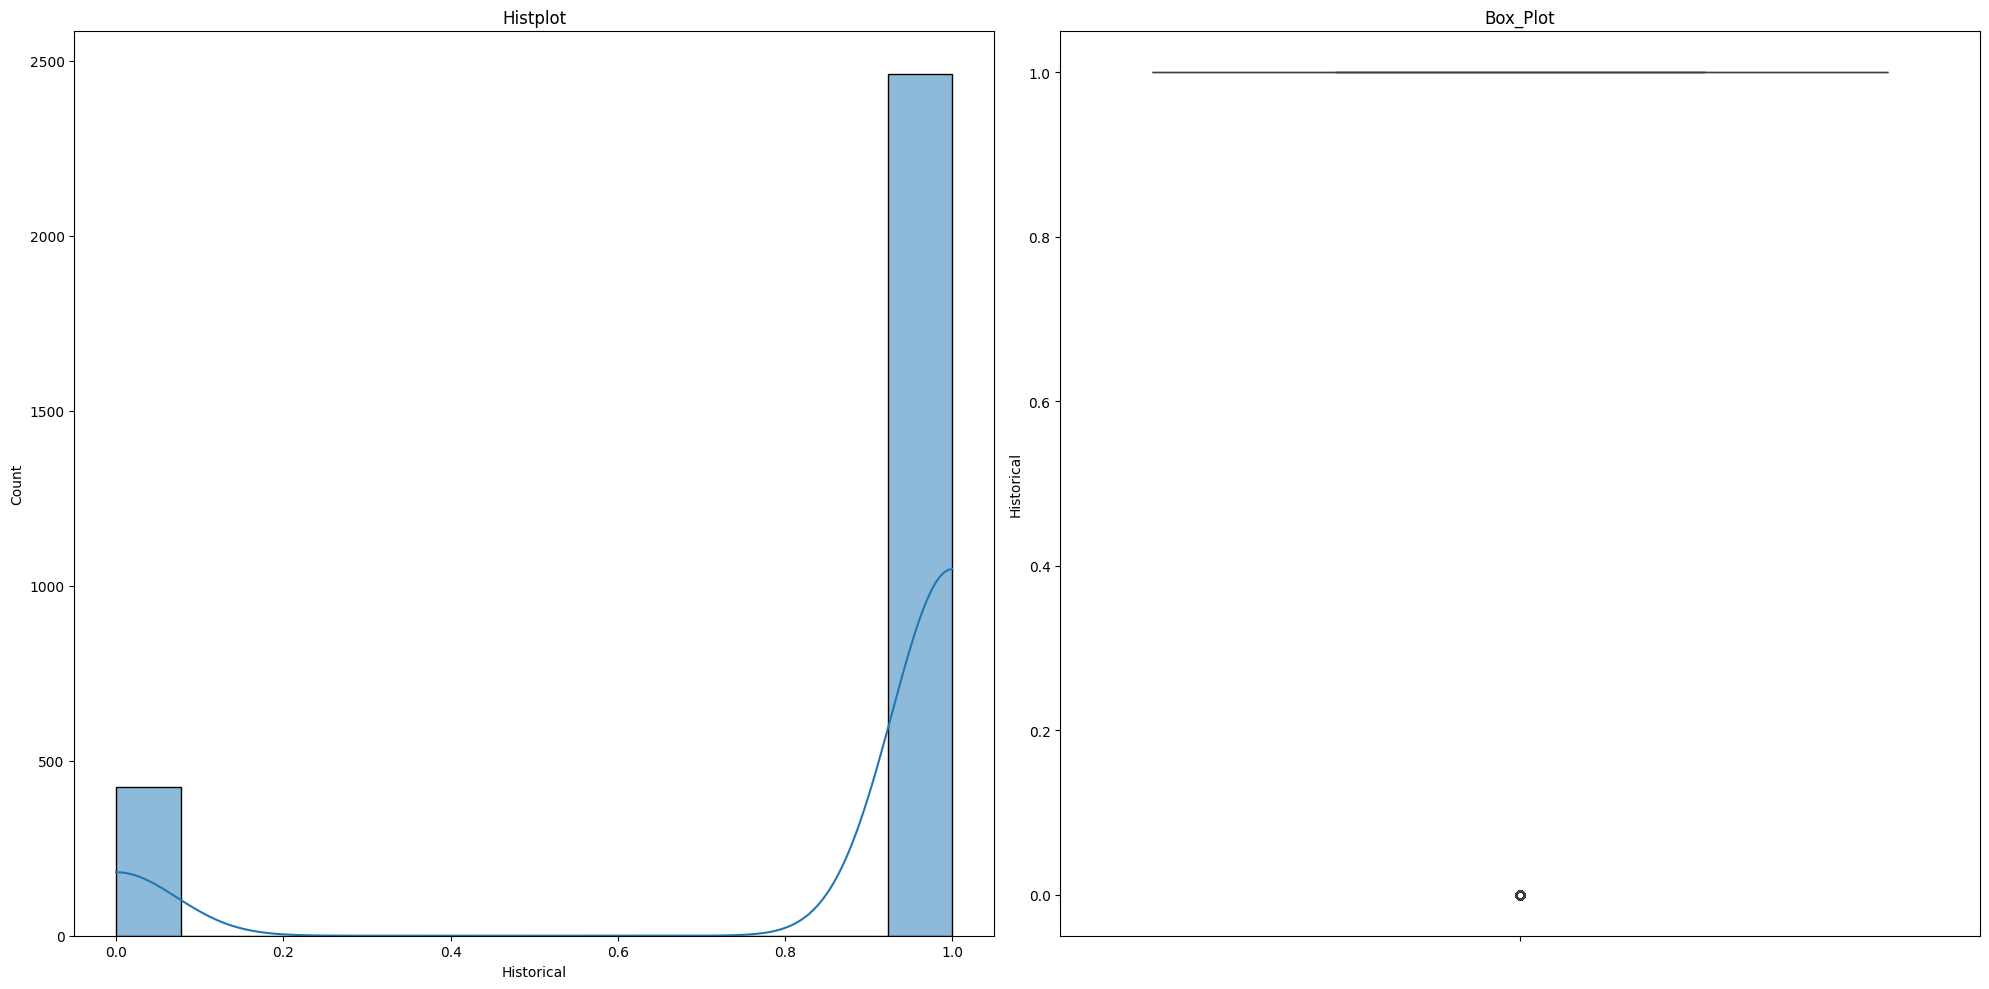

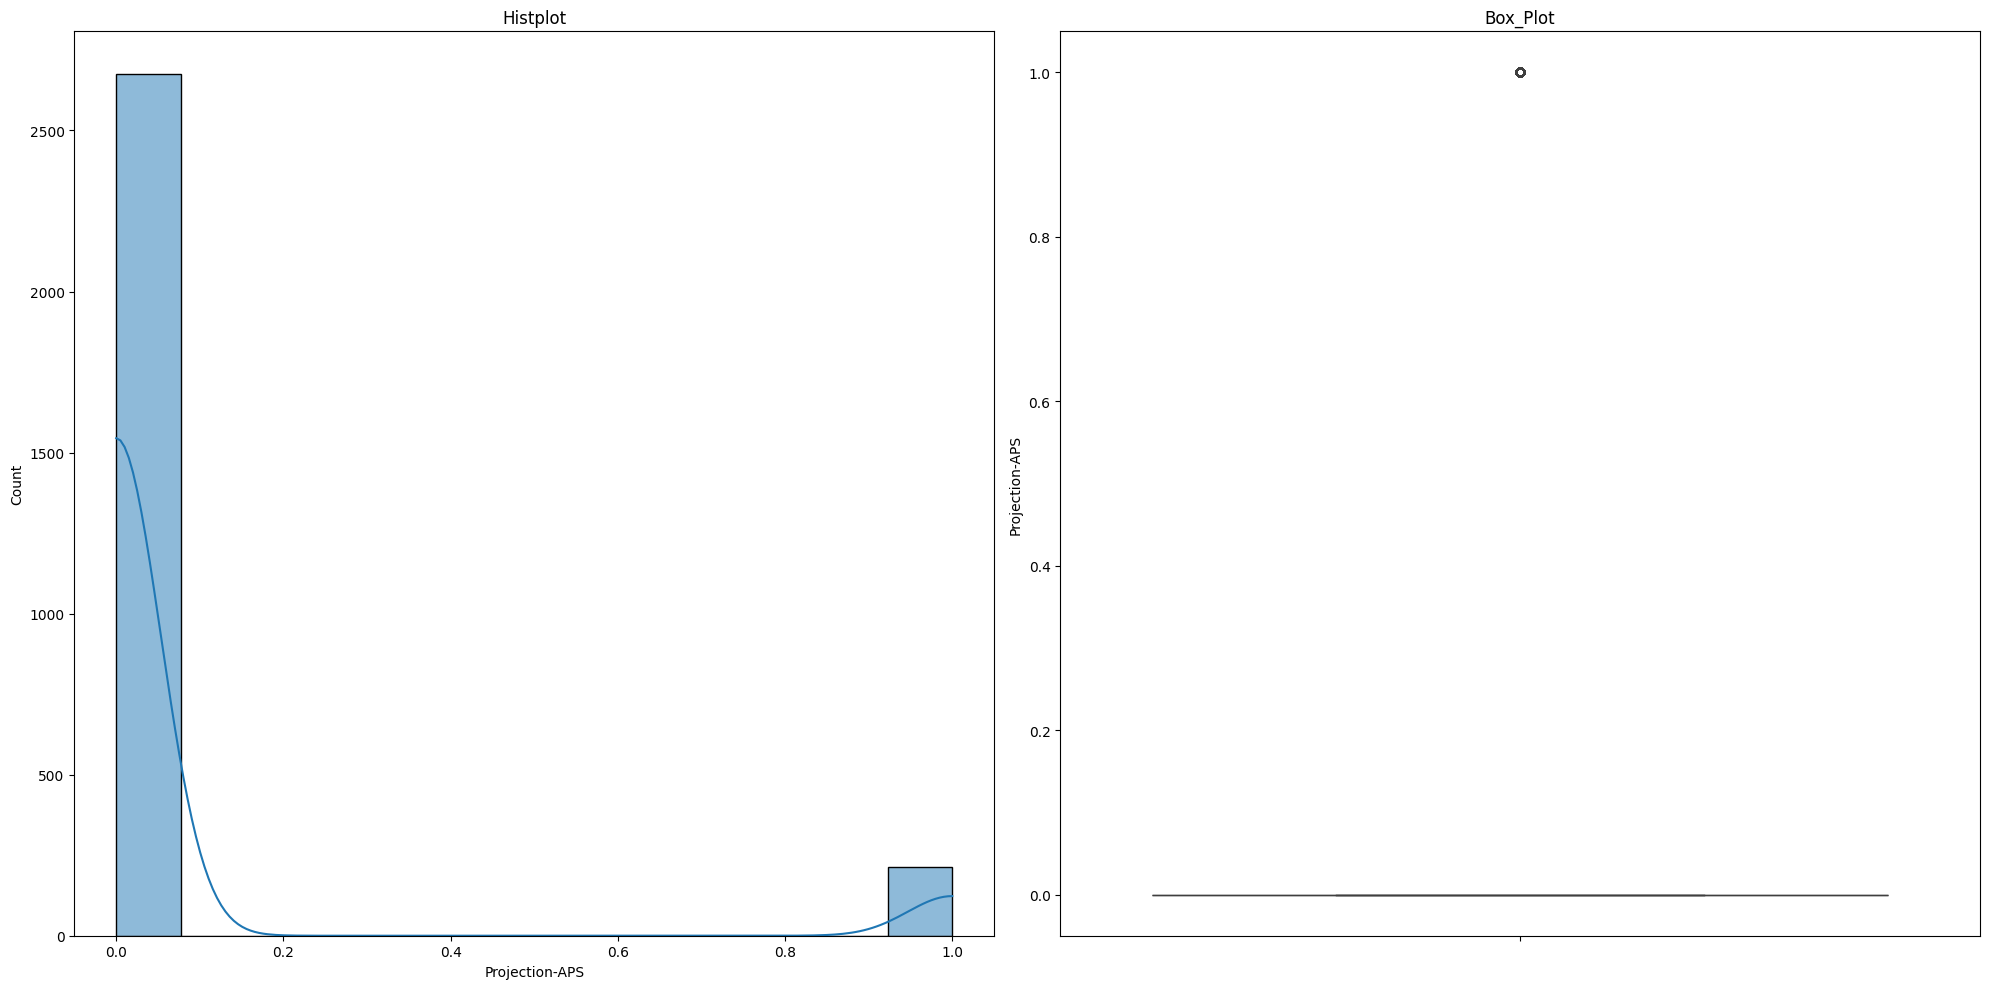

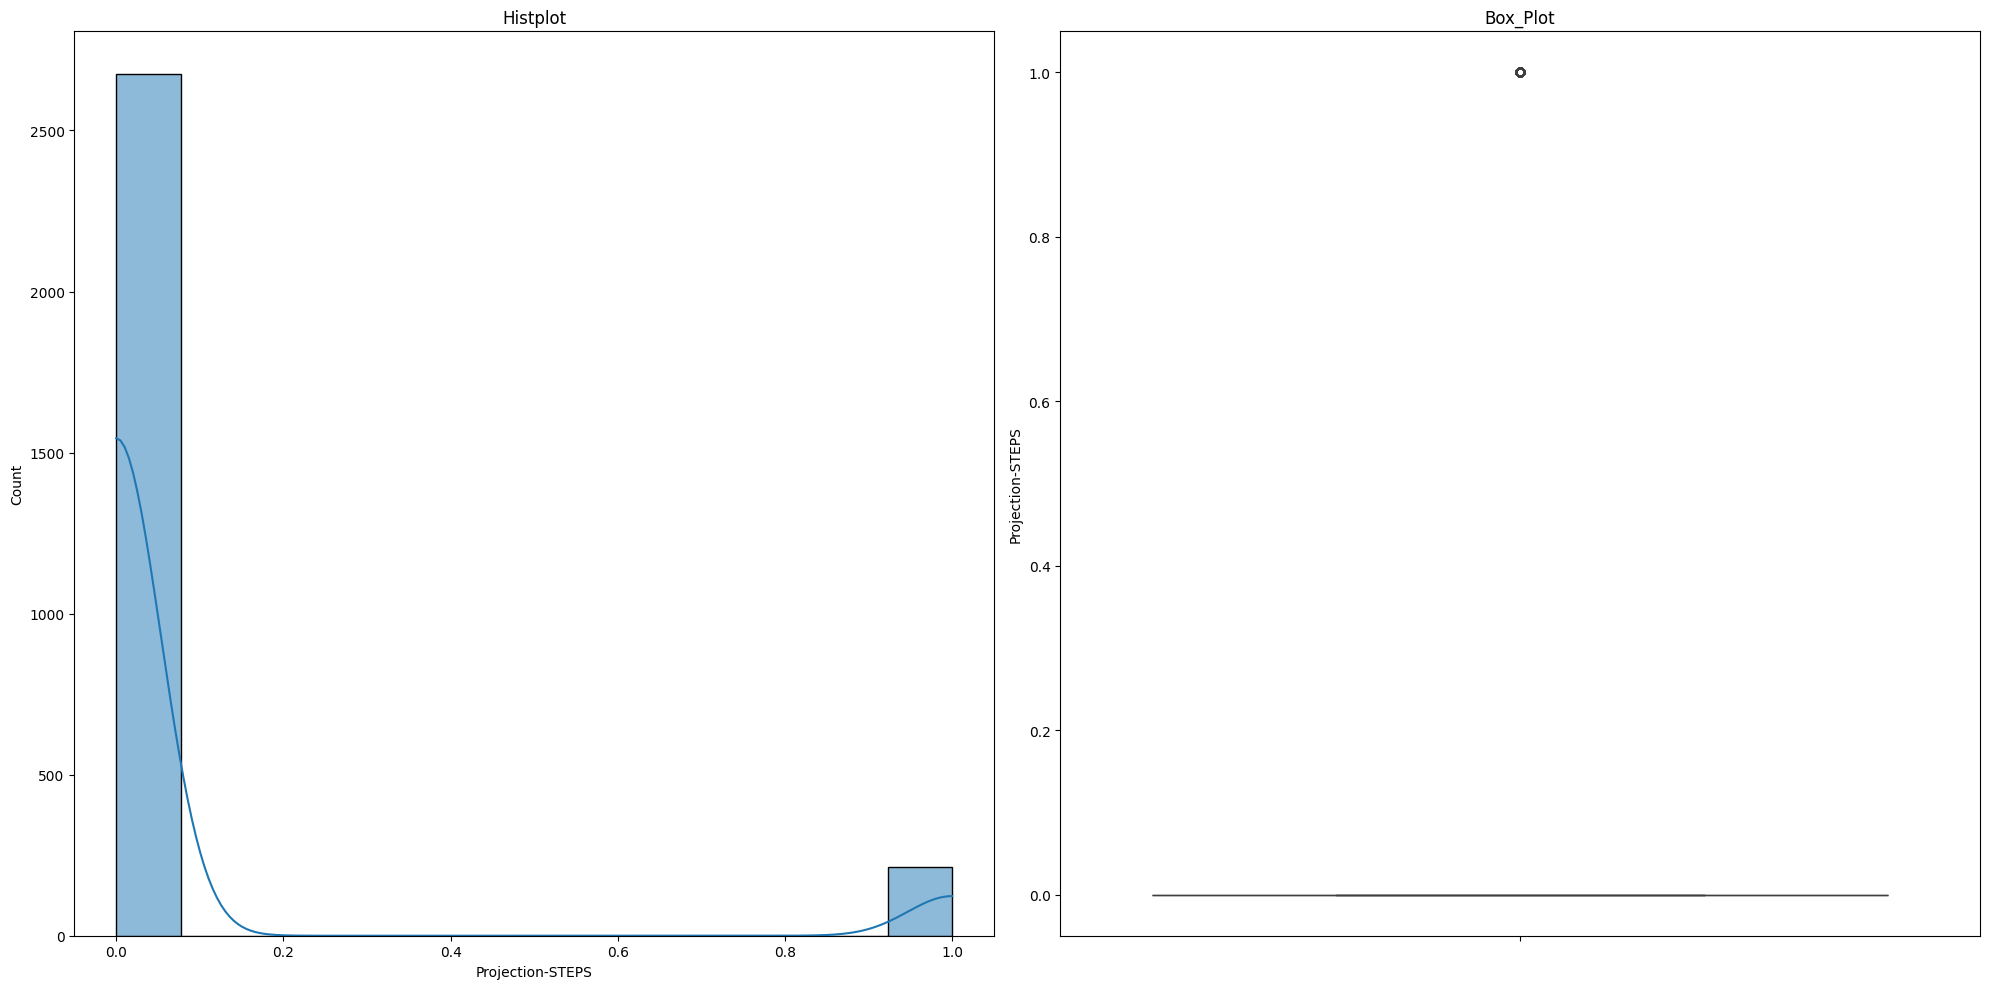

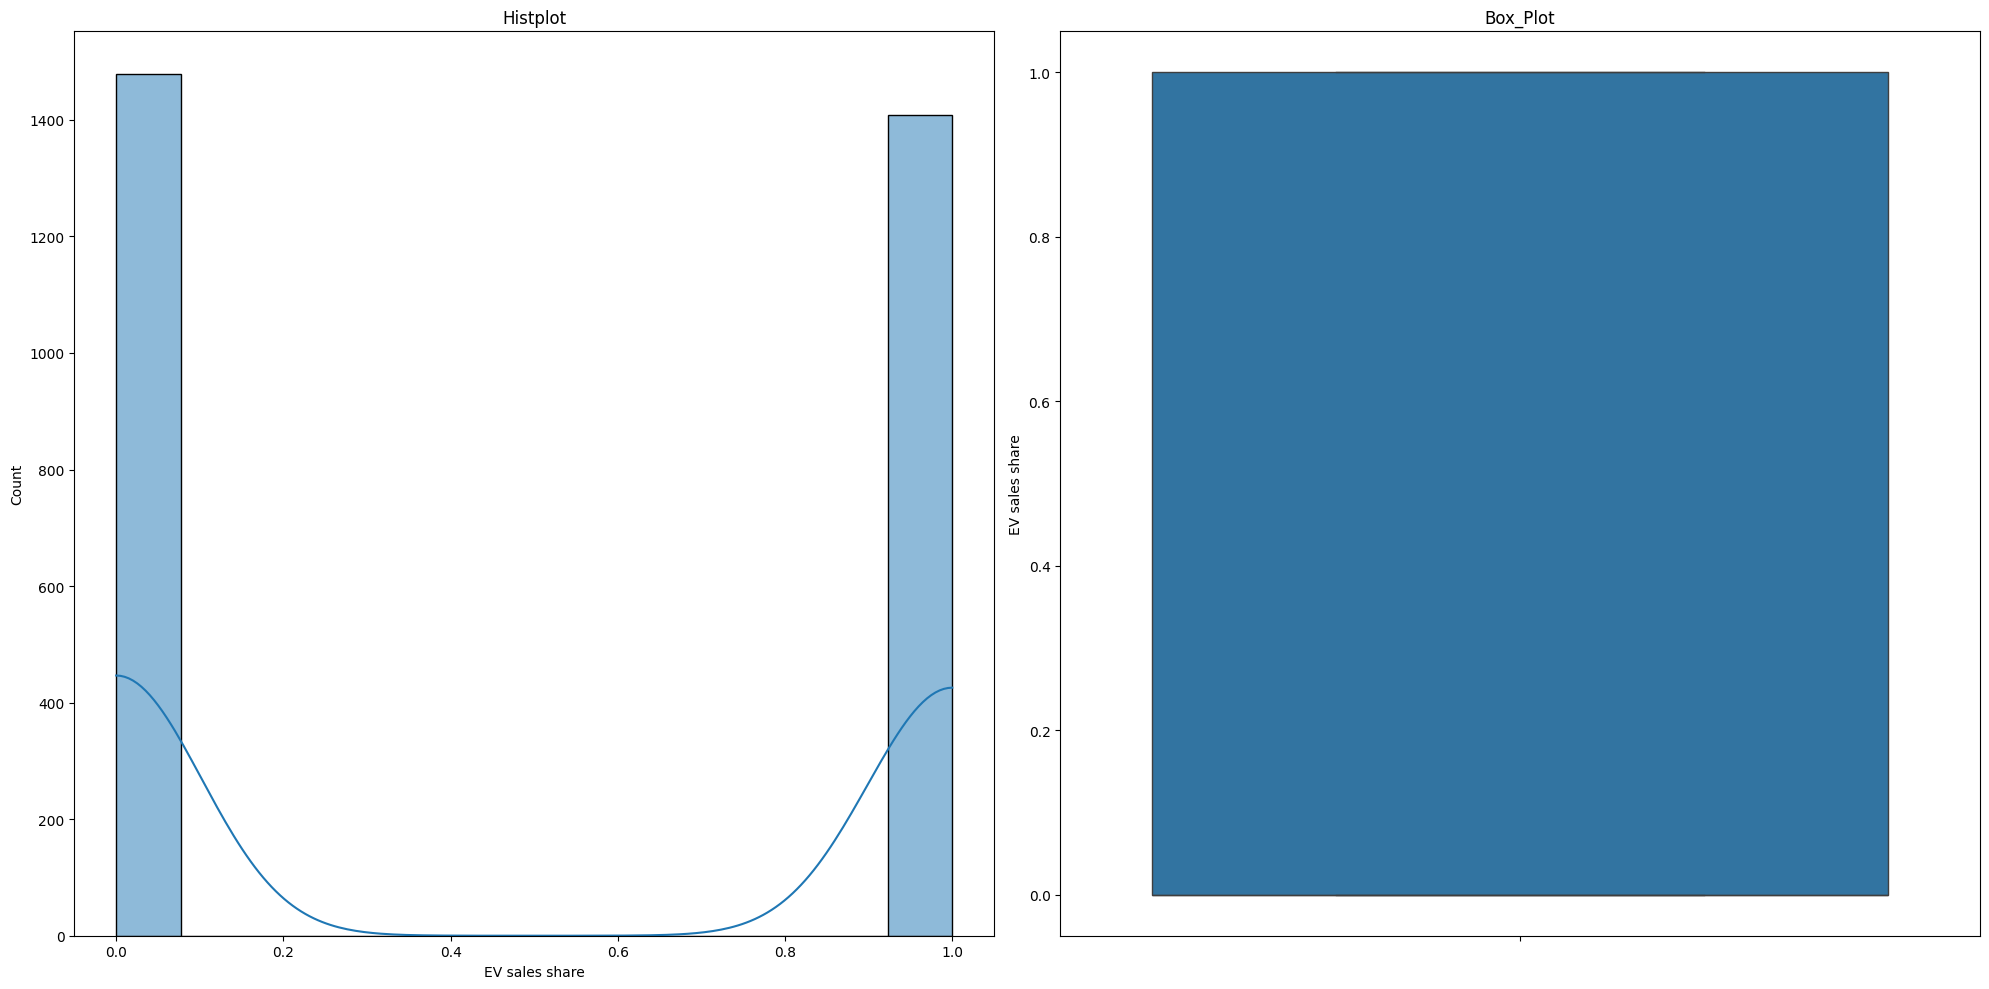

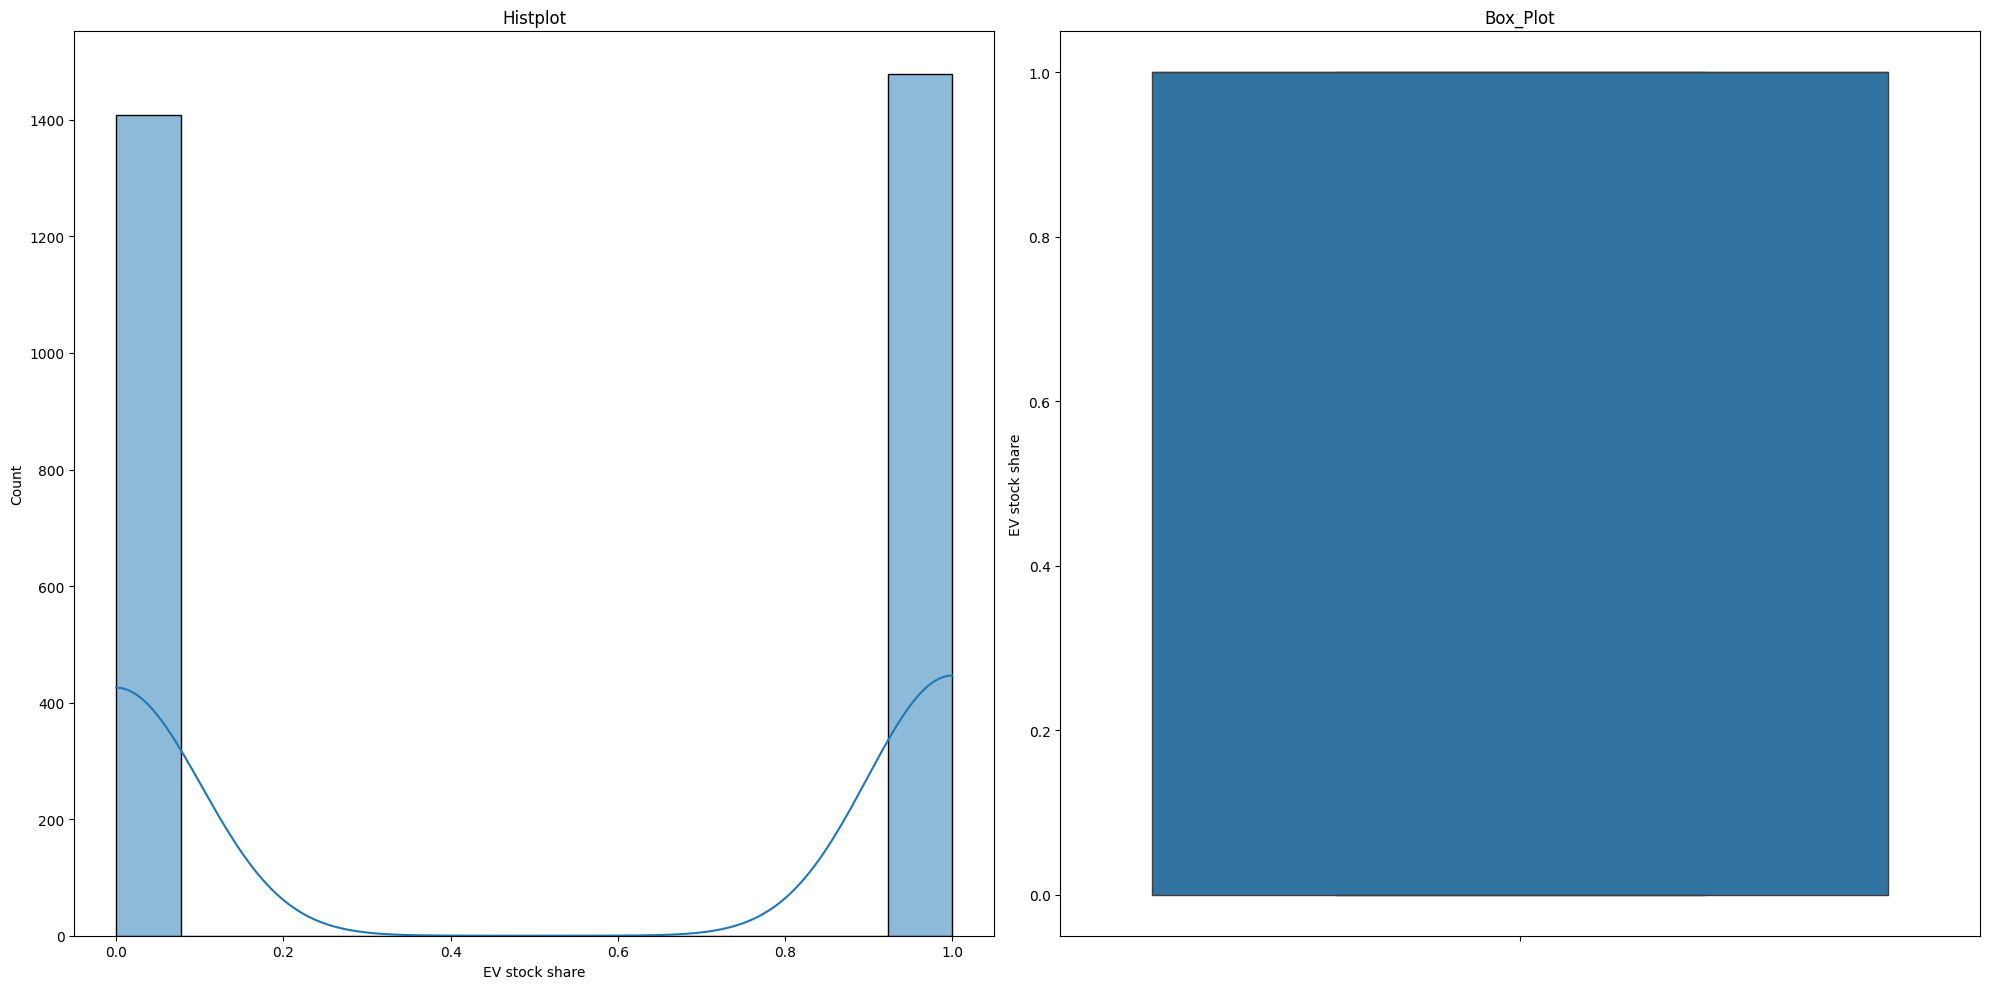

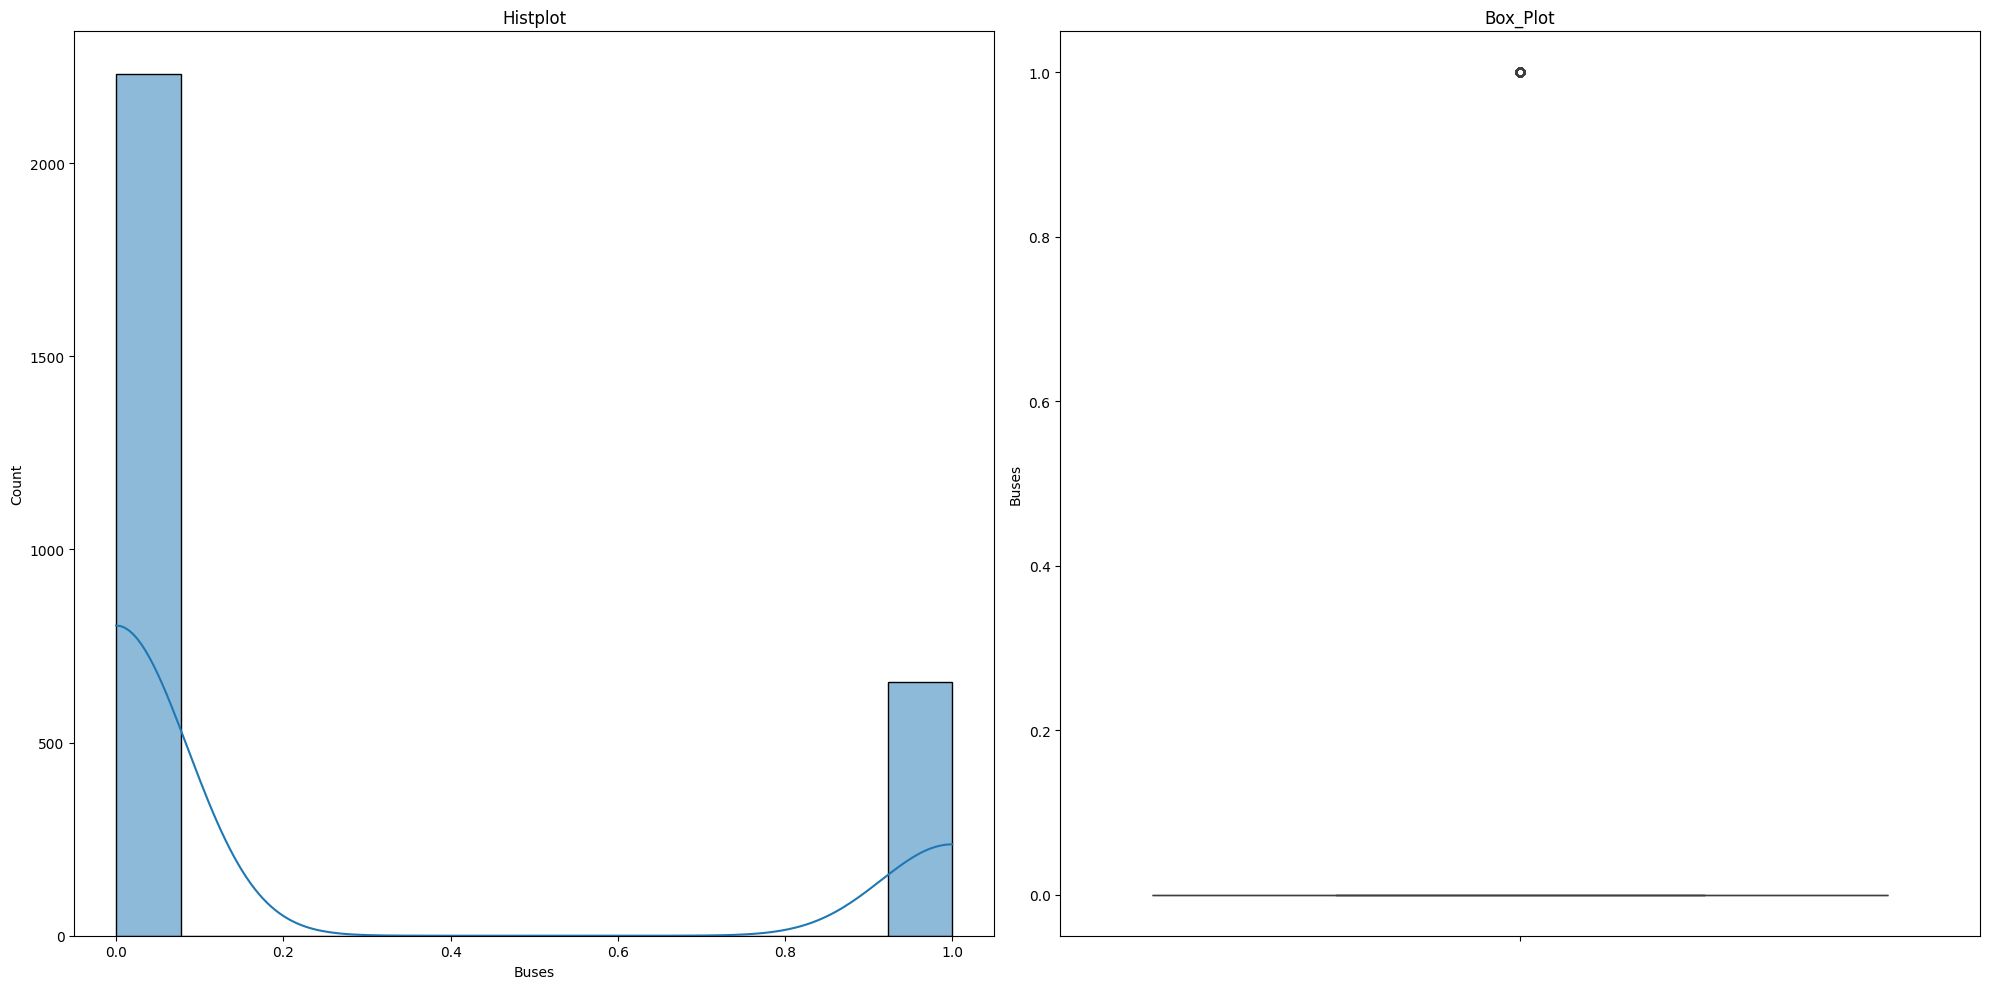

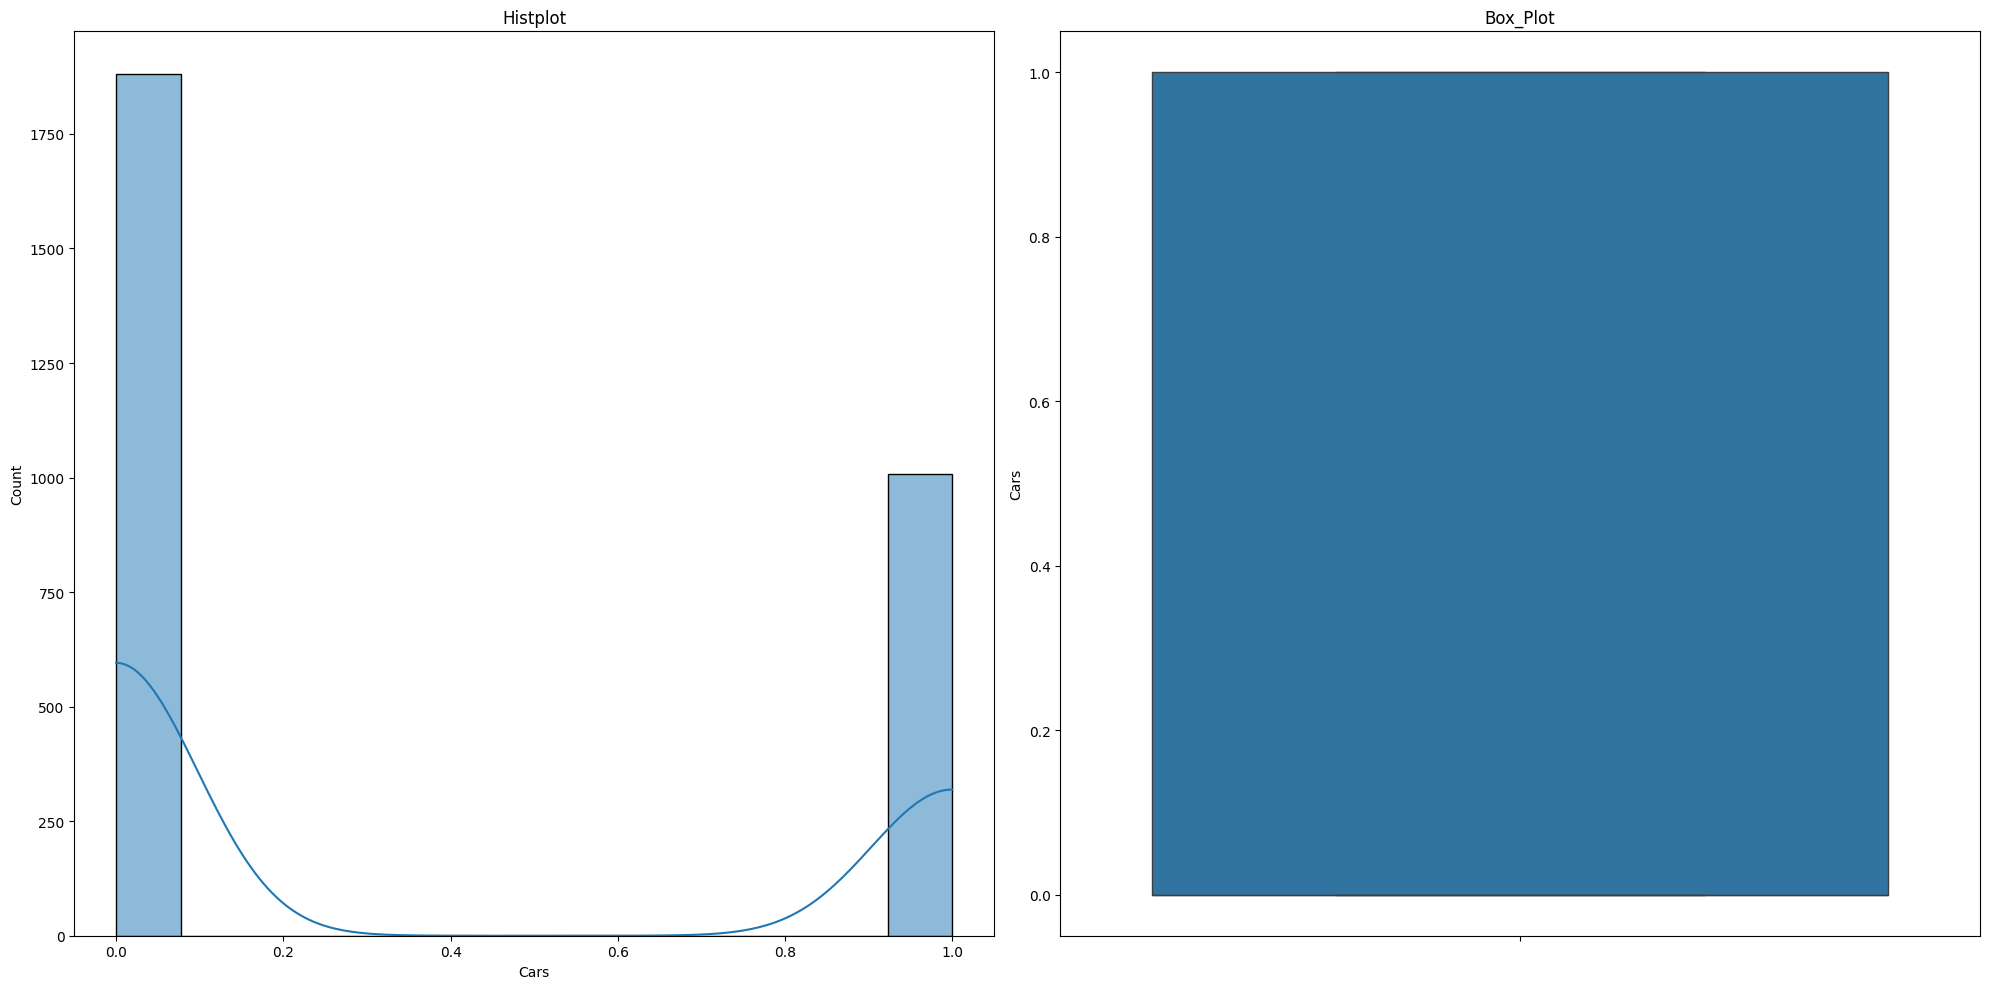

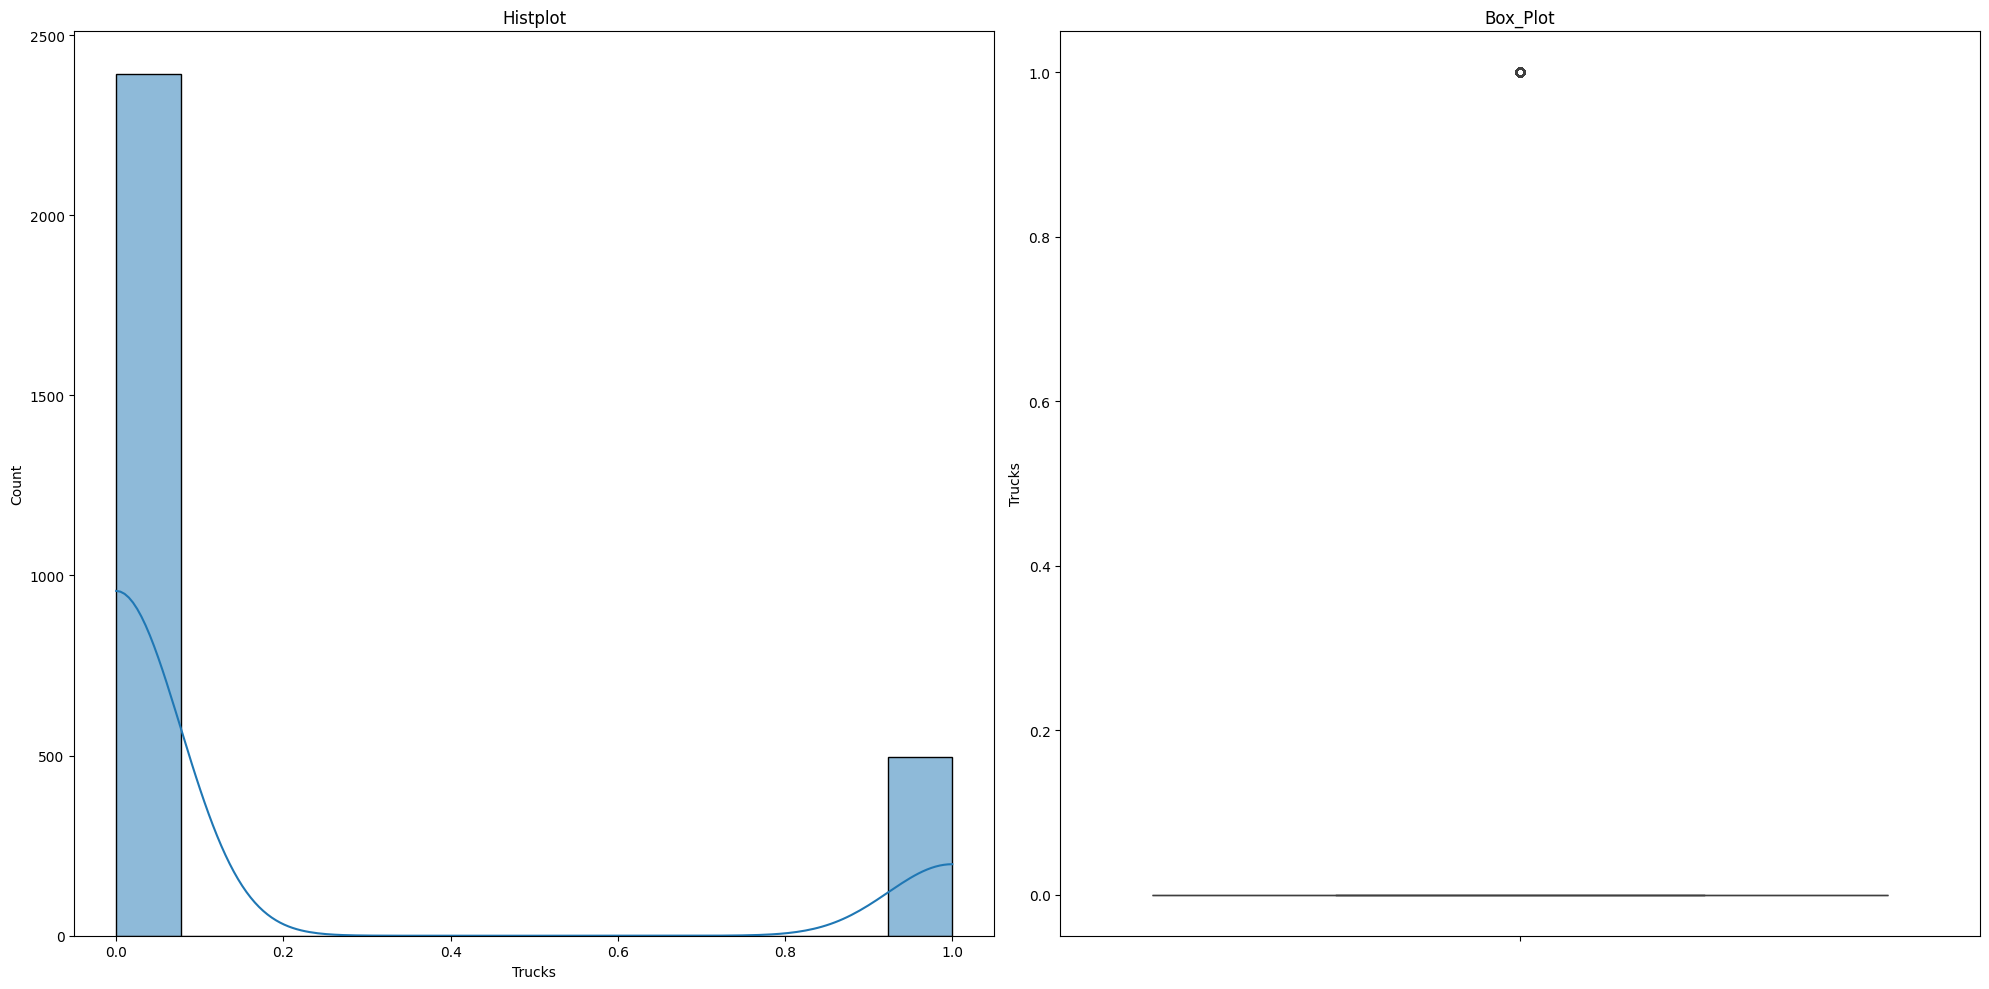

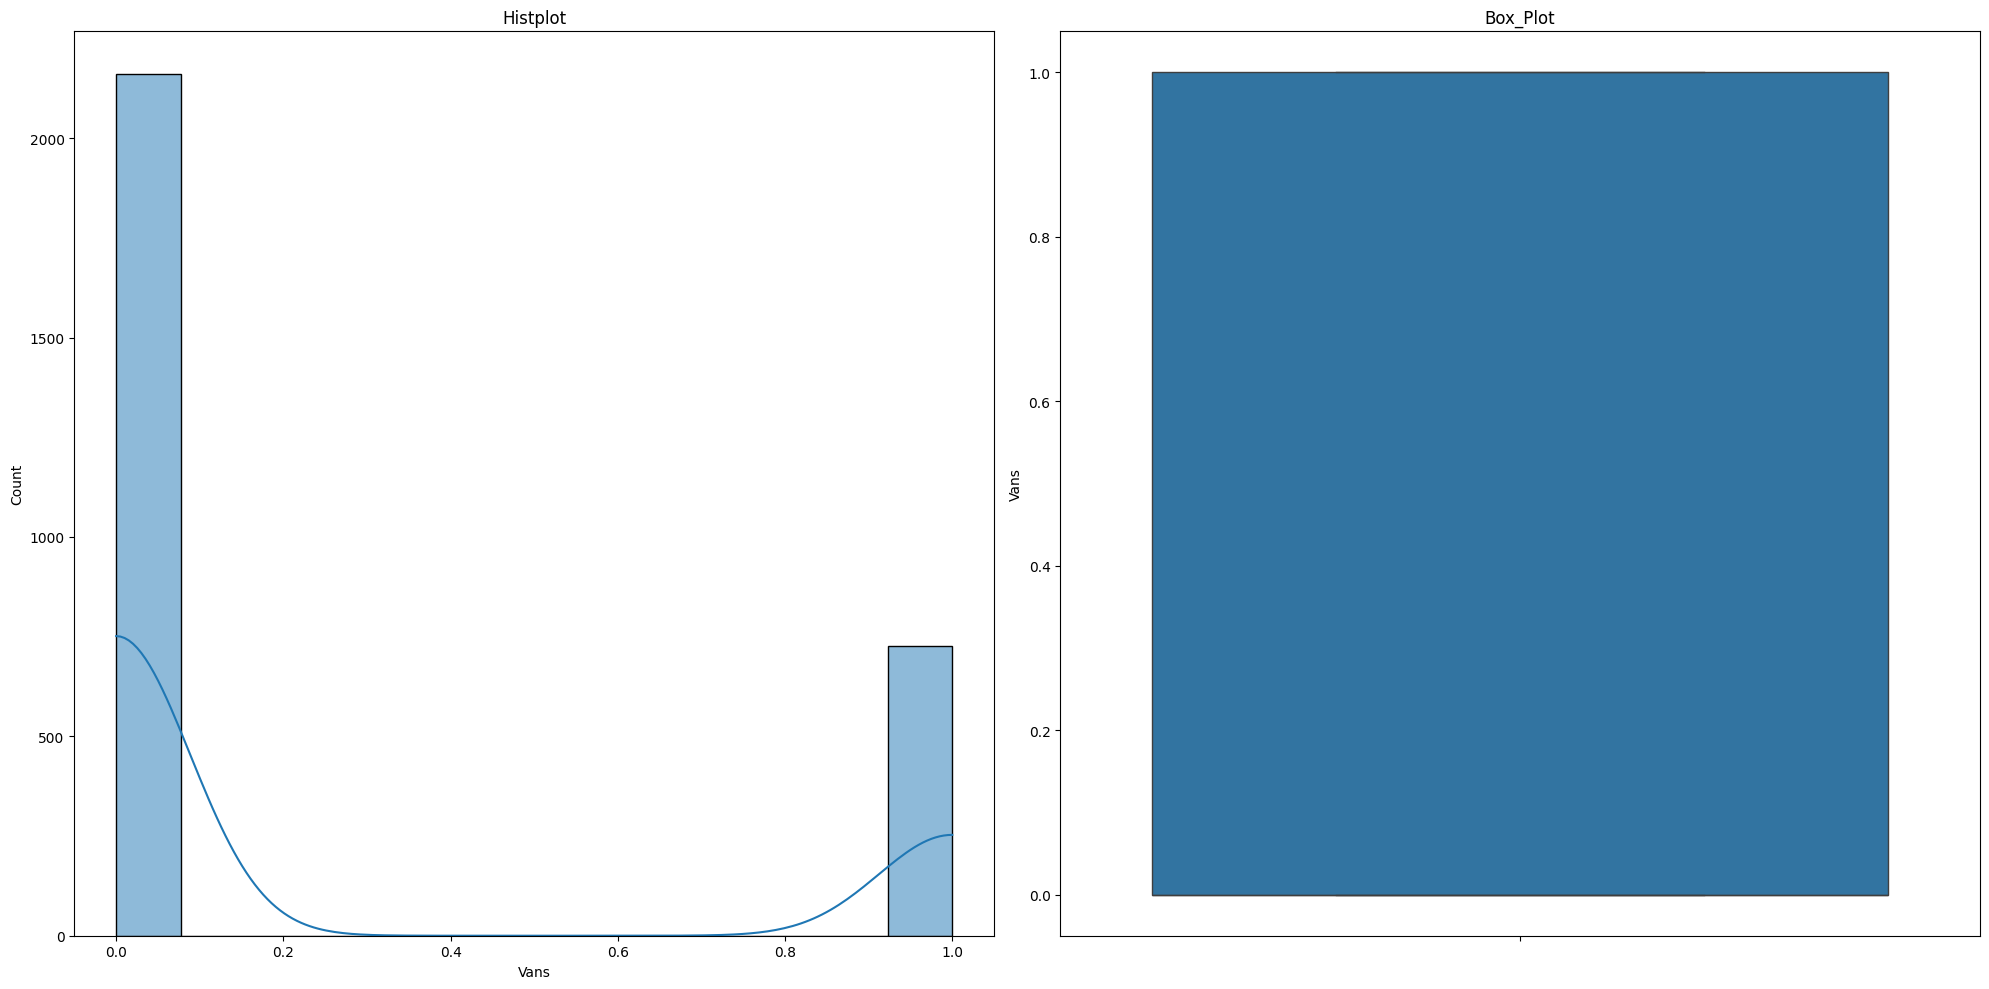

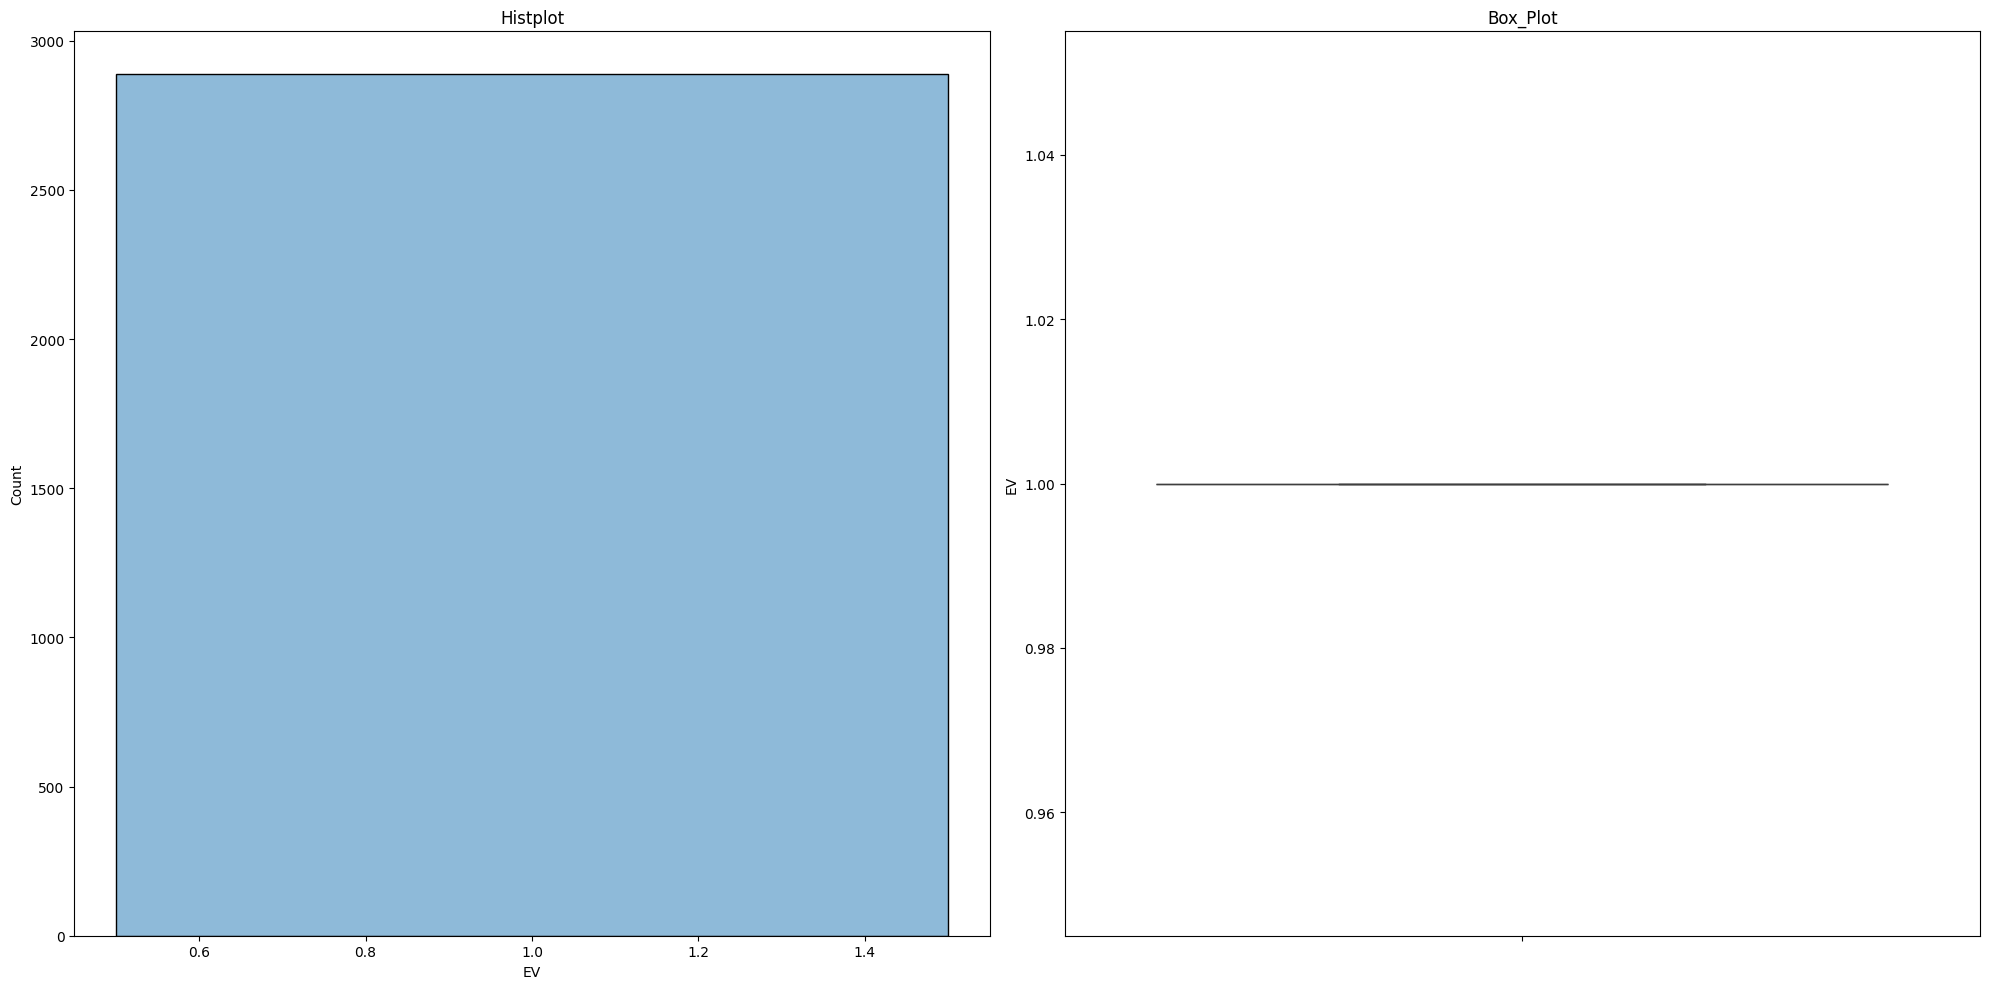

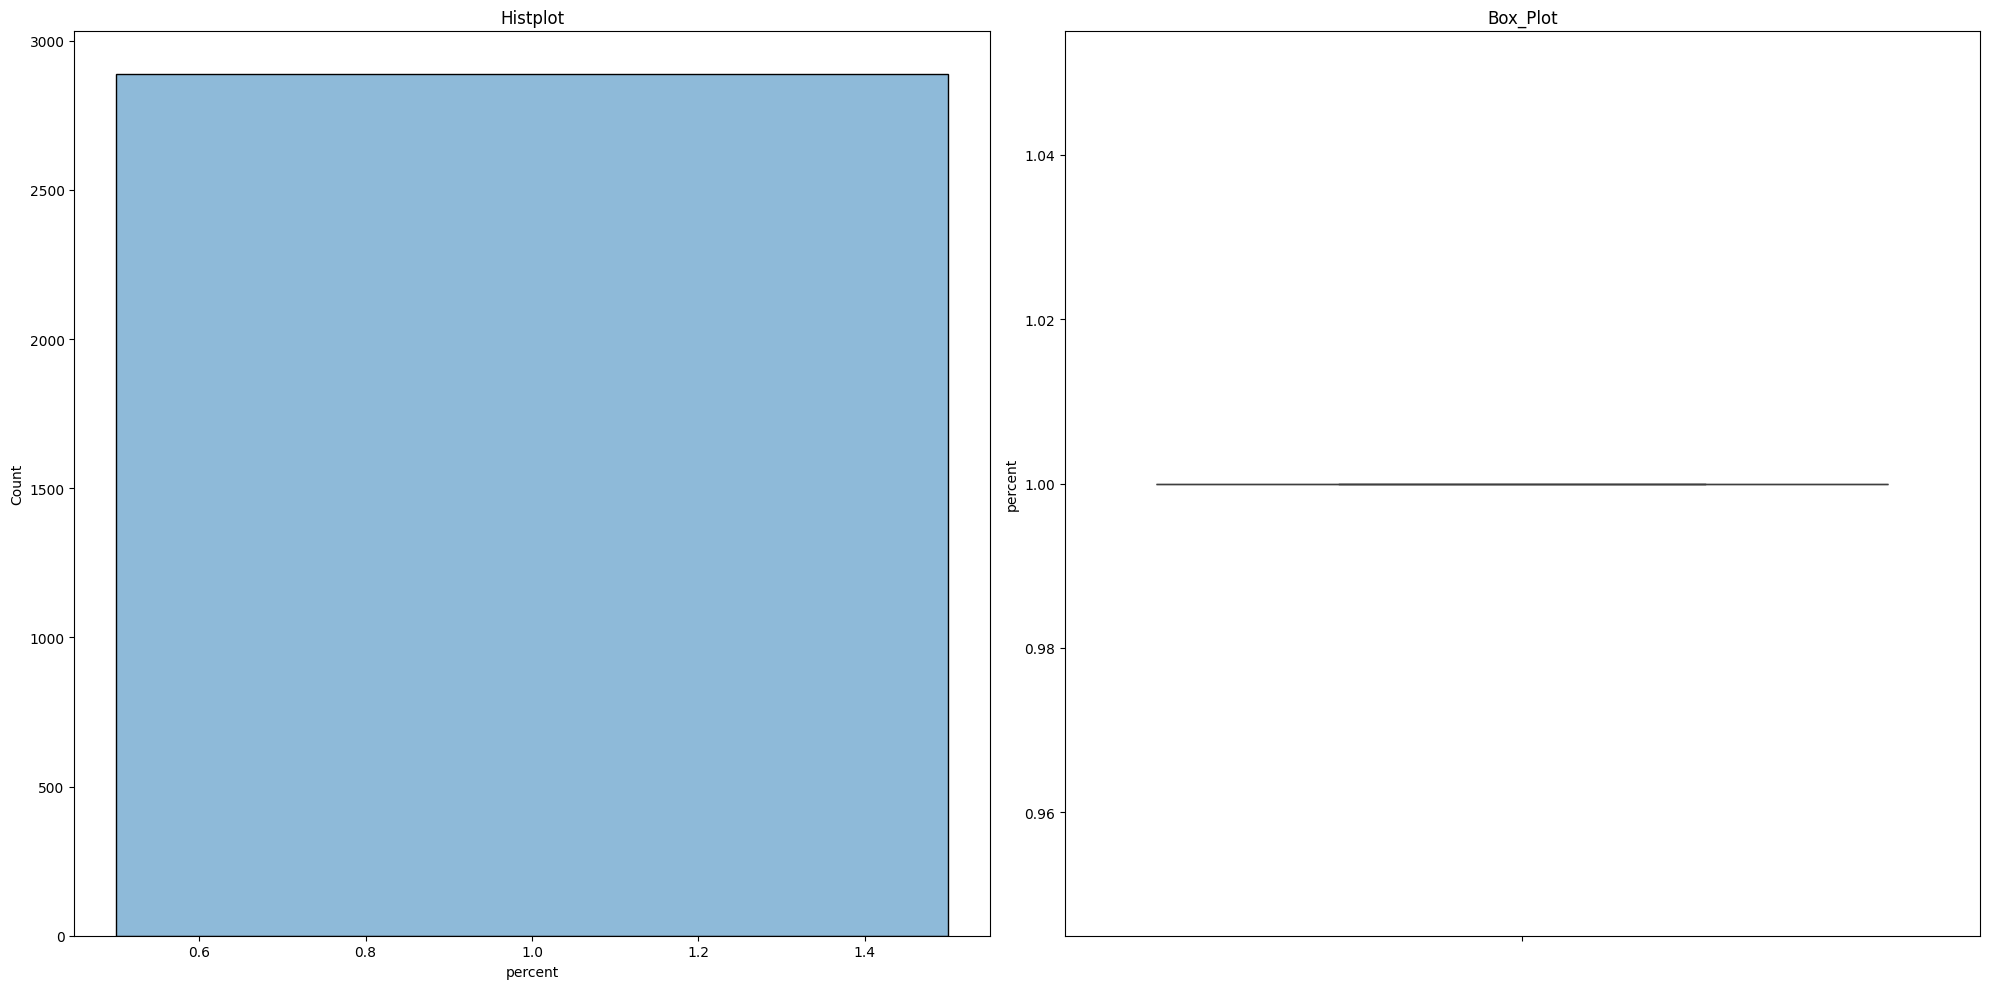

In [25]:
for cat in df1.columns:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.histplot(df1[cat],ax=ax[0],kde=True)
    ax[0].set_title("Histplot")
    sns.boxplot(df1[cat],ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    # plt.show()

In [26]:
df2.replace({False: 0, True: 1}, inplace=True)

X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


X_train=np.asarray(X_train).astype(np.float32)
y_train= np.asarray(y_train).astype(np.float32)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-03 14:36:36.082861: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 14:36:36.211707: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 14:36:36.721975: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 14:36:38.011125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
model= Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

2024-04-03 14:36:39.173298: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [29]:
model = Sequential()
model.add(Dense(128, activation='elu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='elu'))
model.add(Dense(32,activation='elu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Compile the model


/home/ayush/Ayush/Sixth_Sem/ML/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
df2.head()

value  region  year  Historical  Projection-APS  Projection-STEPS  \
0   49.0       0  2011           1               0                 0   
3   49.0       0  2011           1               0                 0   
4  170.0       0  2012           1               0                 0   
7  220.0       0  2012           1               0                 0   
8   80.0       0  2012           1               0                 0   

   EV sales  EV stock  Buses  Cars  Trucks  Vans  BEV  PHEV  Vehicles  
0         0         1      0     1       0     0    1     0         1  
3         1         0      0     1       0     0    1     0         1  
4         1         0      0     1       0     0    1     0         1  
7         0         1      0     1       0     0    1     0         1  
8         0         1      0     1       0     0    0     1         1

In [31]:
X_train.shape

(3699, 14)

In [32]:
X_test.shape

(925, 14)

In [33]:
df2.shape

(4624, 15)

In [34]:
# X = df2.iloc[:,1:].values
# y = df2.iloc[:,0].values
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [35]:
# X_train=np.asarray(X_train).astype(np.float32)
# y_train= np.asarray(y_train).astype(np.float32)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [37]:
X_train

array([[-1.0964581 , -0.95911676,  0.4724556 , ..., -1.3061107 ,
         1.3061107 ,  0.        ],
       [-0.13287745, -1.4087995 ,  0.4724556 , ...,  0.76563185,
        -0.76563185,  0.        ],
       [-0.7460651 , -0.95911676,  0.4724556 , ..., -1.3061107 ,
         1.3061107 ,  0.        ],
       ...,
       [ 0.56790847,  0.16509038,  0.4724556 , ...,  0.76563185,
        -0.76563185,  0.        ],
       [ 1.0934979 , -0.28459248,  0.4724556 , ...,  0.76563185,
        -0.76563185,  0.        ],
       [-1.0088598 , -1.8584824 ,  0.4724556 , ...,  0.76563185,
        -0.76563185,  0.        ]], dtype=float32)

In [38]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test))

Epoch 1/1000


116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 832190144.0000 - mae: 15765.7441 - val_loss: 873508352.0000 - val_mae: 16784.2129
Epoch 2/1000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 812489600.0000 - mae: 15491.9512 - val_loss: 654893760.0000 - val_mae: 14645.9805
Epoch 3/1000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 535701024.0000 - mae: 13307.3770 - val_loss: 399592224.0000 - val_mae: 12286.2832
Epoch 4/1000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 374531616.0000 - mae: 12414.2793 - val_loss: 376447296.0000 - val_mae: 12149.5234
Epoch 5/1000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 346478144.0000 - mae: 11949.0518 - val_loss: 369286336.0000 - val_mae: 12122.4463
Epoch 6/1000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 351519776.0000 - mae: 12072.1914 - val_loss: 365198016.0000 - val_mae: 12176.3232
Epoch 7/1000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 355951104.0000 - mae: 12382.9258 - val_loss: 360844032.0000 - val_mae: 1211

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,725 (120.02 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,484 (80.02 KB)

In [ ]:
loss_df= pd.DataFrame(model.history.history)

<Axes: >

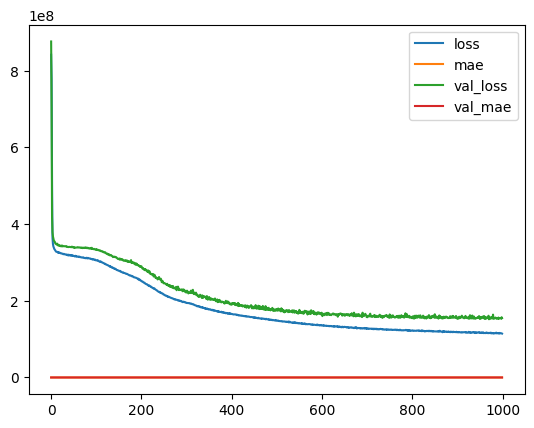

In [ ]:
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 256877104.0000 - mae: 10485.5576


[257717248.0, 10495.255859375]

In [ ]:
train_pred= model.predict(X_train)

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step


In [ ]:
y_pred= model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


In [ ]:
r2_train = r2_score(y_train, train_pred)
r2_train

0.6194994239320635

In [ ]:
r2_test= r2_score(y_test, y_pred)
r2_test

0.5699756268139352

In [ ]:
diff= r2_train- r2_test
print("Difference between two scores",diff.round(2))

Difference between two scores 0.05
